# Problem Definition:

Using historic from 2012 to 2018 from a La Fe reservoir in Medellin, Colombia, to estimate manganese Alarm levels using Machine learning algorithms using analytical parameters from Source Water Monitors that measure pH, Temperature, Dissolve Oxygen, Conductivity, ORP,  Color, Turbidity, TOC and UV. 

<img src="DATOS.JPG" width=1500 height=1600 />
Captation Tower data

The data were sampled from three submersion levels at the pump station located at the suction tower that supplies raw water for the "La Ayura Plant."
<center>
    <img src="TORRE.JPG"  width=200 height=200 />  <img src="TORRE2.JPG"  width=200 height=300 />
</center>


# Hypotesis:
The hypothesis is to use analytical instrumentation from water source monitor (pH, Temp, OD, ORP, Conductivity, Color, and Turbidity) to estimate alarm level of Manganese greater than 0.1 mg/l and 0.05 mg/l

<center><img src="TABLE.JPG" width=500 height=400 /></center>
Data structure for training


<center><img src="MODEL.JPG" width=2000 height=2000 /></center>


## Data Overview

The data consists of measurements from various sampling points, including chemical concentrations, water quality indicators, and physical properties of the water like temperature and pH. The analysis aims to ensure data quality and reliability for subsequent environmental assessments.



**Problem Definition:** The notebook starts with a Markdown cell explaining the problem it aims to solve, which seems related to handling and analyzing environmental data.

Data Loading and Initial Preparation: There are several code cells dedicated to importing necessary libraries, reading data from a file, and initial data setup. This includes loading specific variables and checking the structure of the data.

**Data Analysis:**
**Descriptive Statistics:** The notebook includes code for calculating and handling missing values, which indicates that data cleanliness is a concern.

**Visualization:** There are multiple functions and calls to generate histograms, box plots, and line plots. These visualizations likely serve to explore data distributions and identify outliers or anomalies.

**Data Imputation:** The notebook has sections aimed at handling missing data. It seems to apply different strategies for imputation based on the nature of the data (e.g., using mean or median values depending on the distribution characteristics).

**Outlier Handling:** Some cells focus on identifying and handling outliers, which is crucial for maintaining the integrity of data analyses.

**Final Data Handling:** Towards the end of the notebook, there are operations for resetting the data index and saving the processed data back to a CSV file, suggesting a preparation of data for further analysis or use.

**Additional Functions:** The notebook includes custom functions for plotting, which are reused multiple times to facilitate consistent 
**visualization of various data aspects.**

The data itself, based on variable names like 'OD' (which could stand for Oxygen Demand) and environmental terms, suggests that this notebook is used for analyzing environmental measurements, possibly from a specific location like 'Embalse La Fe' mentioned in the dataset name.


## Data Columns:
**PM:** Sampling point name.

**Profuidad:** Depth at which the sample was taken.

**Zona fótica:** Light penetration depth in the water.

**pH:** Acidity or alkalinity of the water.

**Temperatura:** Water temperature.

**OD (Oxygen Demand):** Amount of oxygen required.

**OD%:** Percentage of oxygen saturation.

**Conductividad:** Electrical conductivity of the water.

**Redox:** Oxidation-reduction potential.

**Fósforo Total:** Total phosphorus levels.

**Nitratos, N. amonical, Mang, etc.:** Various nitrogenous compounds and other chemical measurements.

**Algas, Cianobacterias totales:** Counts of algae and total cyanobacteria.

**Coliformes totales, E.coli:** Indicator organisms for water quality.

**Other chemical concentrations** like F N, CL N, NO2 N, etc.


## Key Insights from Data:

*The data is structured with 560 entries and 35 columns.
*It has several missing values across different columns which are handled in the notebook through imputation strategies.
*The dataset is likely used for environmental monitoring and water quality assessment.
## Task for the Notebook:
Based on the dataset and notebook content:

**Data Cleaning:** Addressing missing values and outliers, which is crucial given the nature of the data.

**Data Visualization:** Using plots to understand distributions and identify trends or anomalies, which is essential for environmental data analysis.
**Data Preparation:** The final steps include preparing the data for further analysis or reporting, such as resetting indices and saving the cleaned data.

In [123]:
import numpy as np                             #NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices
import pandas as pd                            #Pandas is a software library written for the Python programming language for data manipulation and analysis. 
import matplotlib.pyplot as plt                #Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
import sklearn                                 #Scikit-learn is a machine learning library that Features various classification, regression and clustering algorithms including support-vector machine, LDA, etc
import seaborn as sns
# importing plotly
import plotly.express as px

In [2]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Read data set
DATADIR = 'C:\\Users\\AlcalaF\\Documents\\projects\\dataplayground\\data'
mydata = pd.read_csv (DATADIR + '/Embalse La Fe Datos Org.csv')
mydata.head()

PM  Profuidad  Zona fótica    pH  Temperatura     OD  \
0  Torre Superficial      1.520        4.110 7.300        19.600 7.500   
1        Torre Media      0.170        0.470 7.000        18.600 6.800   
2       Torre Profua      1.520        4.110 6.800        17.500 5.200   
3              Presa      1.750        4.730 7.300        19.300 7.700   
4           Potreros        NaN        0.000 7.300        20.000 7.400   

      OD%  Conductividad   Redox  Fósforo Total  ...   F N  CL N  NO2 N  \
0 104.800         43.600 209.000         30.000  ... 0.015 2.977  0.007   
1  93.400         51.300 216.900         10.000  ... 0.025 3.907  0.007   
2  70.500         55.400 214.100         50.000  ... 0.029 4.605  0.008   
3 106.900         41.400 205.800         10.000  ... 0.022 4.662  0.009   
4 104.200         41.900 193.700         10.000  ... 0.040 2.953  0.007   

   NO3 N  PO4 N  SO4 N  NH4+ N    K N  NT N  NT Orgánico N  
0  0.686  0.009  1.916   0.042  1.819 0.332          0.142  
1  0.781  0.009  2.466   0.038  1.036 0.363          0.155  
2  1.029   0.01  2.702   0.085  1.231 0.444          0.143  
3  0.897   0.01  1.736   0.076   3.08 0.427          0.163  
4  0.662   0.02  1.809   0.020  0.917 0.306          0.139  

[5 rows x 35 columns]

In [4]:
variables = ['Mang', 'OD']
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Check data structure
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PM                      560 non-null    object 
 1   Profuidad               555 non-null    float64
 2   Zona fótica             560 non-null    float64
 3   pH                      557 non-null    float64
 4   Temperatura             560 non-null    float64
 5   OD                      553 non-null    float64
 6   OD%                     553 non-null    float64
 7   Conductividad           553 non-null    float64
 8   Redox                   497 non-null    float64
 9   Fósforo Total           533 non-null    float64
 10  Nitratos                560 non-null    float64
 11  N. amonical             560 non-null    float64
 12  Mang                    560 non-null    float64
 13  Color                   546 non-null    float64
 14  Turbiedad               560 non-null    in

In [8]:
#Calculate missing values
for feature in mydata.columns: # Loop through all columns in the dataframe
    missing = len(mydata[mydata[feature].isna()])
    if missing > 0:
        Pmissing = round(100*missing/len(mydata),2)
        print(f"The { Pmissing } % of the records on column  {str(feature)} are missing values .  ")  # f-string
missing  = len(mydata[mydata.isna().any(axis=1)])
print(f"The data has { missing } records with  missing values.  ")  # f-string

The 0.89 % of the records on column  Profuidad are missing values .  
The 0.54 % of the records on column  pH are missing values .  
The 1.25 % of the records on column  OD are missing values .  
The 1.25 % of the records on column  OD% are missing values .  
The 1.25 % of the records on column  Conductividad are missing values .  
The 11.25 % of the records on column  Redox are missing values .  
The 4.82 % of the records on column  Fósforo Total are missing values .  
The 2.5 % of the records on column  Color are missing values .  
The 3.93 % of the records on column  TOC are missing values .  
The 5.18 % of the records on column  UV 
(cm1) are missing values .  
The 5.54 % of the records on column  SUVA are missing values .  
The 4.11 % of the records on column  Clorofila are missing values .  
The 4.29 % of the records on column  Feopigmentos are missing values .  
The 45.18 % of the records on column  Coliformes totales are missing values .  
The 45.18 % of the records on column  

In [9]:
# The following features have too many missing values, so it is better to drop them

In [10]:
from scipy.stats import zscore

# Correcting the column name for "TOC"
mydata.rename(columns={'TOC                 ': 'TOC'}, inplace=True)

# Function to identify outliers using Standard Deviation
def outliers_std(df, feature, threshold=3):
    mean = df[feature].mean()
    std = df[feature].std()
    outliers = df[(df[feature] < mean - threshold * std) | (df[feature] > mean + threshold * std)]
    return outliers

# Function to identify outliers using IQR
def outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Function to identify outliers using Z-Score
def outliers_zscore(df, feature):
    df['z_score'] = zscore(df[feature])
    outliers = df[(df['z_score'] < -3) | (df['z_score'] > 3)]
    df.drop(columns='z_score', inplace=True) # Clean up
    return outliers

# Specified features
features = ['Mang', 'OD', 'TOC', 'Turbiedad', 'Redox']

# Cleaning data: Converting TOC and True Color to numeric, handling non-numeric values
mydata['TOC'] = pd.to_numeric(mydata['TOC'], errors='coerce')
mydata['Colorr'] = pd.to_numeric(mydata['Color'], errors='coerce')

# Results containers
outliers_std_results = {}
outliers_iqr_results = {}
outliers_zscore_results = {}

# Evaluate outliers for each feature
for feature in features:
    outliers_std_results[feature] = outliers_std(mydata, feature)
    outliers_iqr_results[feature] = outliers_iqr(mydata, feature)
    outliers_zscore_results[feature] = outliers_zscore(mydata, feature)

# Since displaying all outliers here may be too verbose, let's summarize the counts instead
outlier_counts = pd.DataFrame({
    'Feature': features,
    'Std_Dev_Outliers': [len(outliers_std_results[feat]) for feat in features],
    'IQR_Outliers': [len(outliers_iqr_results[feat]) for feat in features],
    'Z_Score_Outliers': [len(outliers_zscore_results[feat]) for feat in features]
})

outlier_counts


Feature  Std_Dev_Outliers  IQR_Outliers  Z_Score_Outliers
0       Mang                 1            67                 1
1         OD                 5             9                 0
2        TOC                13            27                 0
3  Turbiedad                14            54                14
4      Redox                 1             2                 0

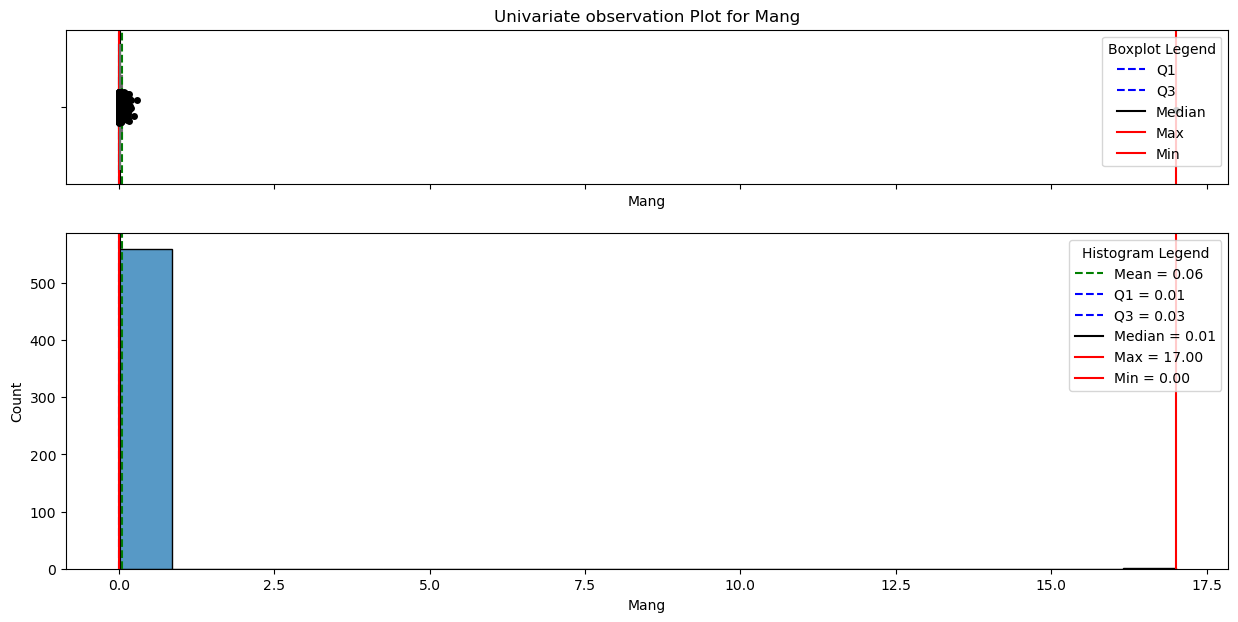

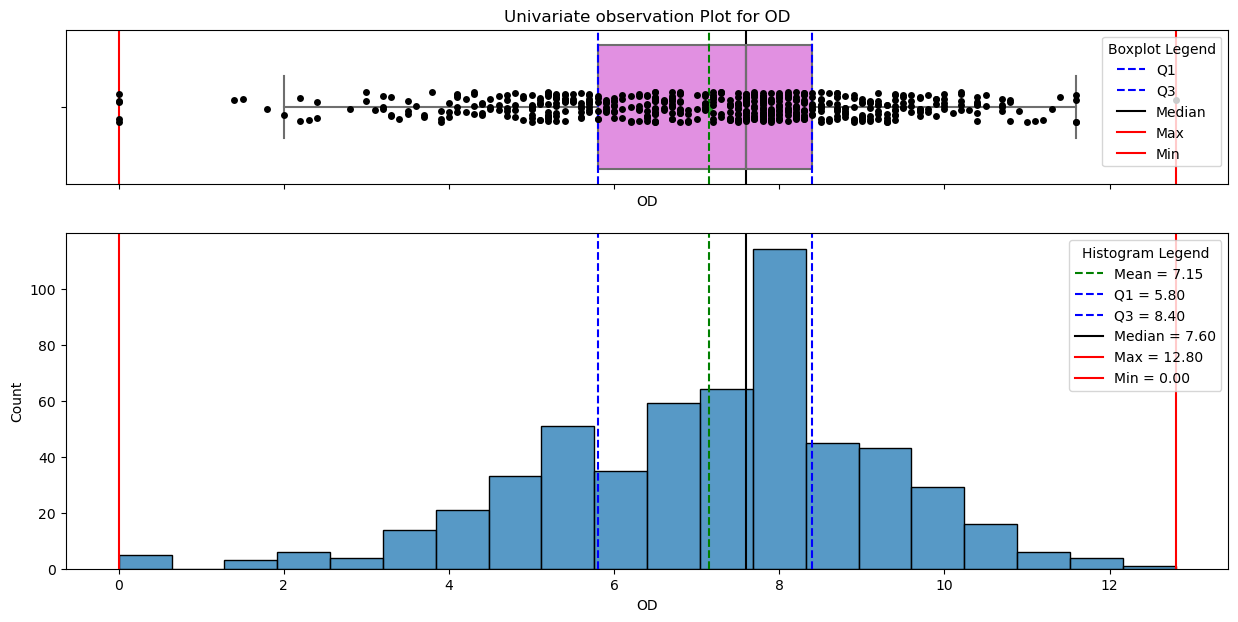

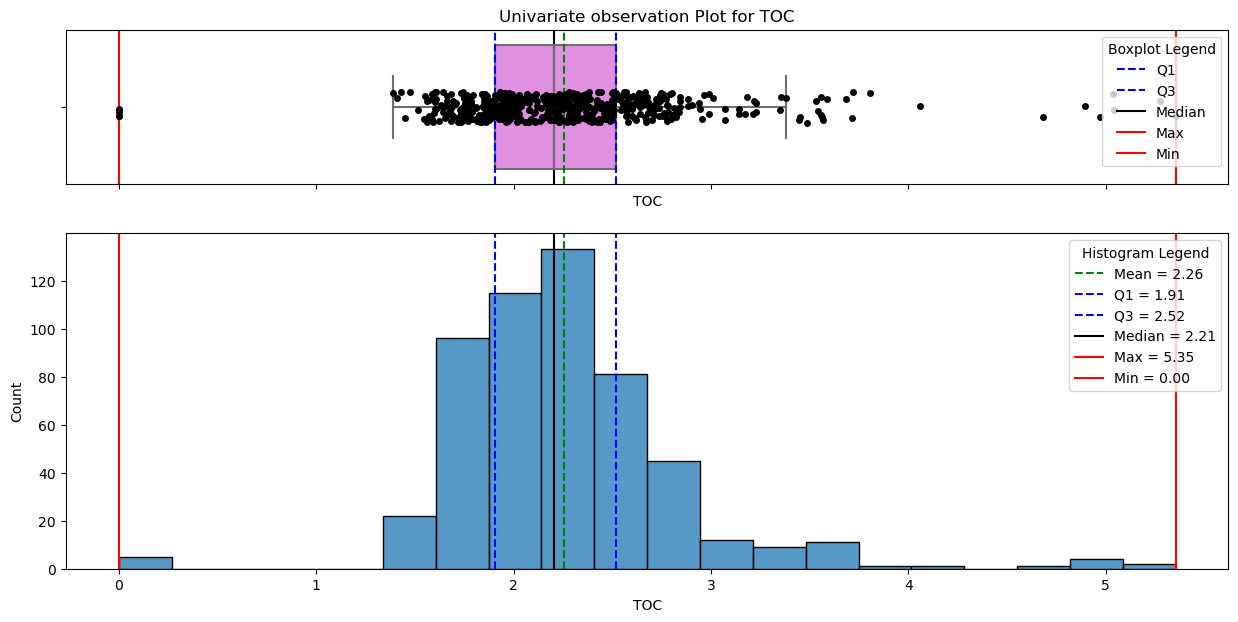

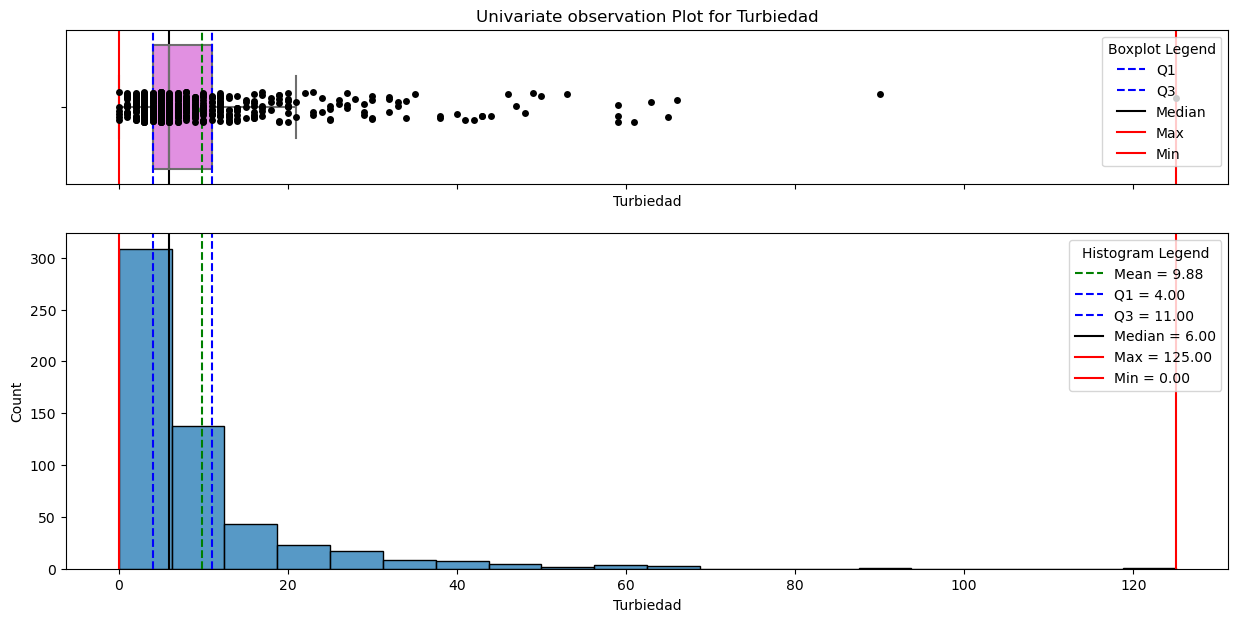

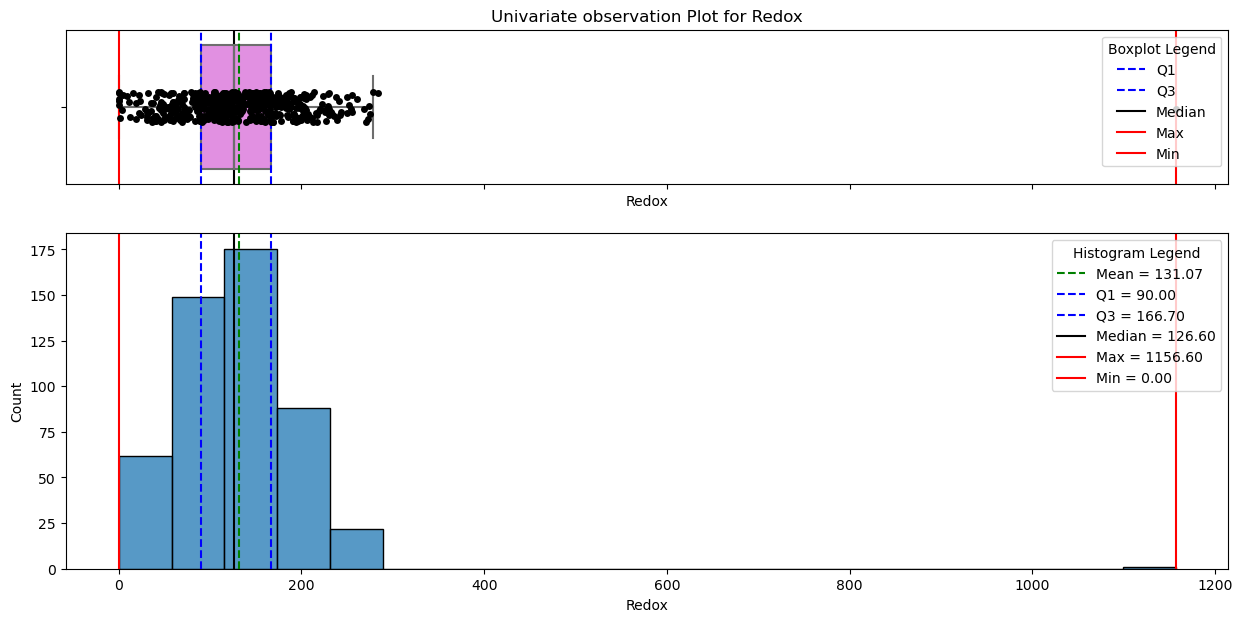

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing necessary library for plotting
import numpy as np

# Defining the function for combined histogram and boxplot analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    mean = data[feature].mean()
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    OUTD = np.logical_or(data[feature] < (Q1 - 1.5 * IQR), data[feature] > (Q3 + 1.5 * IQR))
    OUTL = OUTD.sum()
    median = data[feature].median()
    maxi = data[feature].max()
    mini = data[feature].min()

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.30, 0.65)},
        figsize=figsize)  # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet", showfliers=False).set(title='Univariate observation Plot for ' + feature)
    sns.stripplot(data=data, x=feature, ax=ax_box2, color='black')

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    # Adding vertical lines and legends
    ax_box2.axvline(mean, color="green", linestyle="--")
    ax_box2.axvline(Q1, color="blue", linestyle="--", label="Q1")
    ax_box2.axvline(Q3, color="blue", linestyle="--", label="Q3")
    ax_box2.axvline(median, color="black", linestyle="-", label="Median")
    ax_box2.axvline(maxi, color="red", linestyle="-", label="Max")
    ax_box2.axvline(mini, color="red", linestyle="-", label="Min")
    ax_box2.legend(loc='upper right', title='Boxplot Legend')

    ax_hist2.axvline(mean, color="green", linestyle="--", label="Mean = {:.2f}".format(mean))
    ax_hist2.axvline(Q1, color="blue", linestyle="--", label="Q1 = {:.2f}".format(Q1))
    ax_hist2.axvline(Q3, color="blue", linestyle="--", label="Q3 = {:.2f}".format(Q3))
    ax_hist2.axvline(median, color="black", linestyle="-", label="Median = {:.2f}".format(median))
    ax_hist2.axvline(maxi, color="red", linestyle="-", label="Max = {:.2f}".format(maxi))
    ax_hist2.axvline(mini, color="red", linestyle="-", label="Min = {:.2f}".format(mini))
    ax_hist2.legend(loc='upper right', title='Histogram Legend')

# Applying the function to each specified feature
features = ['Mang', 'OD', 'TOC', 'Turbiedad', 'Redox']
for feature in features:
    histogram_boxplot(mydata, feature, bins=20, kde=False)



## Analysys for imputation of missing values
#### The following procedure has the intention to analyze missing and outliers to execute an imputation methodology that allows ending with preprocessed data for modeling.

# Defining function for Ploting combo of Histogram and Boxplot for numerical columns.
The following function combines histograms and box plots to allow the univariate analysis of the data from the point of view of its frequency distribution, data spread, and skewness of each feature and diagram and count outliers that differ significantly from the rest of the dataset.

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    mean = data[feature].mean()
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    OUTD = np.logical_or(data[feature] < (Q1 - 3*IQR), data[feature] > (Q3 +3*IQR))
    OUTL = OUTD.sum()
    median = data[feature].median()
    maxi = data[feature].max()
    mini = data[feature].min()
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.30, 0.65)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet", showfliers=False).set(title='Univariate observation Plot for ' + feature );  # boxplot will be created and a star will indicate the mean value of the column
    sns.stripplot(data=data, x=feature, ax=ax_box2);  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", notch=True)
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_box2.axvline(mean, color="green", linestyle="--")  # Add mean to the Boxplot
    ax_box2.axvline(Q1, color="blue", linestyle="--", label= "IRQ = " +  "{:.2f}".format(IQR)) # Add Q1 to the Boxplot and legend IRQ
    ax_box2.axvline(Q3, color="blue", linestyle="--", label= "OUTLIERS = " +  "{:.2f}".format(OUTL)) # Add Q3 to the Boxplot and legend Outliers
    ax_box2.axvline(median, color="black", linestyle="-")  # Add median to the Boxplot
    ax_box2.axvline(maxi, color="red", linestyle="-")  # Add median to the Boxplot
    ax_box2.axvline(mini, color="red", linestyle="-")  # Add median to the Boxplot
    ax_hist2.axvline(mean, color="green", linestyle="--", label= "Mean = " +  "{:.2f}".format(mean))  # Add mean to the histogram and legend mean
    ax_hist2.axvline(Q1, color="blue", linestyle="--", label= "Q1  = " + "{:.2f}".format(Q1)) # Add Q1 to the histogram and legend Q1
    ax_hist2.axvline(Q3, color="blue", linestyle="--", label= "Q3  = " +  "{:.2f}".format(Q3)) # Add Q3 to the histogram and legend Q3
    ax_hist2.axvline(median, color="black", linestyle="-", label=  "Median  = " +  "{:.2f}".format(median))  # Add median to the histogram and legend median
    ax_hist2.axvline(maxi, color="red", linestyle="-", label=  "max  = " + "{:.2f}".format(maxi))  # Add median to the Boxplot and legend max
    ax_hist2.axvline(mini, color="red", linestyle="-", label=  "min  = " + "{:.2f}".format(mini))  # Add median to the Boxplot and legend min
    ax_hist2.legend(loc='upper right', borderaxespad=0, bbox_to_anchor=(1.25, 0.35)) 
    ax_box2.legend(loc='lower right', borderaxespad=0, bbox_to_anchor=(1.25, 0.35))

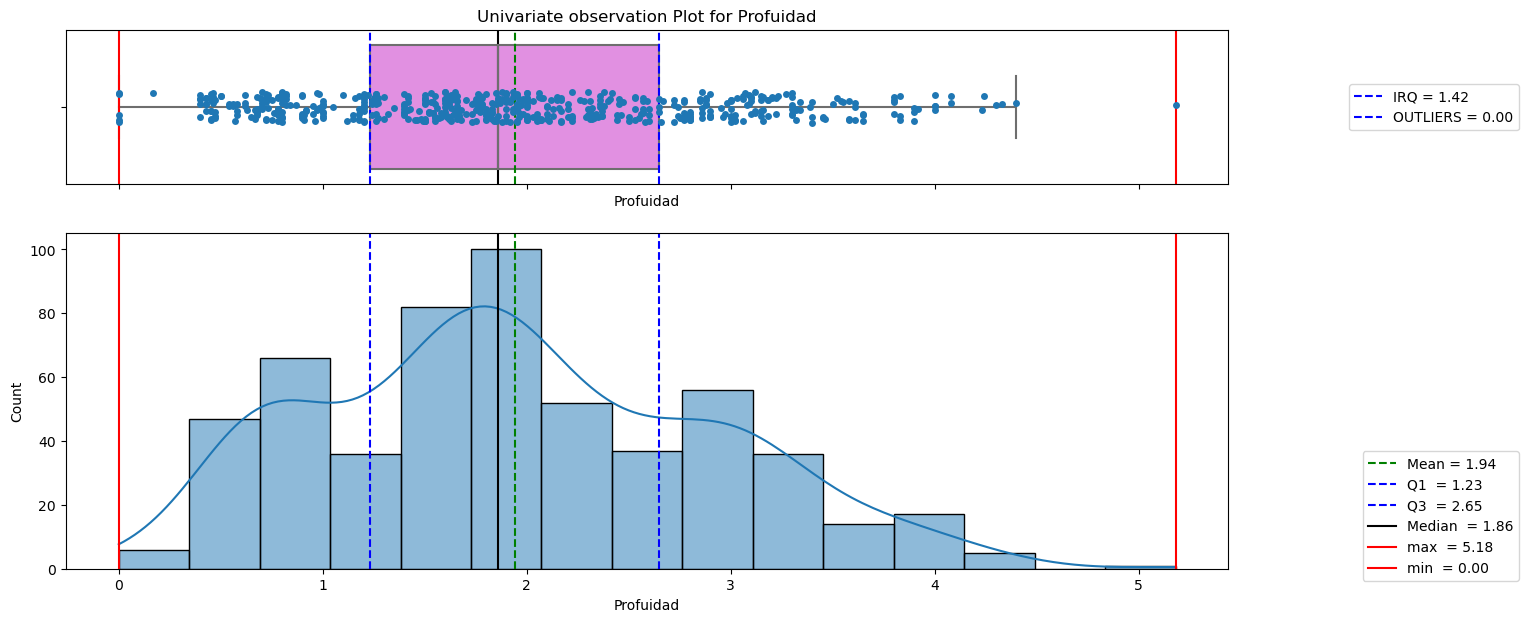

In [13]:
#Plot histo-box-plot for profuindad, (Profundidad = Depth of sampling)
histogram_boxplot(mydata,"Profuidad")

In [15]:
# Profuidad have a normal distribution, missing values to be replaced by mean. (Profundidad = Depth of sampling)
mydata['Profuidad'] = mydata['Profuidad'].replace(np.nan, mydata['Profuidad'].mean())
len(mydata[mydata['Profuidad'].isna()])

0

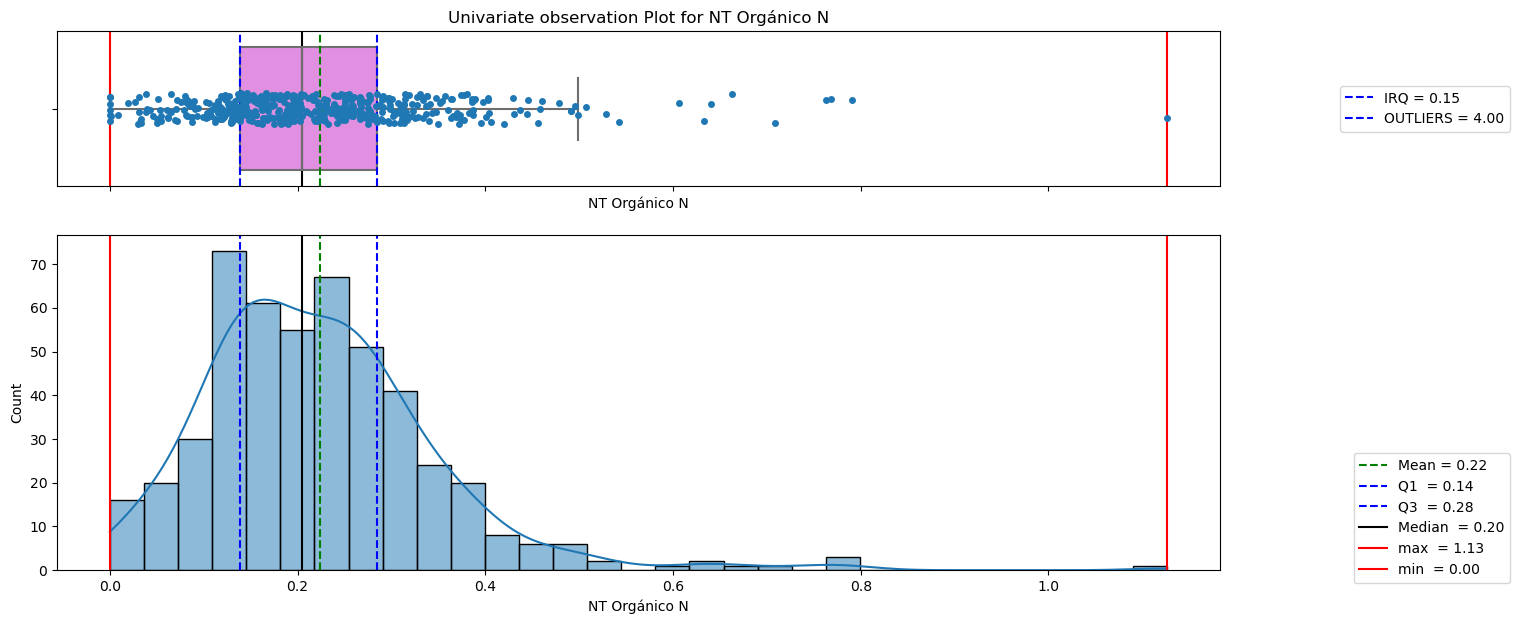

In [16]:
histogram_boxplot(mydata,"NT Orgánico N")

In [ ]:
#Plot histo-box-plot for Zona fótica. (Zona fótica = photic zone)
histogram_boxplot(mydata,"Zona fótica")

In [17]:
# Zona fótica have a normal distribution, missing values to be replaced by mean. (Zona fótica = photic zone)
mydata['Zona fótica'] = mydata['Zona fótica'].replace(np.nan, mydata['Zona fótica'].mean())
len(mydata[mydata['Zona fótica'].isna()])

0

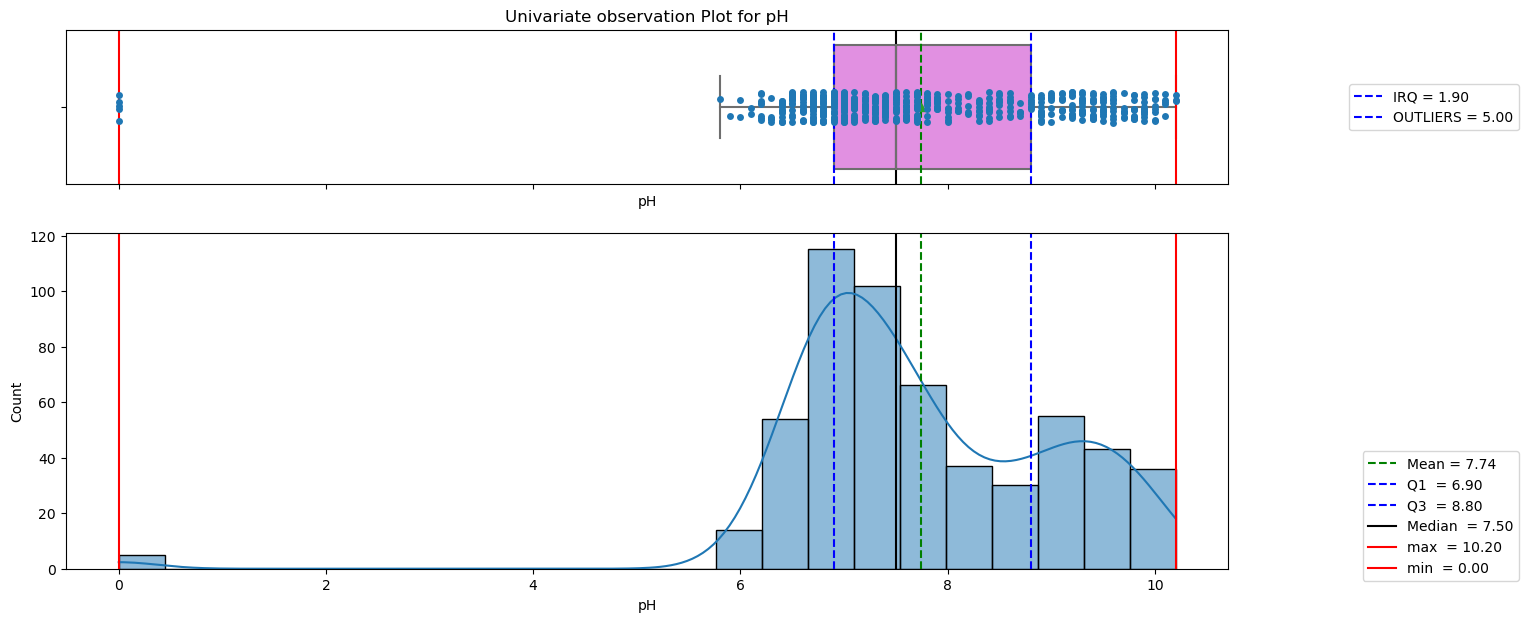

In [18]:
#Plot histo-box-plot for pH. (Zona fótica = pH)
histogram_boxplot(mydata,"pH")

In [19]:
# pH values below 5 seem to be a measurement error and as pH is skewed  these values will be replaced by median

mydata['pH'].mask(mydata['pH']  < 5 ,mydata['pH'].median(), inplace=True)
mydata['pH'] = mydata['pH'].replace(np.nan, mydata['pH'].median())
len(mydata[mydata['pH'].isna()])

0

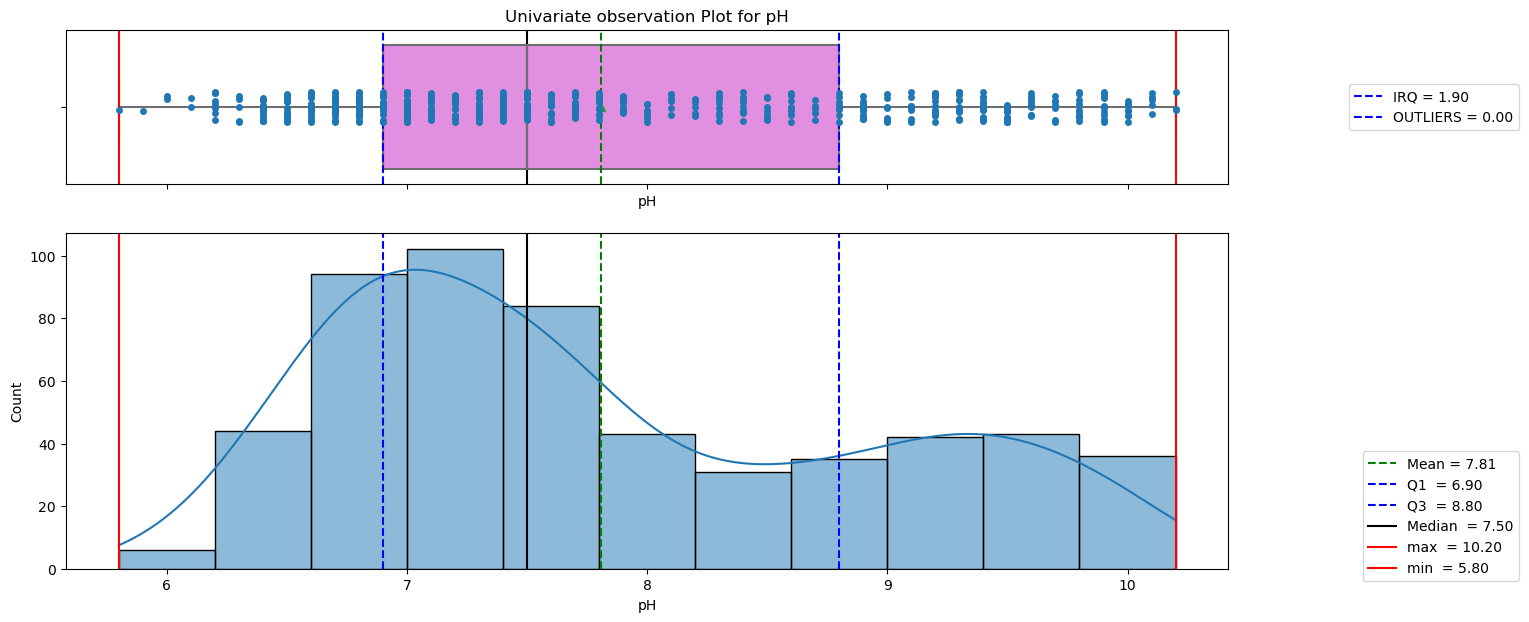

In [20]:
#Plot histo-box-plot for pH. 
histogram_boxplot(mydata,"pH")

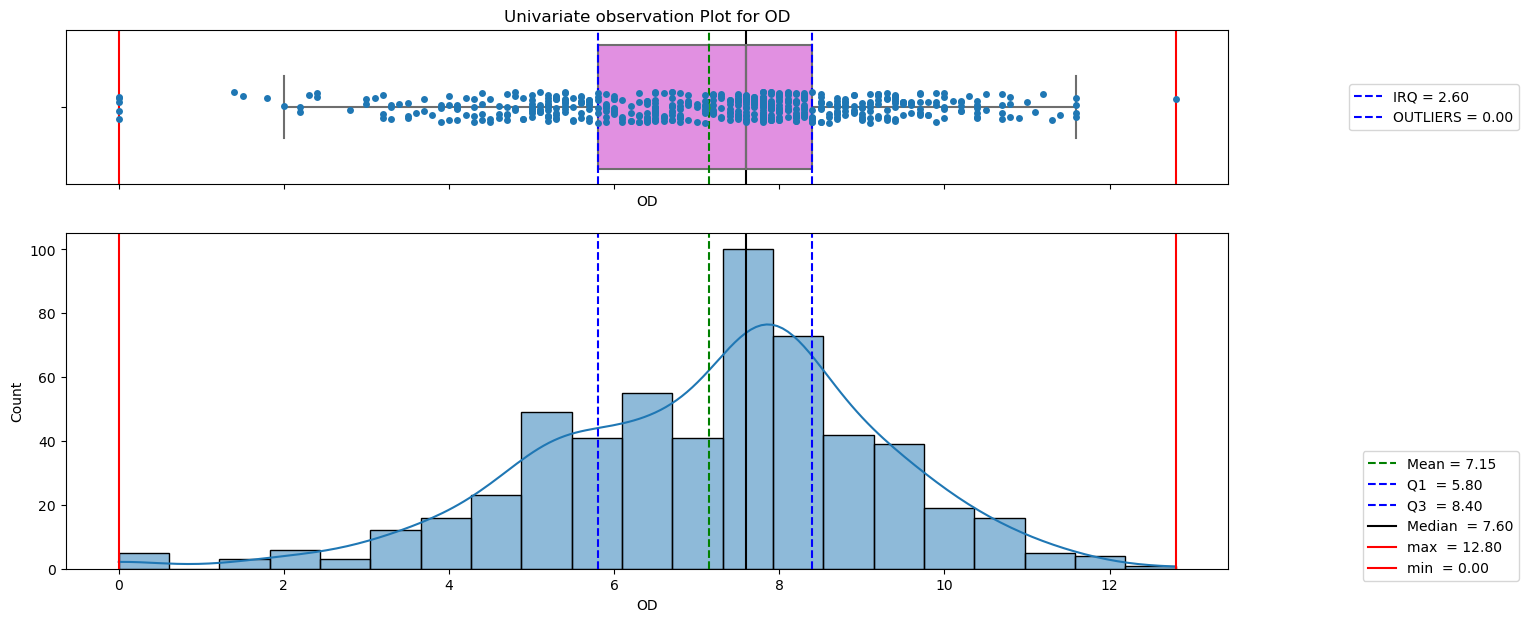

In [21]:
#Plot histo-box-plot for OD. 
histogram_boxplot(mydata,"OD")

In [22]:
# OD have a normal distribution, missing values to be replaced by mean. 
mydata['OD'] = mydata['OD'].replace(np.nan, mydata['OD'].mean())
len(mydata[mydata['OD'].isna()])

0

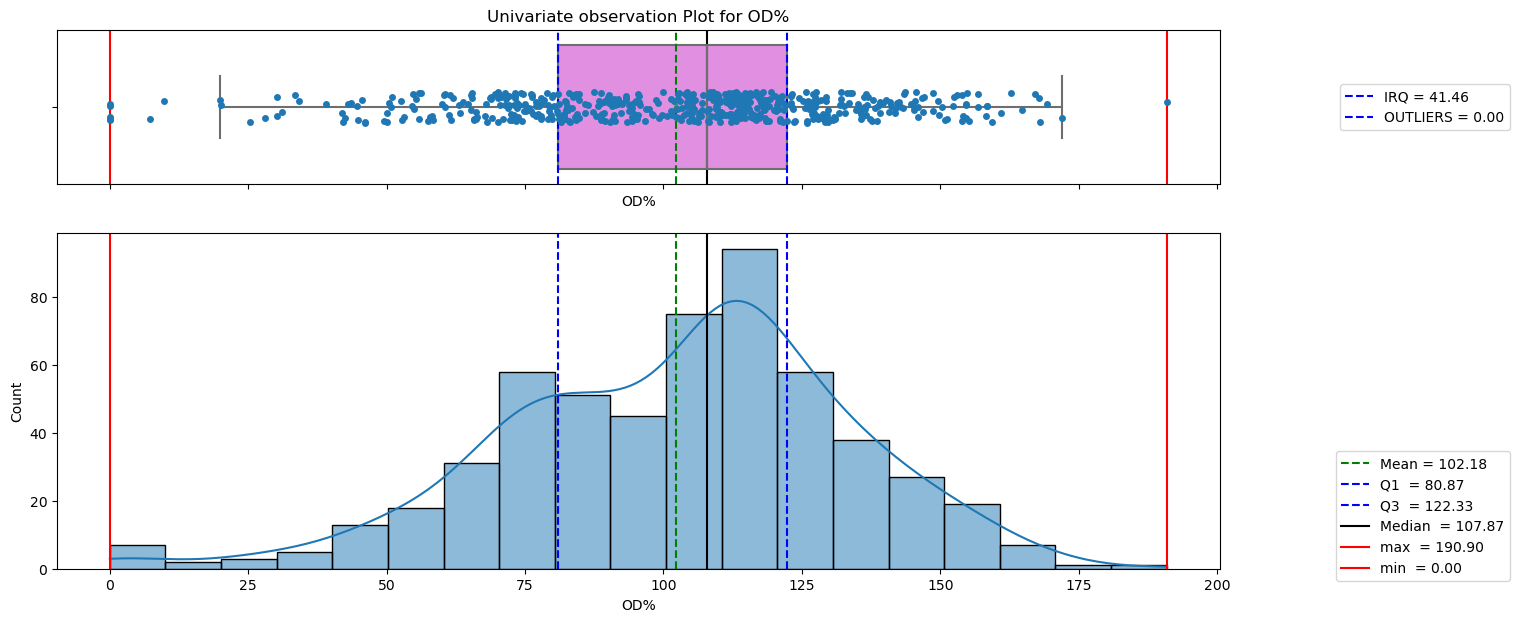

In [23]:
#Plot histo-box-plot for %OD. 
histogram_boxplot(mydata,"OD%")

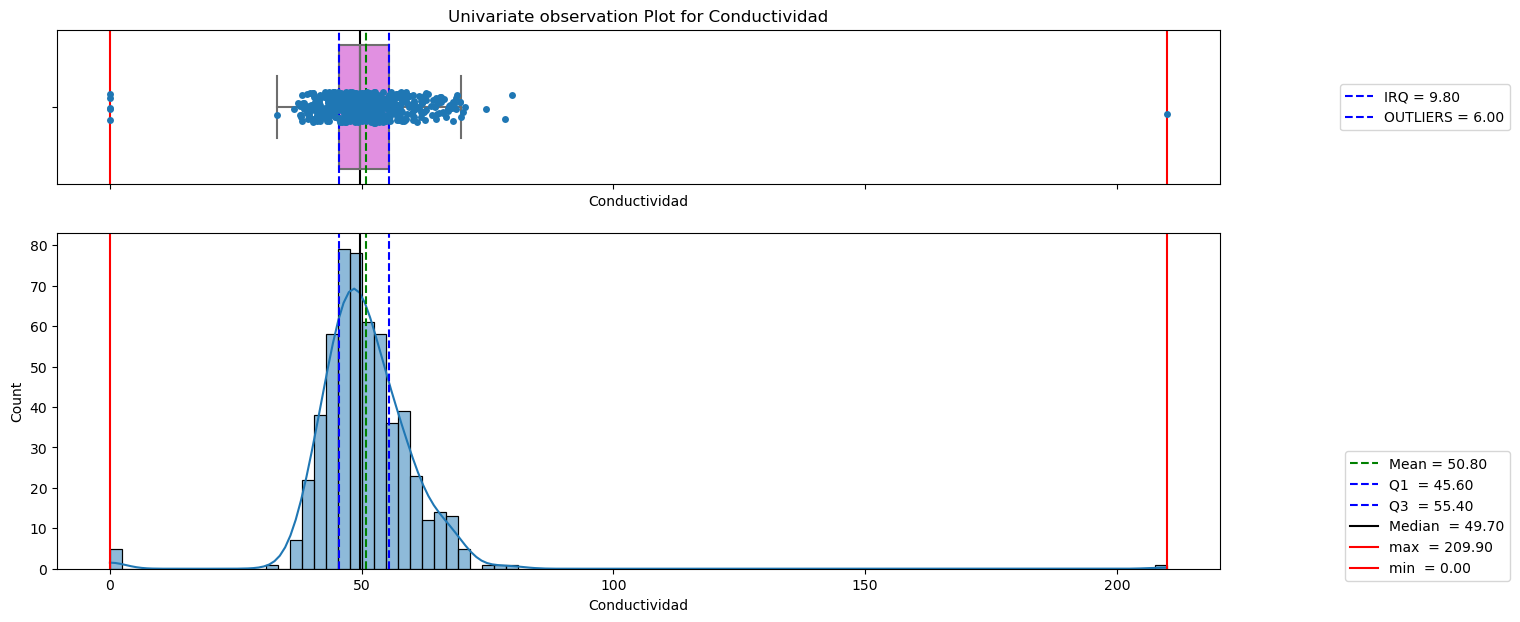

In [24]:
#Plot histo-box-plot for Conductividad. (Conductivity)
histogram_boxplot(mydata,"Conductividad")


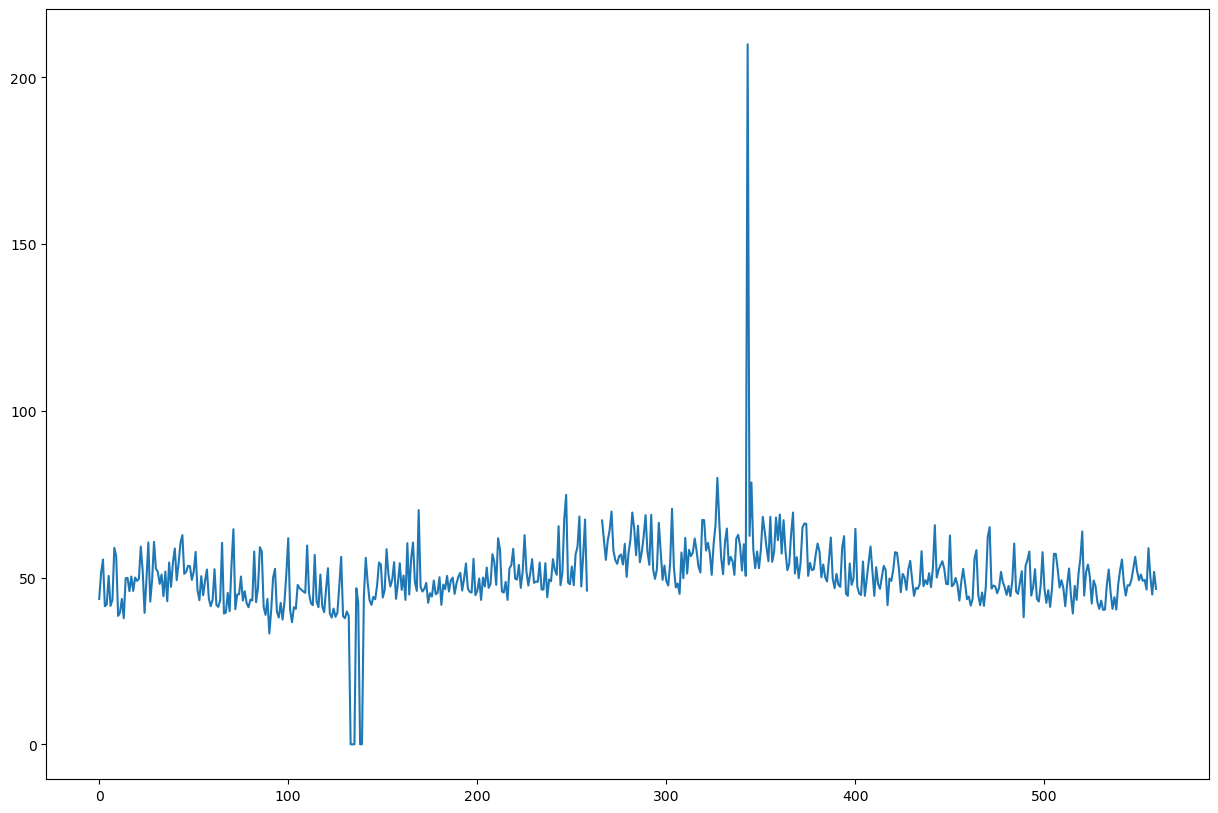

In [25]:
#Line Plot Conductivity  
plt.figure(figsize=(15, 10))
plt.plot(mydata['Conductividad']);

In [26]:
#Outliear below 30 and over 100 seem measurement error,  distribution is normal, outliers and missing value to be replaced by means()
mydata['Conductividad'].mask(mydata['Conductividad']  >  100 ,mydata['Conductividad'].mean(), inplace=True)
mydata['Conductividad'].mask(mydata['Conductividad']  <  30 ,mydata['Conductividad'].mean(), inplace=True)
mydata['Conductividad'] = mydata['Conductividad'].replace(np.nan, mydata['Conductividad'].mean())
len(mydata[mydata['Conductividad'].isna()])

0

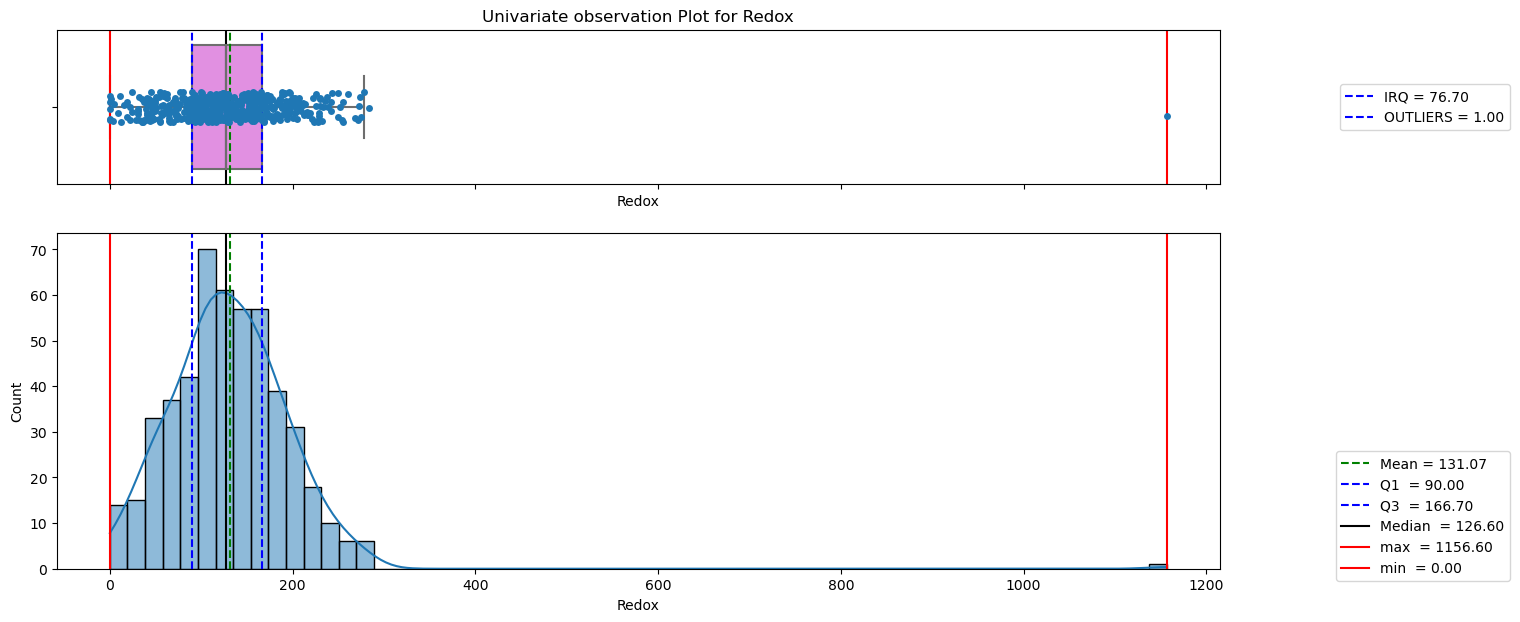

In [27]:
#Plot histo-box-plot for Redox (ORP).
histogram_boxplot(mydata,"Redox")

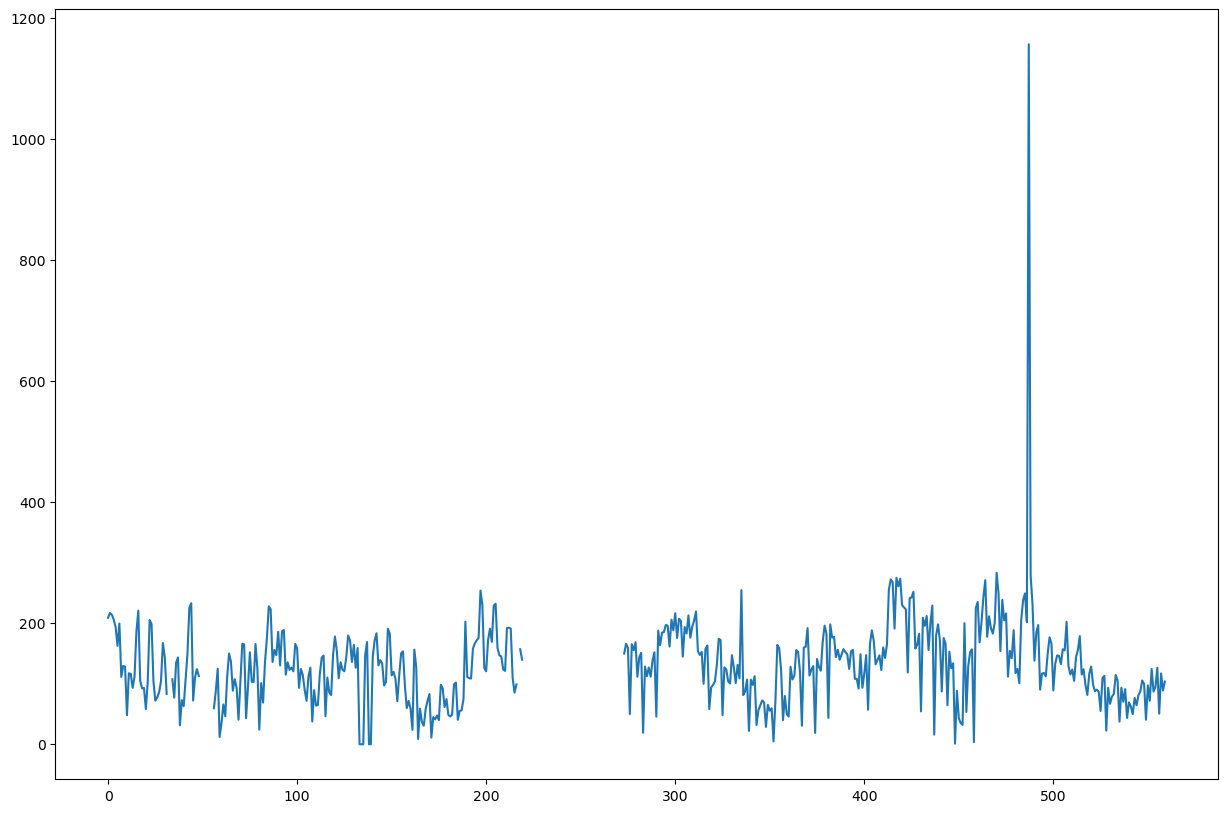

In [28]:
#Line Plot Redox  
plt.figure(figsize=(15, 10))
plt.plot(mydata['Redox']);

In [29]:
# Redox has a normal distribution, the missing values to be replaced by the mean.  Value over 400 seems to be a measurement error
mydata['Redox'] = mydata['Redox'].replace(np.nan, mydata['Redox'].mean())
mydata['Redox'].mask(mydata['Redox']  >  400 ,mydata['Redox'].mean(), inplace=True)
len(mydata[mydata['Redox'].isna()])

0

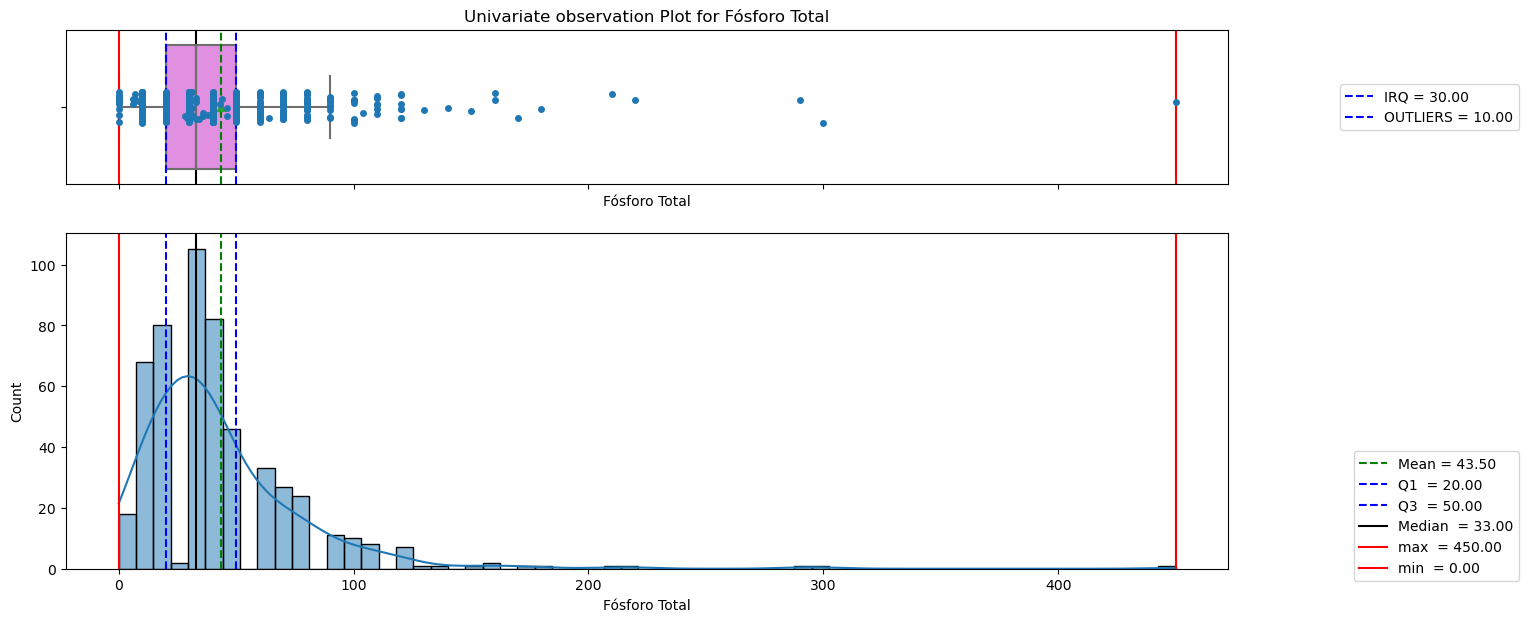

In [30]:
#Plot histo-box-plot for Redox (ORP).
histogram_boxplot(mydata,"Fósforo Total")

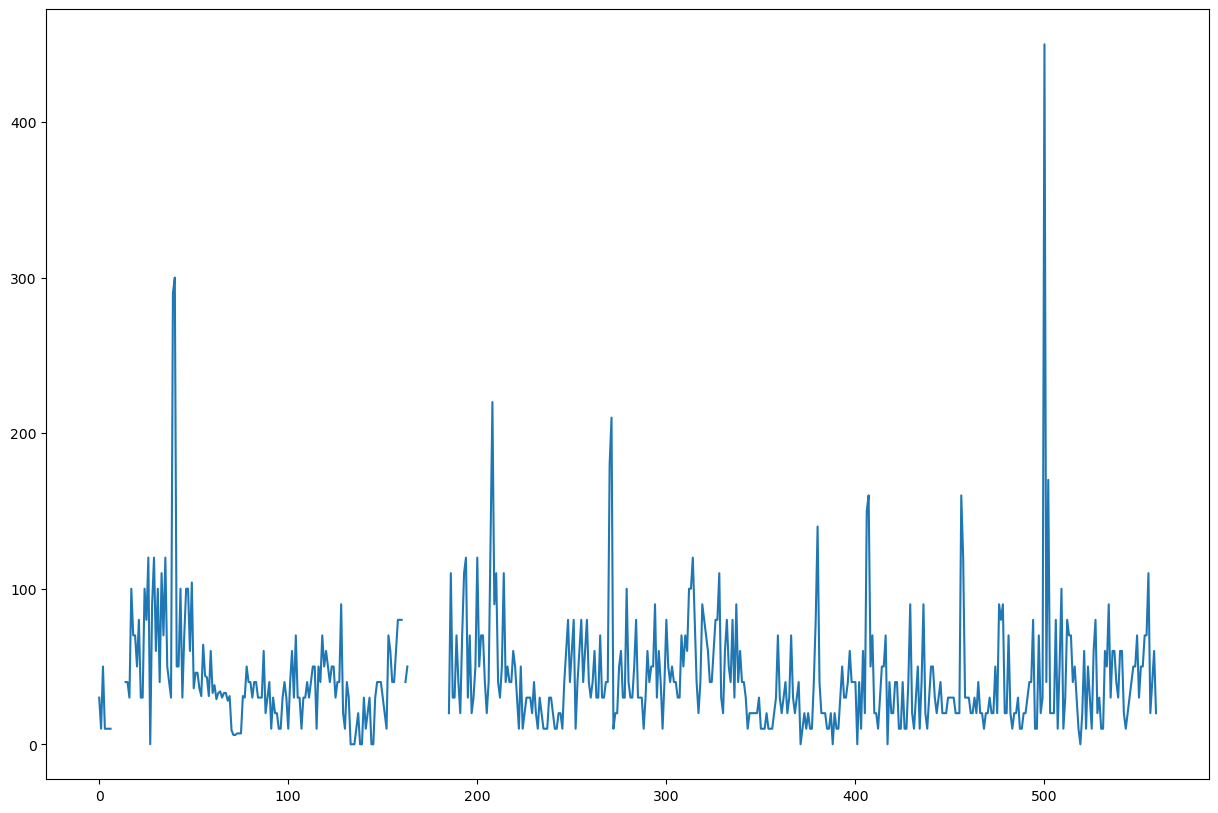

In [31]:
#Line Plot Fósforo Fósforo Total   (Total Phosphate)
plt.figure(figsize=(15, 10))
plt.plot(mydata['Fósforo Total']);

In [34]:
# Fósforo Total has a normal distribution, the missing values to be replaced by the mean.  Value over 400 seems to be a measurement error
mydata['Fósforo Total'] = mydata['Fósforo Total'].replace(np.nan, mydata['Fósforo Total'].mean())
len(mydata[mydata['Fósforo Total'].isna()])

0

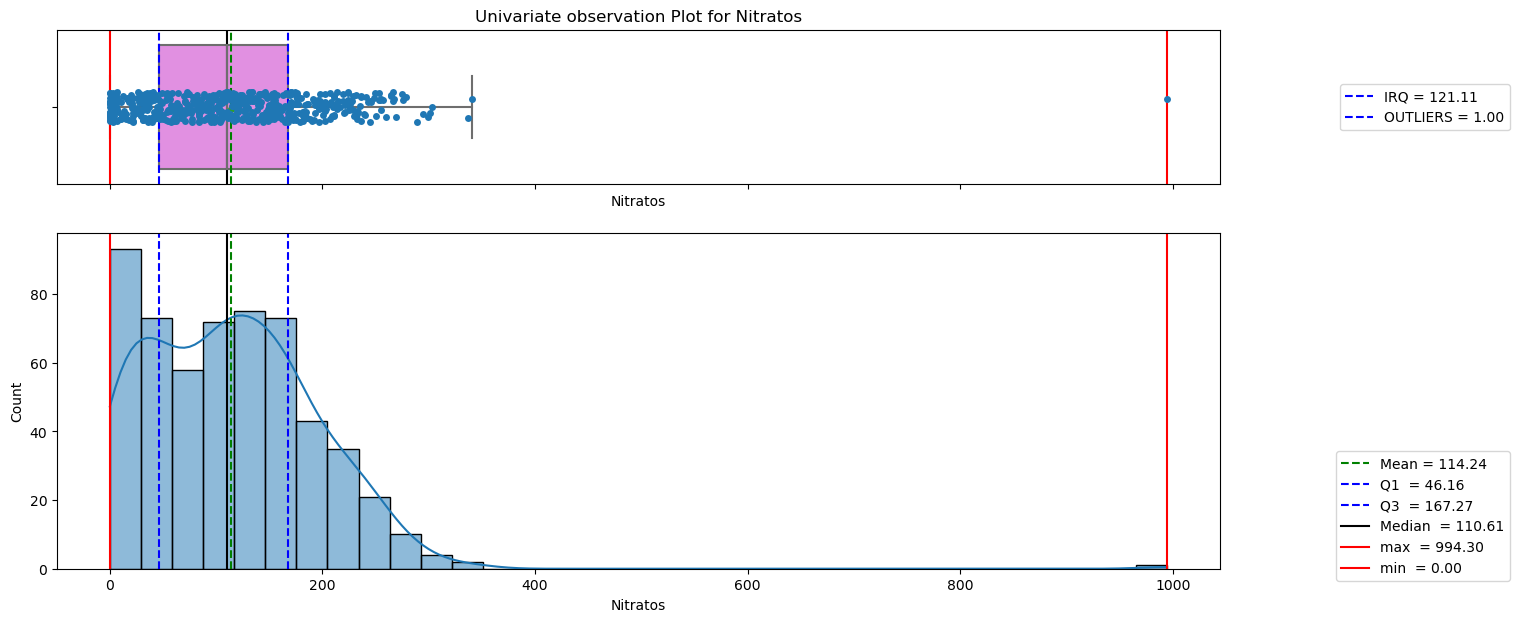

In [35]:
#Plot histo-box-plot for Redox (Nitrates).
histogram_boxplot(mydata,"Nitratos")

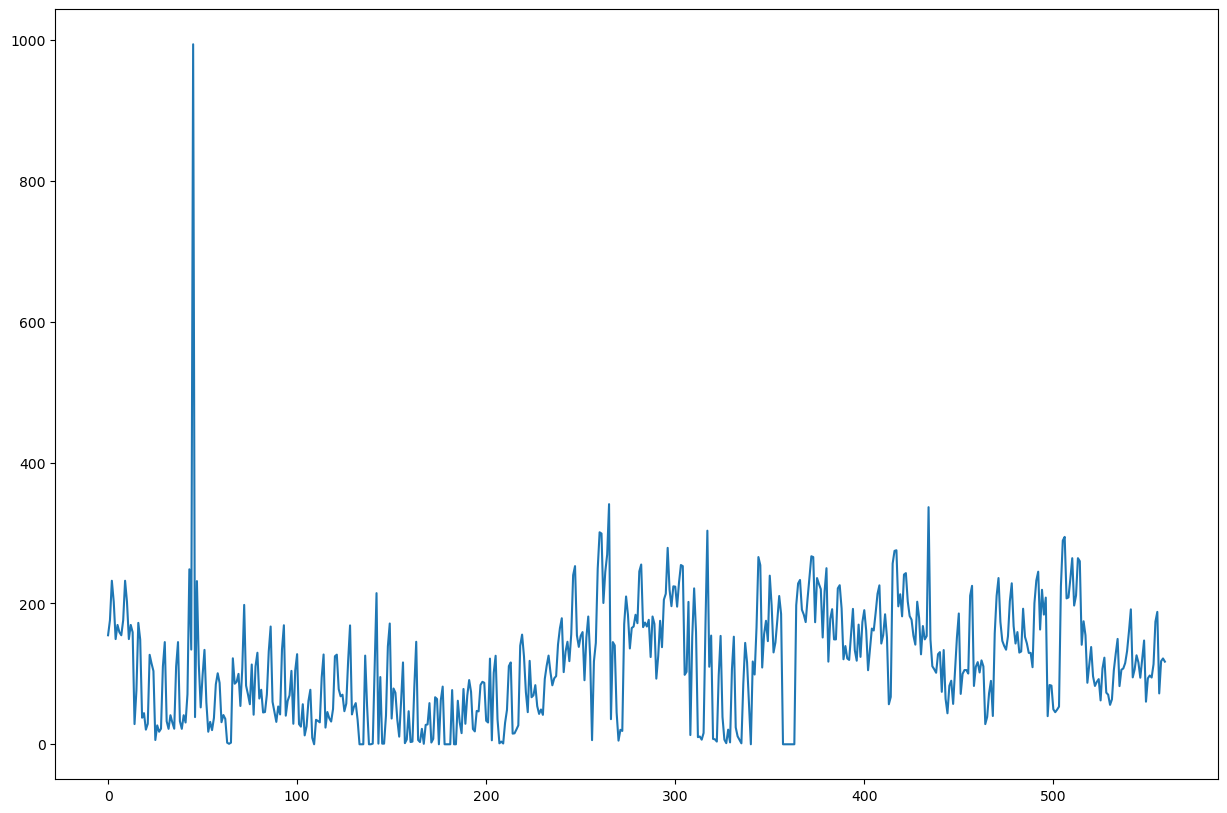

In [37]:
#Line Plot Fósforo Nitratos  (Nitrates)
plt.figure(figsize=(15, 10))
plt.plot(mydata['Nitratos']);


In [38]:
# There 
Zeros = len(mydata[mydata['Nitratos'] == 0])

print(f"The data has { Zeros } records with  0 for Nitratos.")  # f-string

The data has 21 records with  0 for Nitratos.


In [39]:
# Nitrates no missing values, outlier seem to be measure error to be replaced by the means  
mydata['Nitratos'].mask(mydata['Nitratos']  >  400 ,mydata['Nitratos'].mean(), inplace=True)
# Nitrates no missing values, outlier seem to be measure error to be replaced by the means  
mydata['Nitratos'].mask(mydata['Nitratos']  ==  0 ,mydata['Nitratos'].mean(), inplace=True)
len(mydata[mydata['Nitratos'].isna()])

0

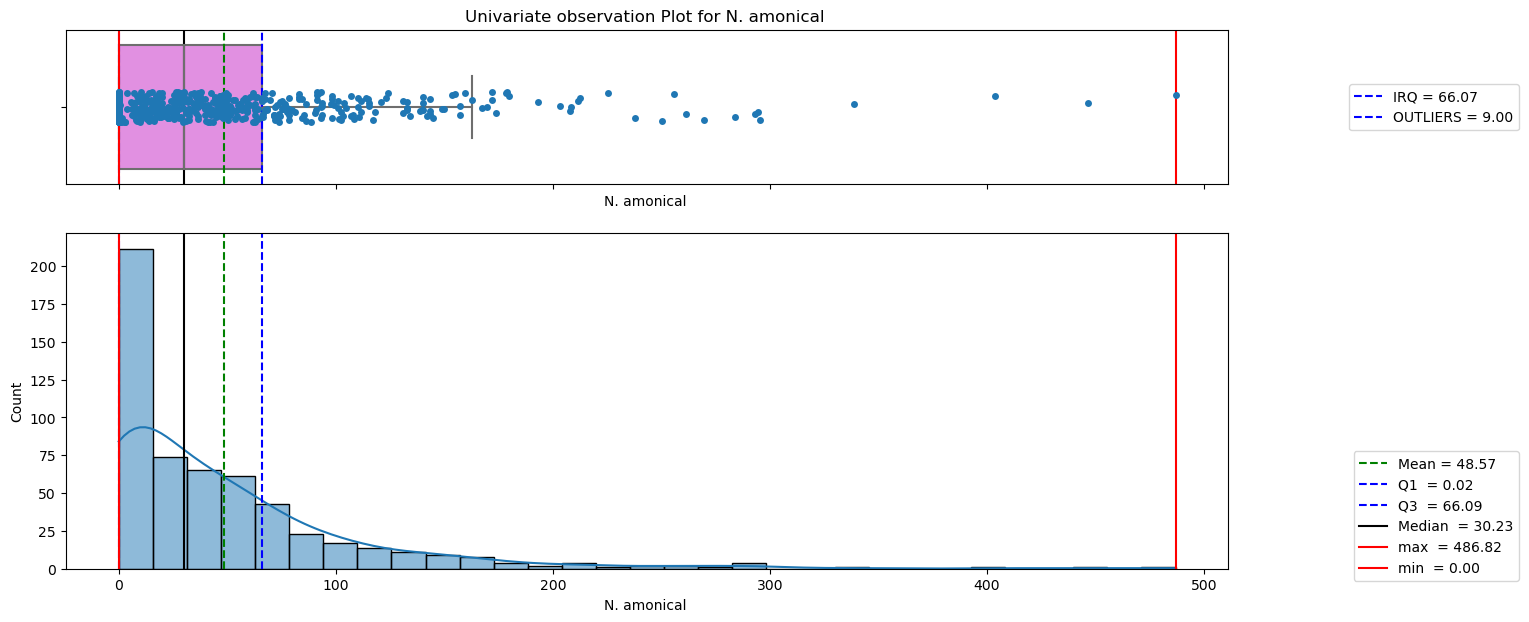

In [40]:
#Plot histo-box-plot for N. amonical.
histogram_boxplot(mydata,"N. amonical ")

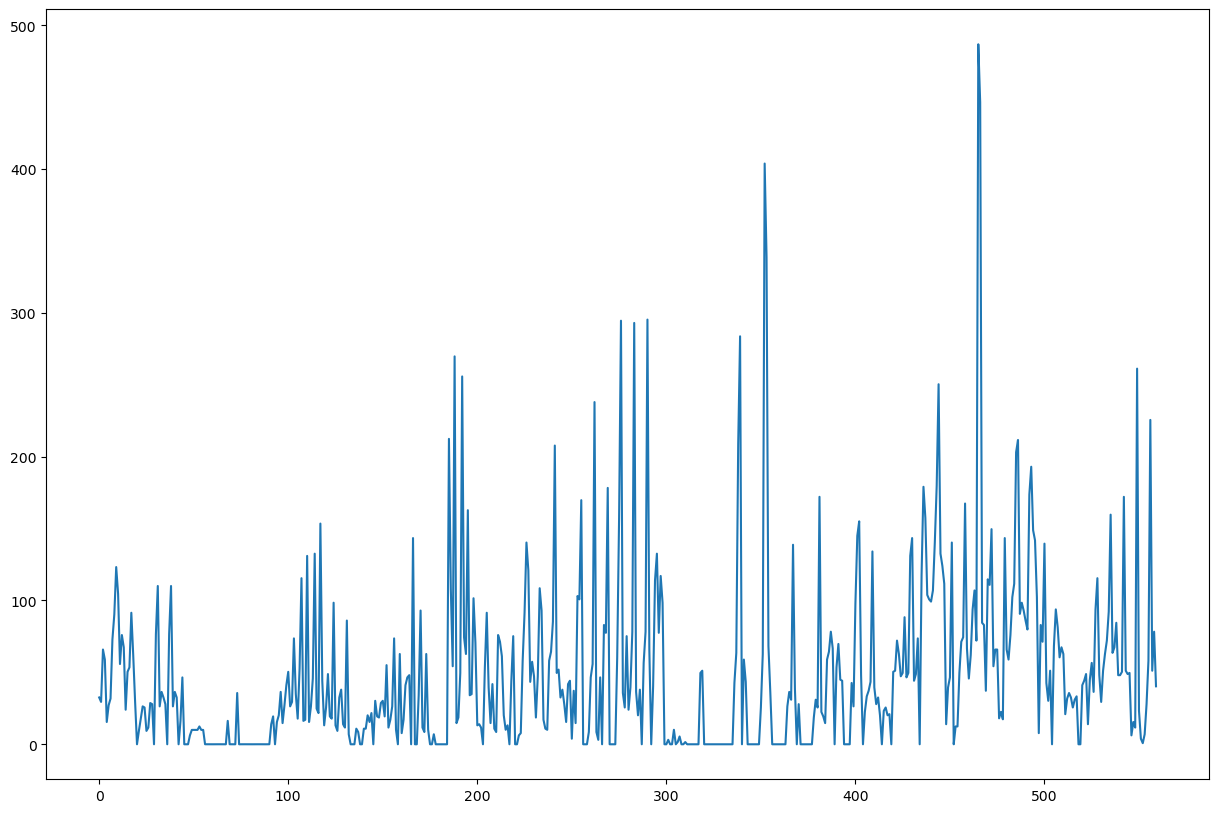

In [41]:
#Line Plot N. amonical
plt.figure(figsize=(15, 10))
plt.plot(mydata['N. amonical ']);

In [42]:
# There 
Zeros = len(mydata[mydata['N. amonical '] == 0])

print(f"The data has { Zeros } records with  0 for N. amonical.")  # f-string

The data has 123 records with  0 for N. amonical.


In [43]:
# N. amonical no missing values, too many zeros  to be replaced by the median  
mydata['N. amonical '].mask(mydata['N. amonical ']  ==  0 ,mydata['N. amonical '].median(), inplace=True)
len(mydata[mydata['N. amonical '].isna()])

0

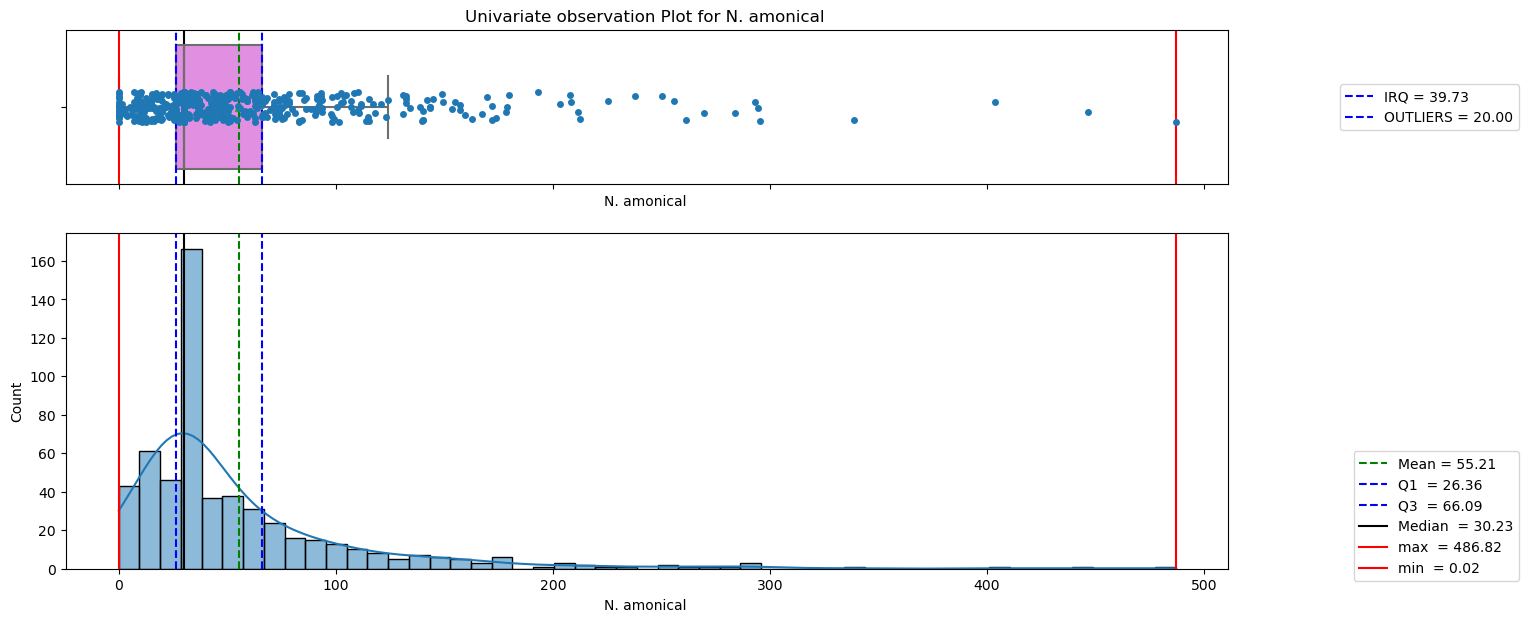

In [44]:
#Plot histo-box-plot for N. amonical.
histogram_boxplot(mydata,"N. amonical ")

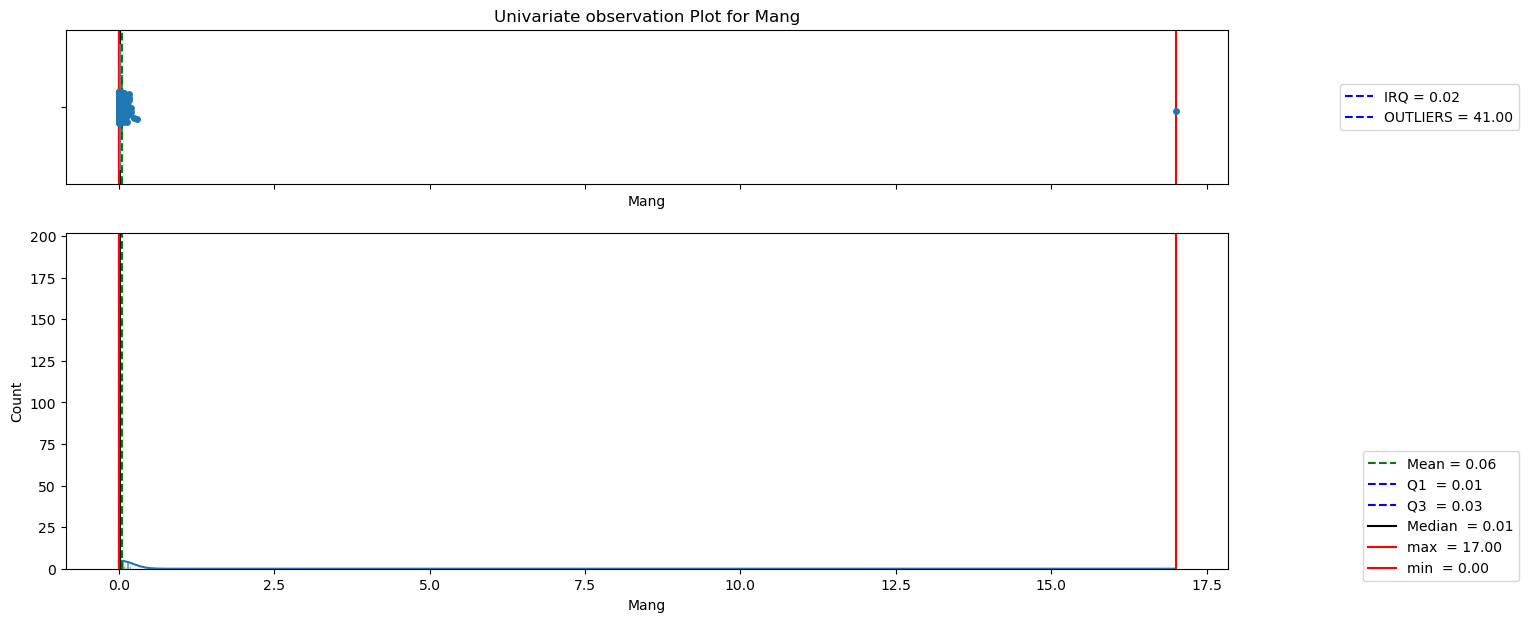

In [45]:
#Plot histo-box-plot for Mang.
histogram_boxplot(mydata,"Mang")

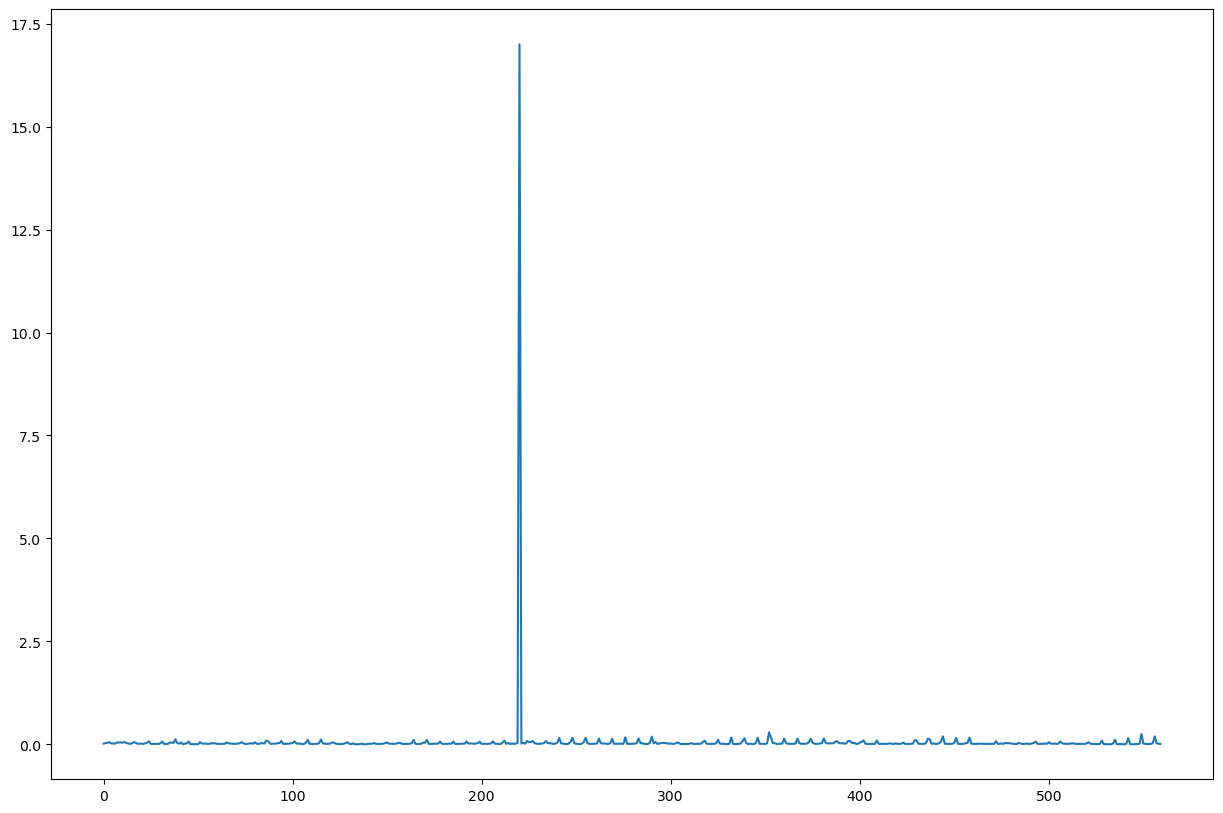

In [46]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['Mang'], label = "Mang");

In [47]:
# Values over 2.5 seems to be measure error 
mydata['Mang'].mask(mydata['Mang']  >  2.5 ,mydata['Mang'].median(), inplace=True)
len(mydata[mydata['Mang'].isna()])

0

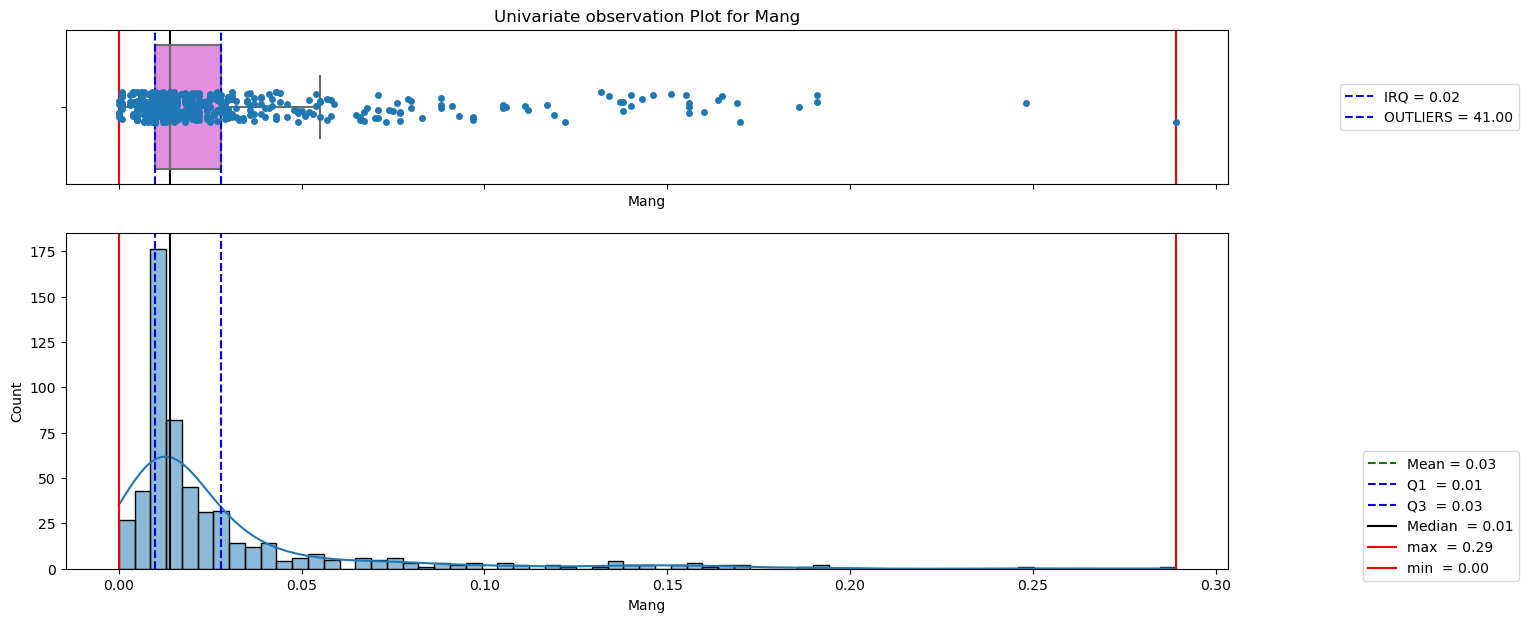

In [48]:
#Plot histo-box-plot for Mang.
histogram_boxplot(mydata,"Mang")

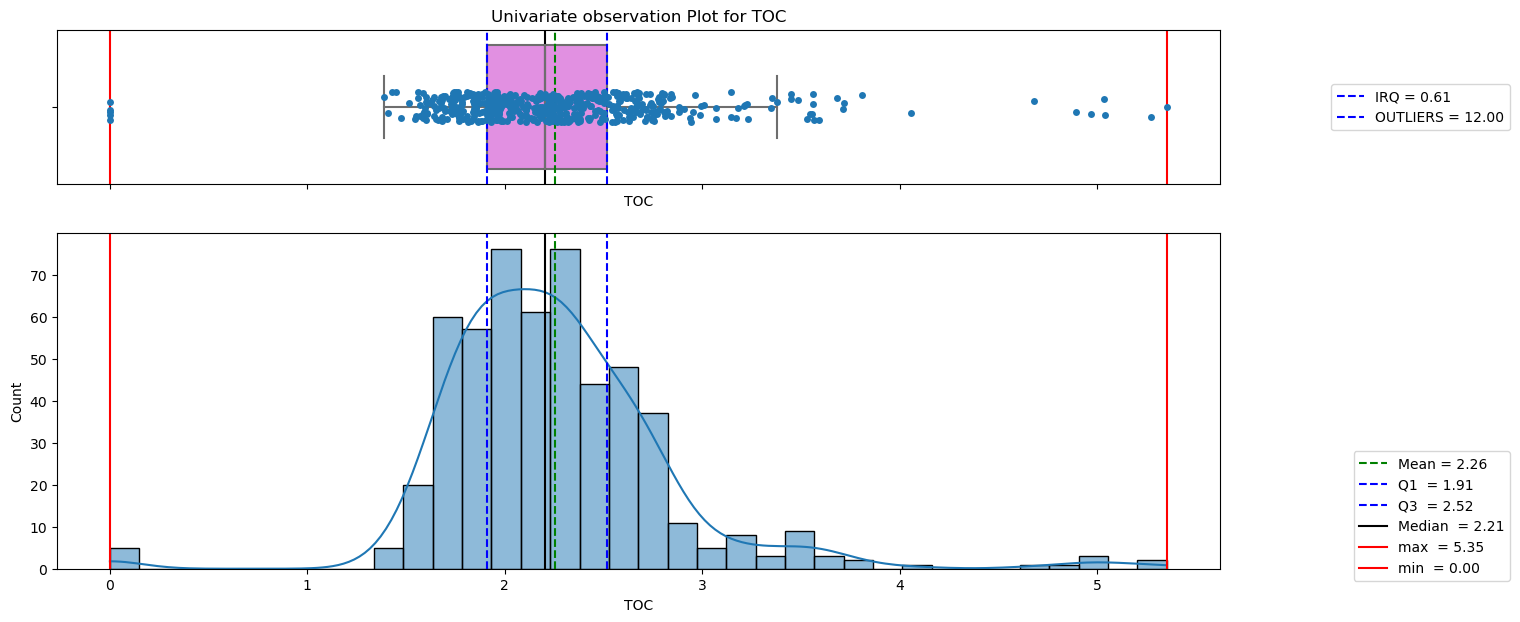

In [49]:
#Plot histo-box-plot for Mang.
histogram_boxplot(mydata,"TOC")

In [50]:
#Normal distribution filling missing values with mean
mydata['TOC'].fillna(mydata['TOC'].mean(), inplace=True)
len(mydata[mydata['TOC'].isna()])

0

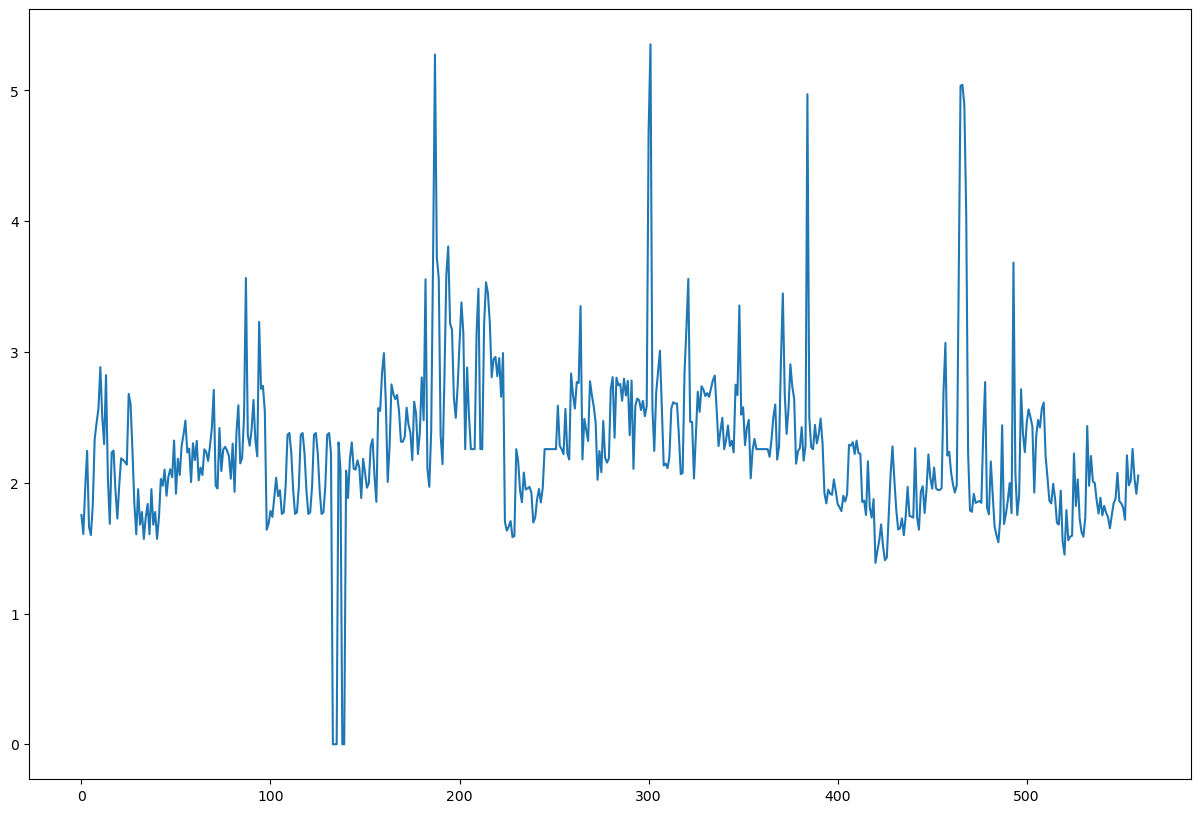

In [51]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['TOC'], label = "TOC");

In [52]:
# Replacing Zero by mean the median  
mydata['TOC'].mask(mydata['TOC']  ==  0 ,mydata['TOC'].median(), inplace=True)
len(mydata[mydata['TOC'].isna()])

0

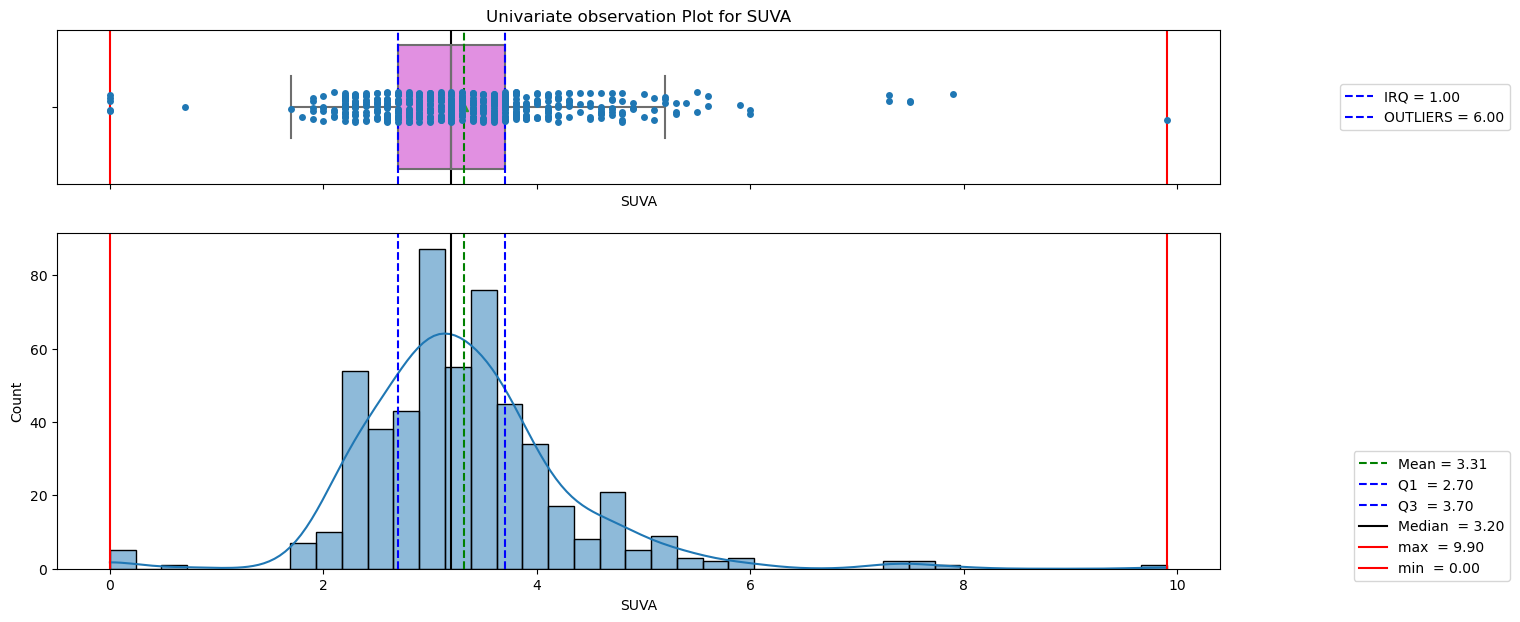

In [53]:
#Plot histo-box-plot for SUVA.
histogram_boxplot(mydata,"SUVA")

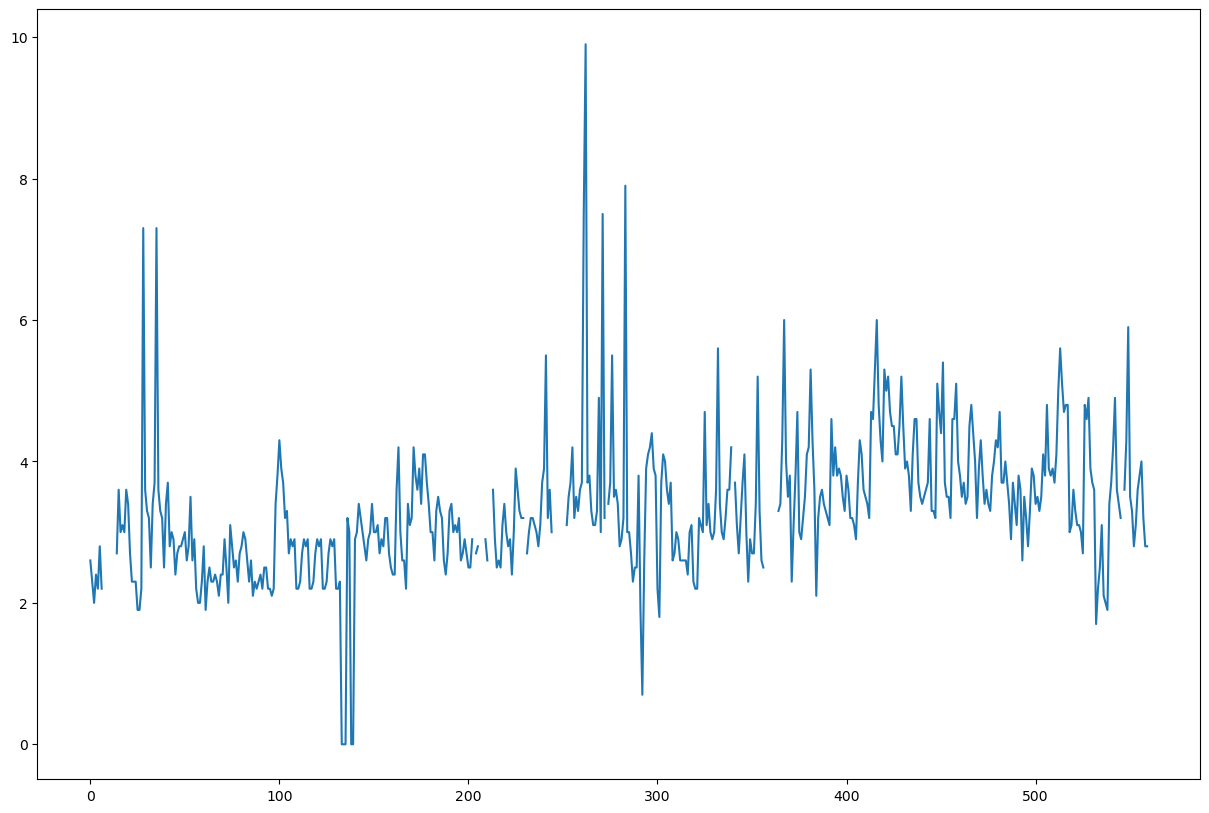

In [54]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['SUVA'], label = "SUVA");

In [55]:
#Normal distribution filling missing values with mean
mydata['SUVA'].fillna(mydata['SUVA'].mean(), inplace=True)
# Replacing Zero by mean the median  
mydata['SUVA'].mask(mydata['SUVA']  ==  0 ,mydata['SUVA'].mean(), inplace=True)
len(mydata[mydata['SUVA'].isna()])

0

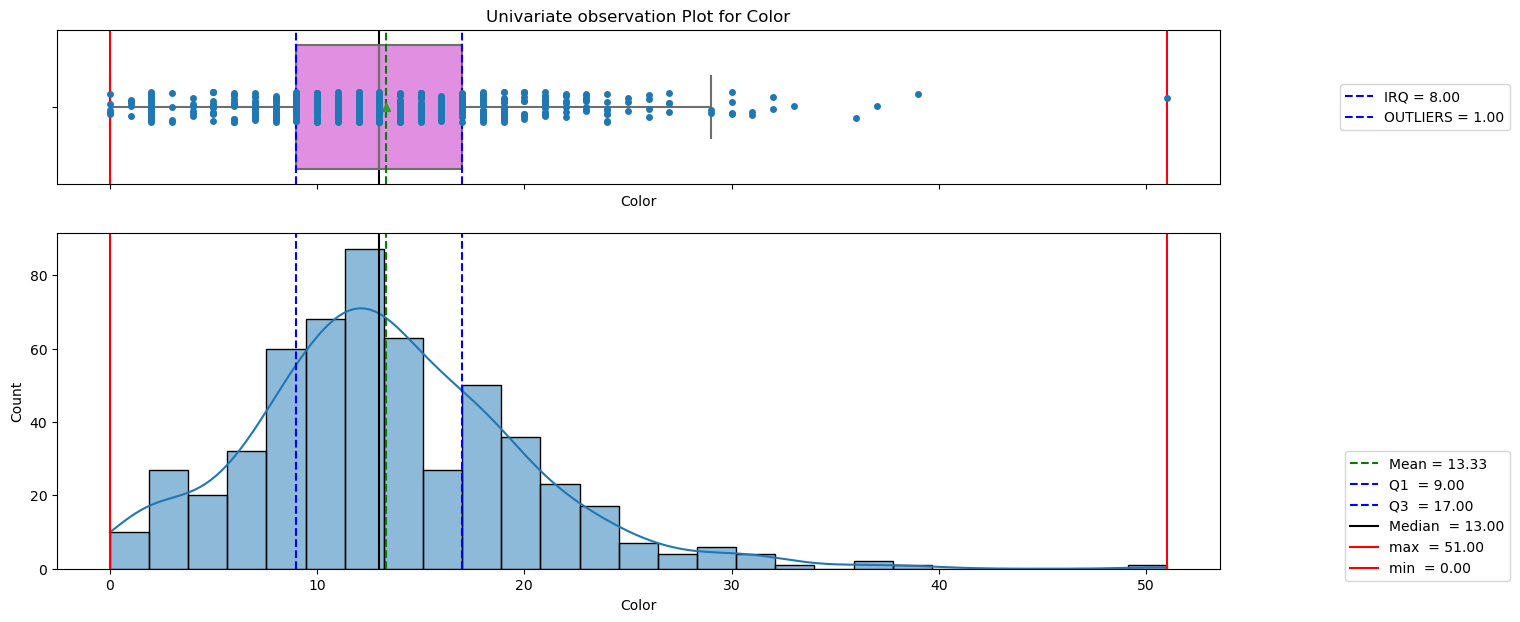

In [56]:
#Plot histo-box-plot for Color.
histogram_boxplot(mydata,"Color")

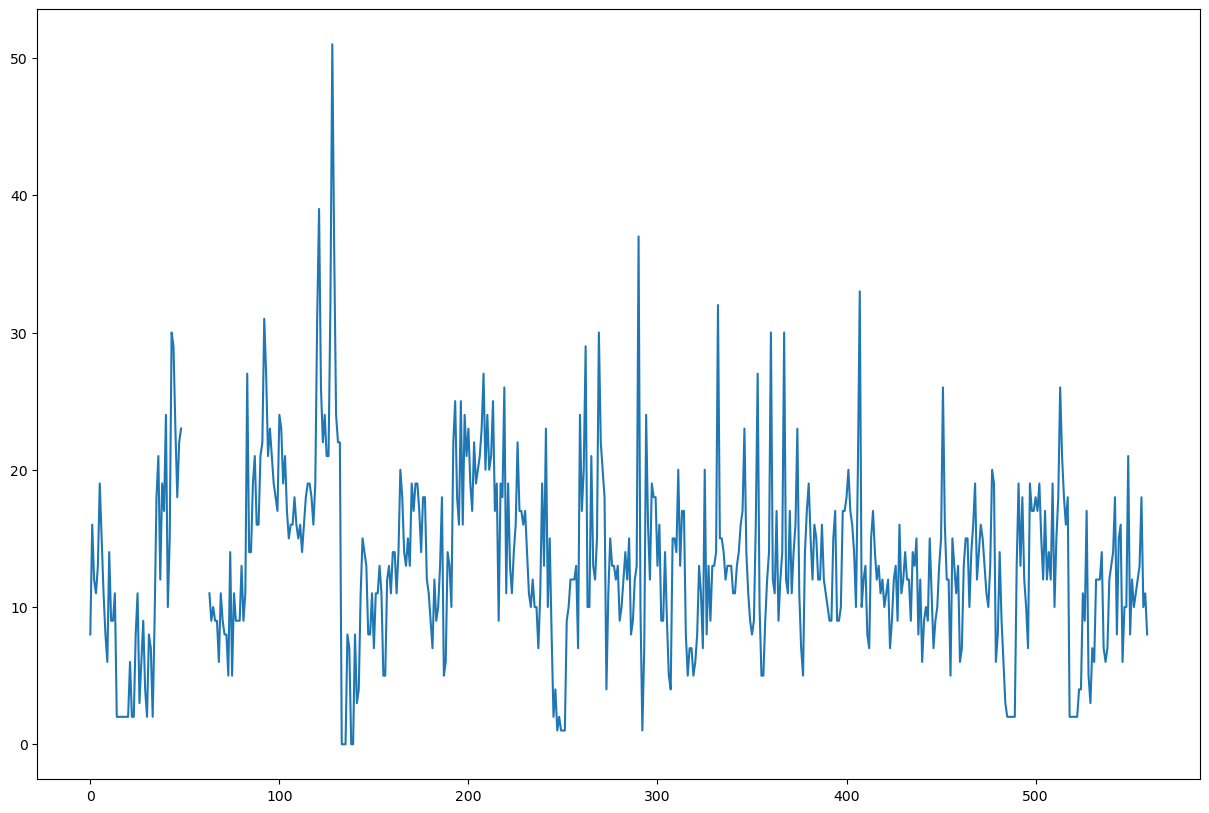

In [57]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['Color'], label = "Color");

In [58]:
#Normal distribution filling missing values with mean
mydata['Color'].fillna(mydata['Color'].mean(), inplace=True)
# Replacing Zero by mean the mean  
mydata['Color'].mask(mydata['Color']  ==  0 ,mydata['Color'].median(), inplace=True)
len(mydata[mydata['Color'].isna()])

0

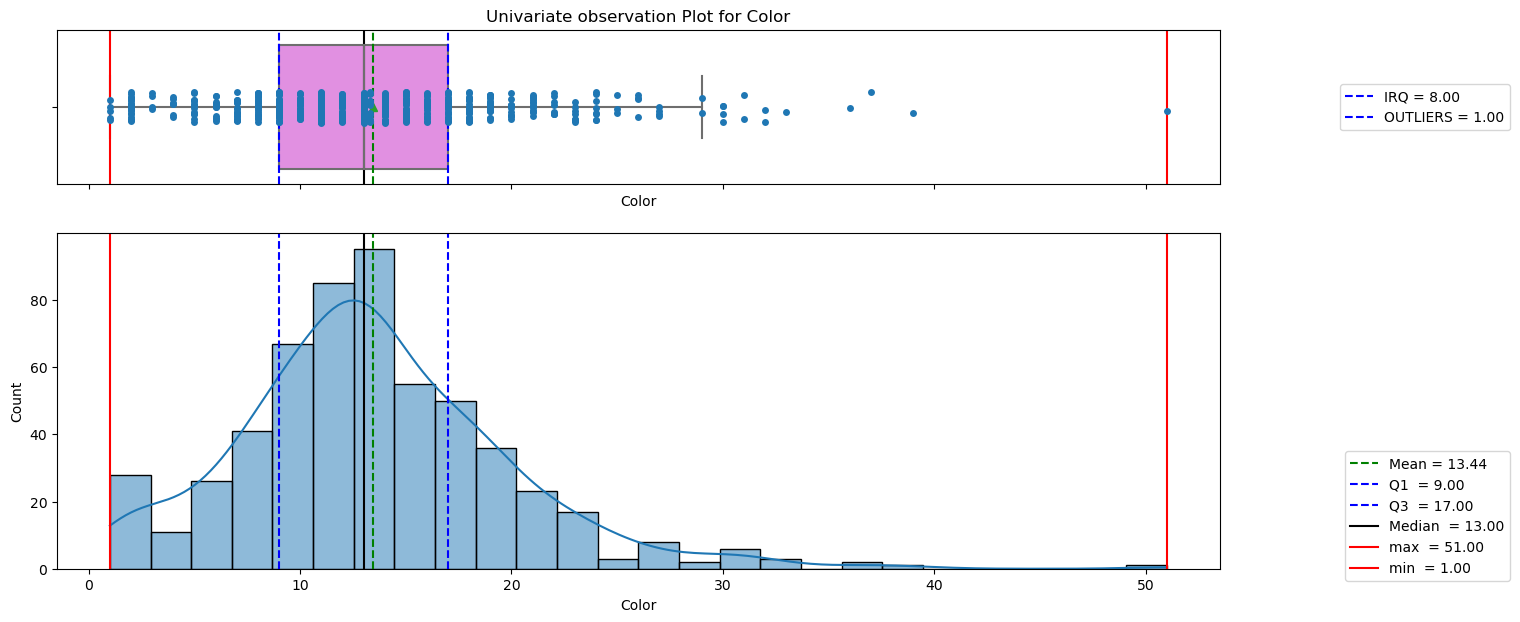

In [60]:
#Plot histo-box-plot for Color.
histogram_boxplot(mydata,"Color")

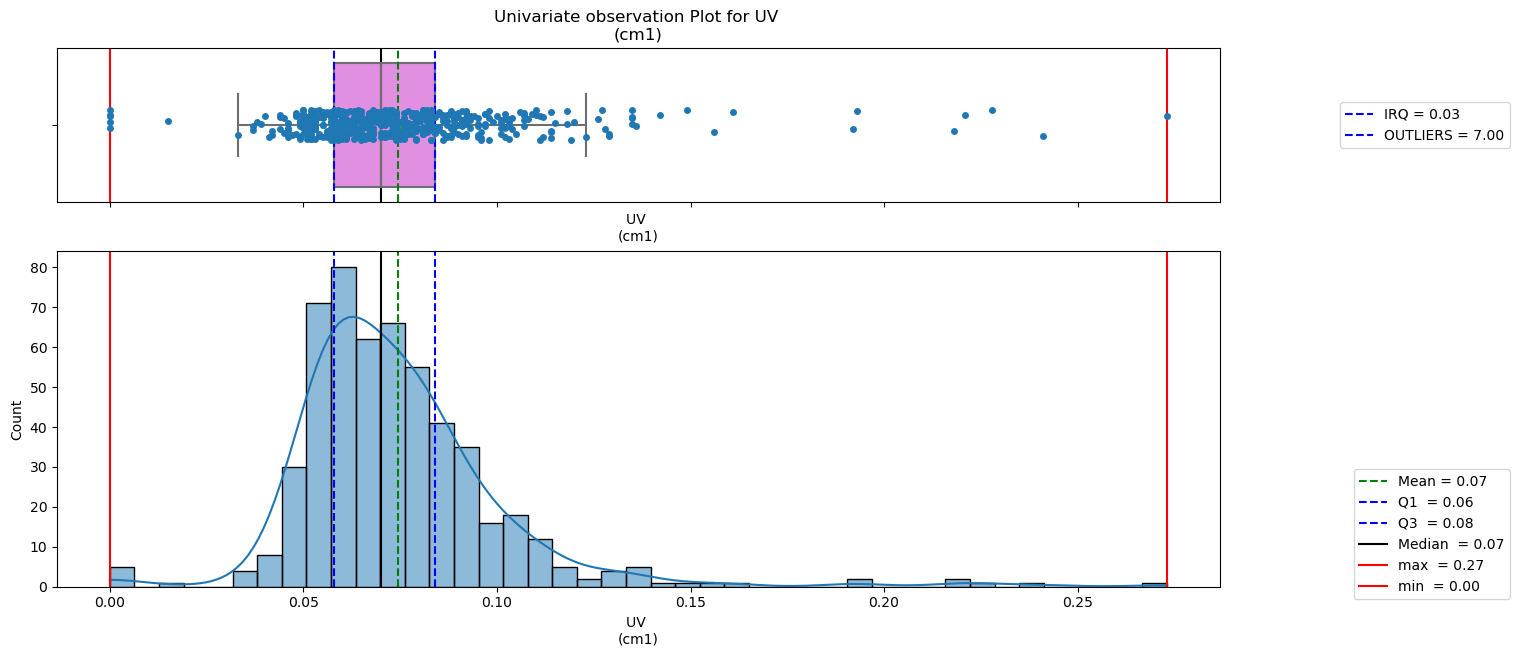

In [61]:
#Plot histo-box-plot for UV \n(cm1).
histogram_boxplot(mydata,"UV \n(cm1)")

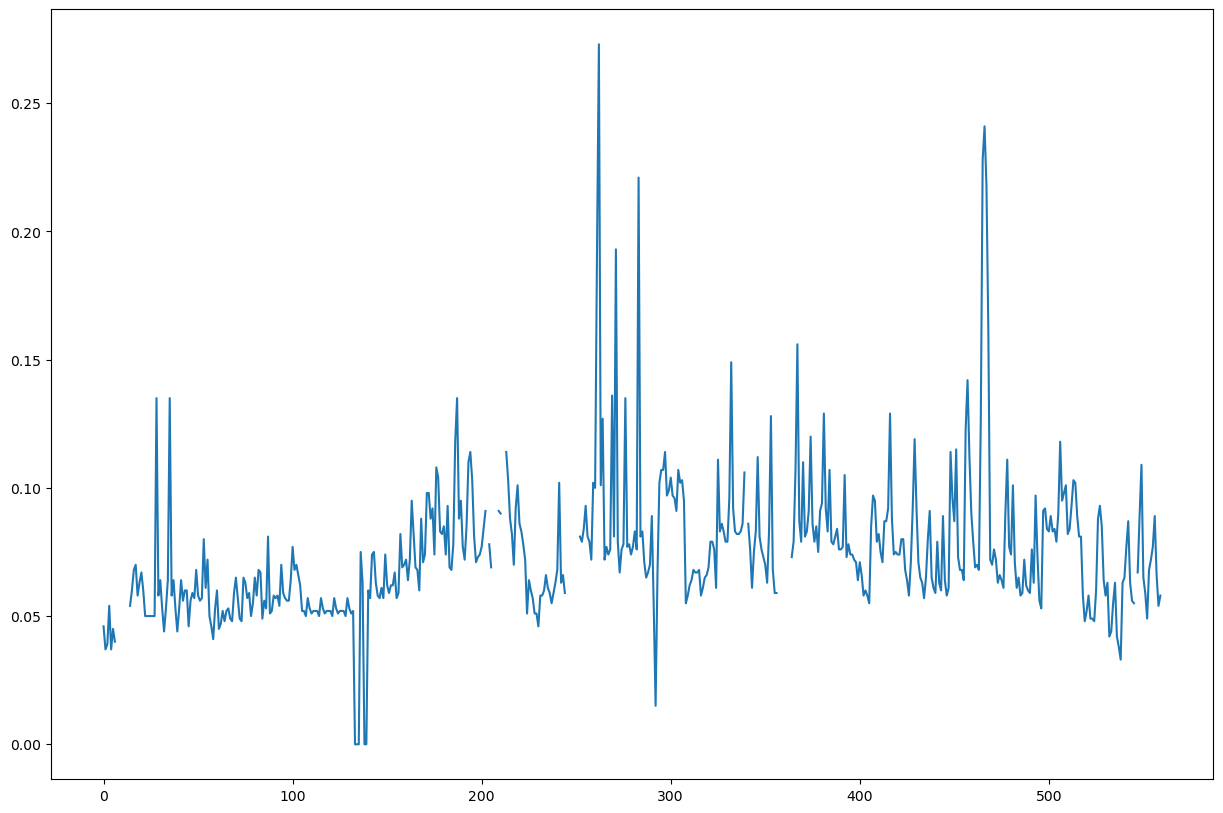

In [62]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['UV \n(cm1)'], label = "UV \n(cm1)");


In [63]:
#Normal distribution filling missing values with mean
mydata['UV \n(cm1)'].fillna(mydata['UV \n(cm1)'].mean(), inplace=True)
# Replacing Zero by mean the mean  
mydata['UV \n(cm1)'].mask(mydata['UV \n(cm1)']  ==  0 ,mydata['UV \n(cm1)'].mean(), inplace=True)
len(mydata[mydata['UV \n(cm1)'].isna()])

0

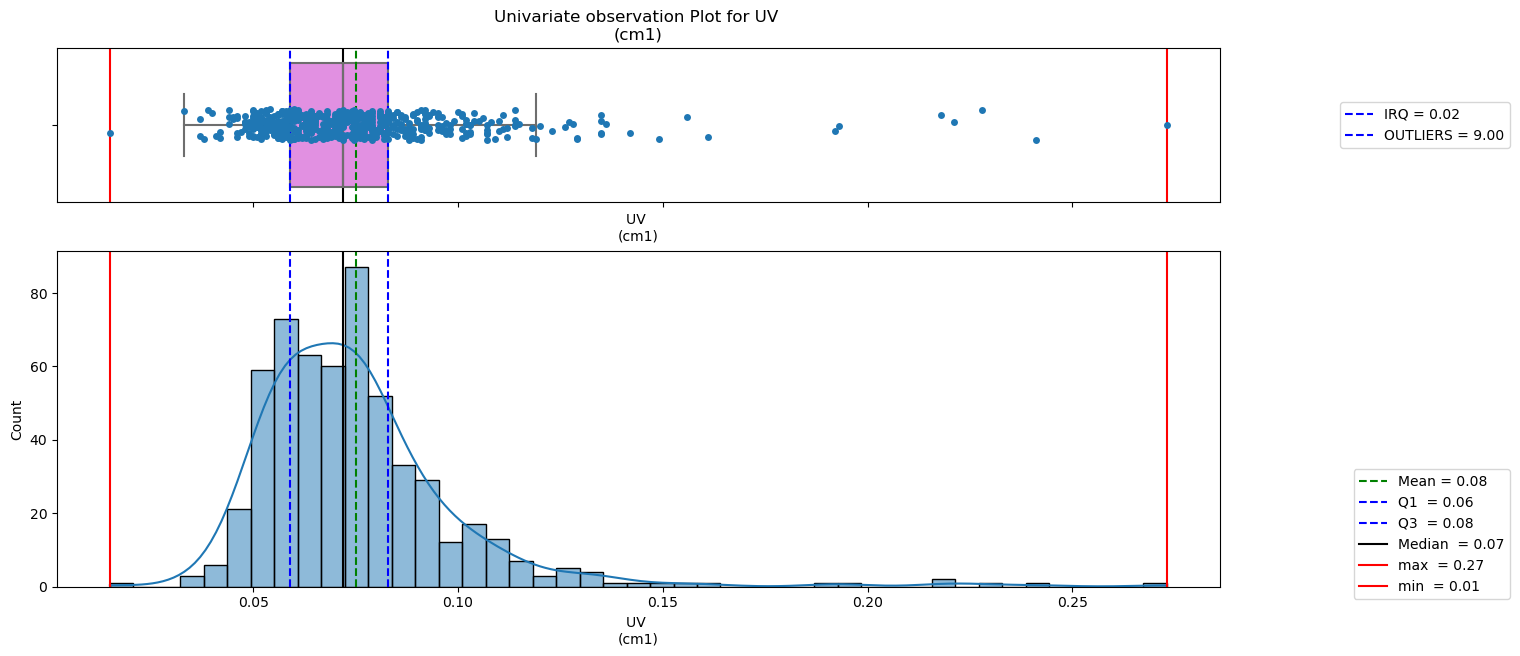

In [65]:
#Plot histo-box-plot for UV \n(cm1).
histogram_boxplot(mydata,"UV \n(cm1)")

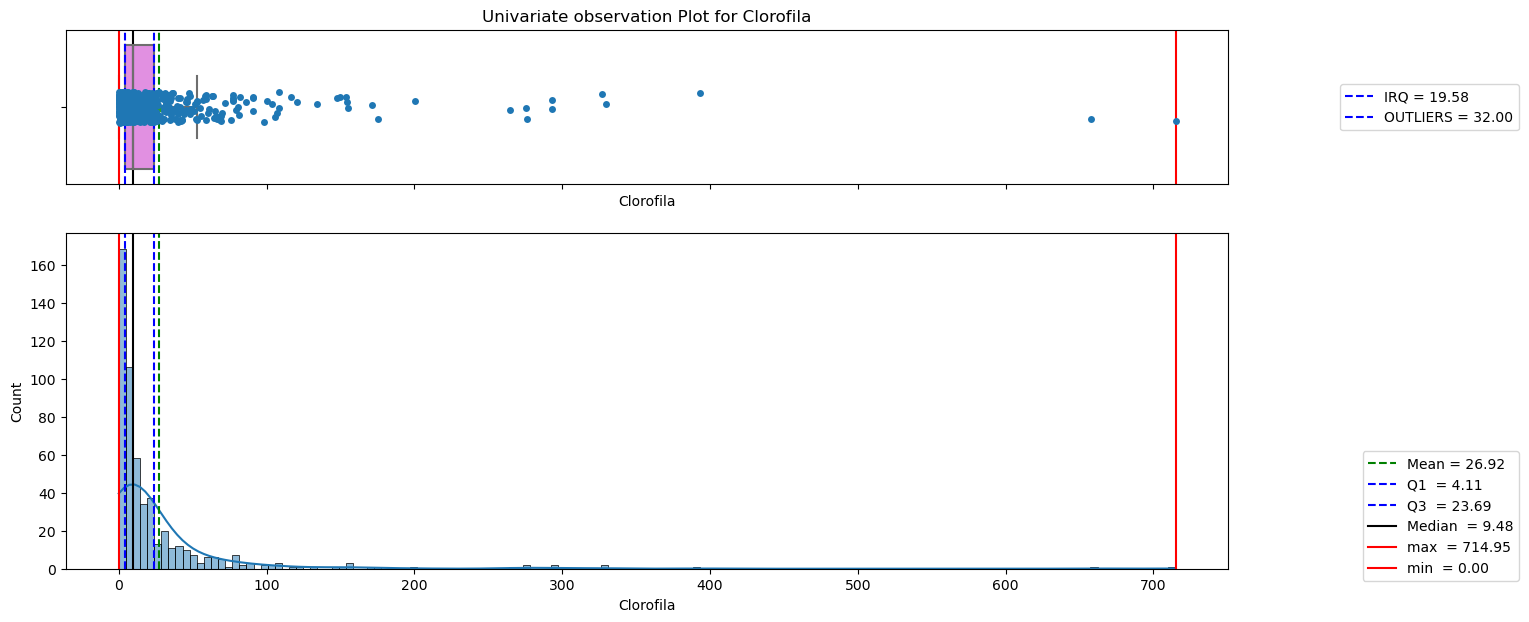

In [66]:
#Plot histo-box-plot for Clorofila.
histogram_boxplot(mydata,"Clorofila")

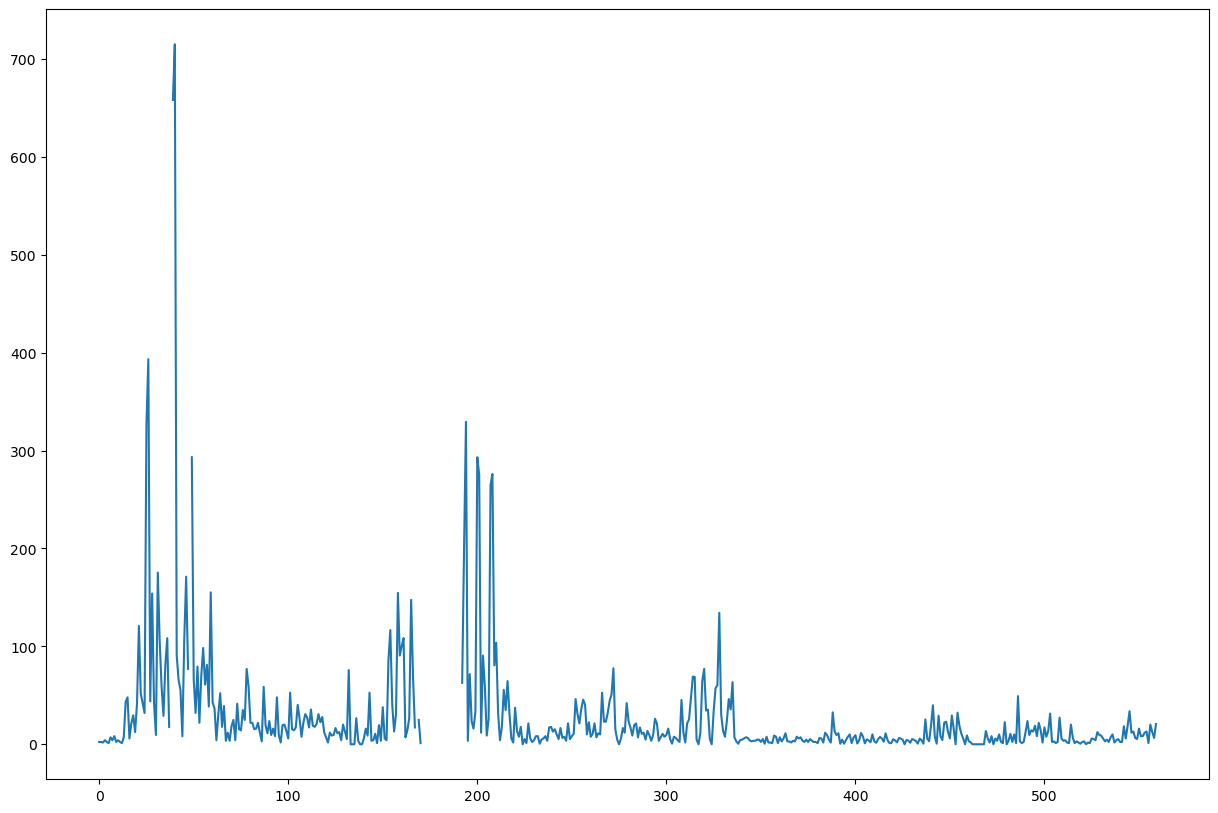

In [67]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['Clorofila'], label = "Clorofila");

In [68]:
#Skewed distribution filling missing values with median
mydata['Clorofila'].fillna(mydata['Clorofila'].median(), inplace=True)
# Replacing Zero by mean the median  
mydata['Clorofila'].mask(mydata['Clorofila']  ==  0 ,mydata['Clorofila'].median(), inplace=True)
len(mydata[mydata['Clorofila'].isna()])

0

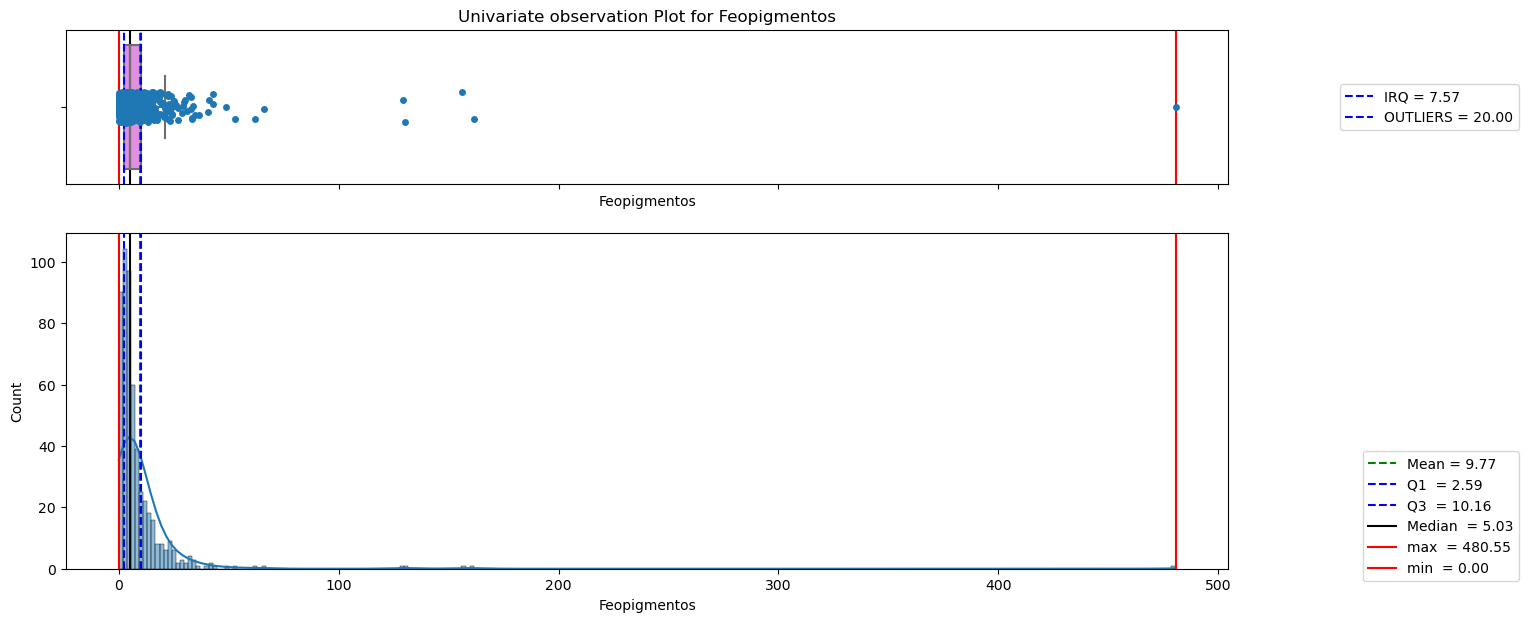

In [69]:
#Plot histo-box-plot for Feopigmentos.
histogram_boxplot(mydata,"Feopigmentos")

24

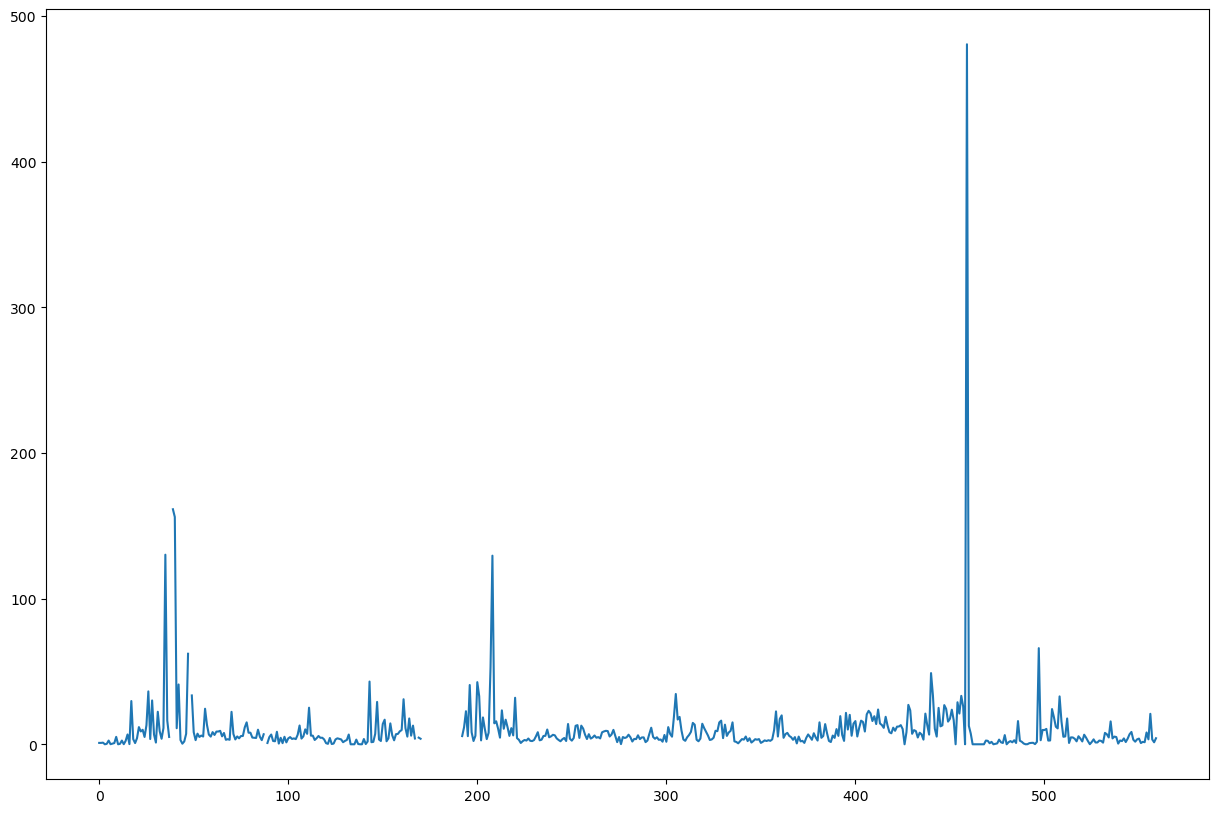

In [70]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['Feopigmentos'], label = "Feopigmentos");


In [71]:
#Skewed distribution filling missing values with median
mydata['Feopigmentos'].fillna(mydata['Feopigmentos'].median(), inplace=True)
# Replacing outliers with mediam
mydata['Feopigmentos'].mask(mydata['Feopigmentos']  >  200 ,mydata['Feopigmentos'].median(), inplace=True)
len(mydata[mydata['Feopigmentos'].isna()])

0

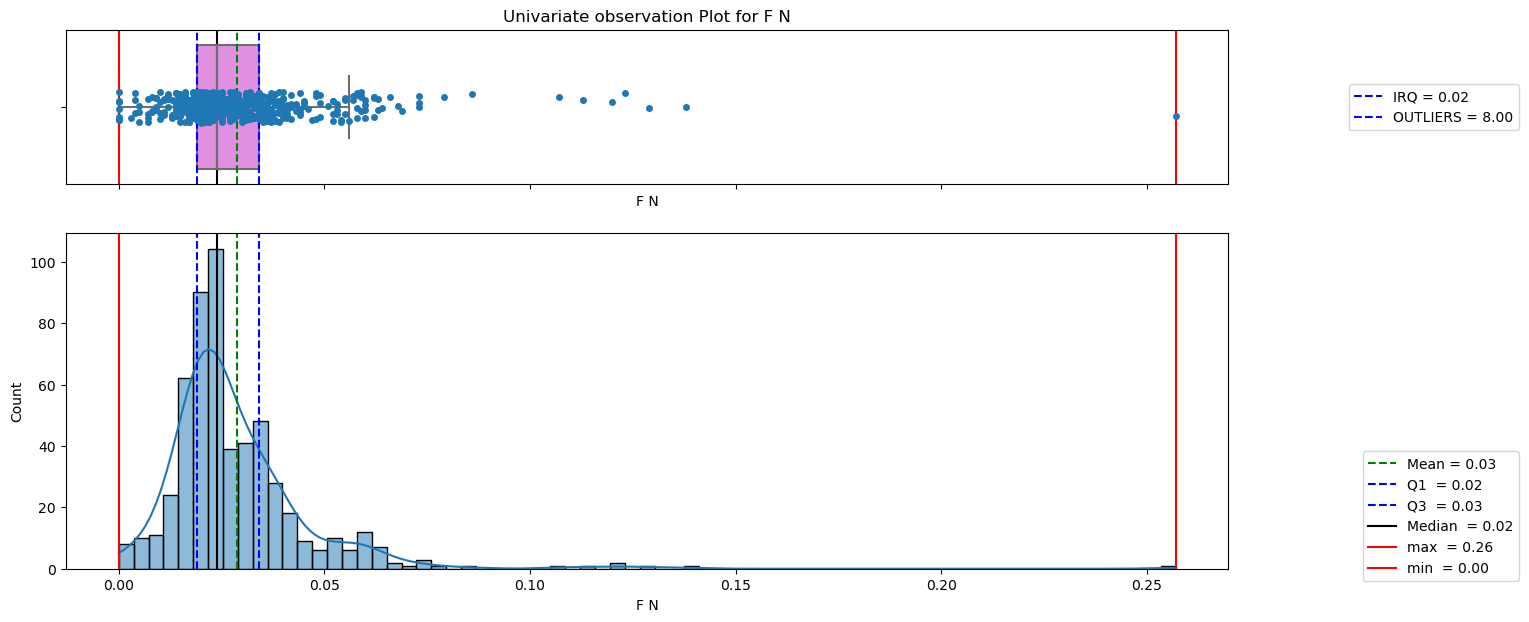

In [72]:
#Plot histo-box-plot for Feopigmentos.
histogram_boxplot(mydata,"F N")

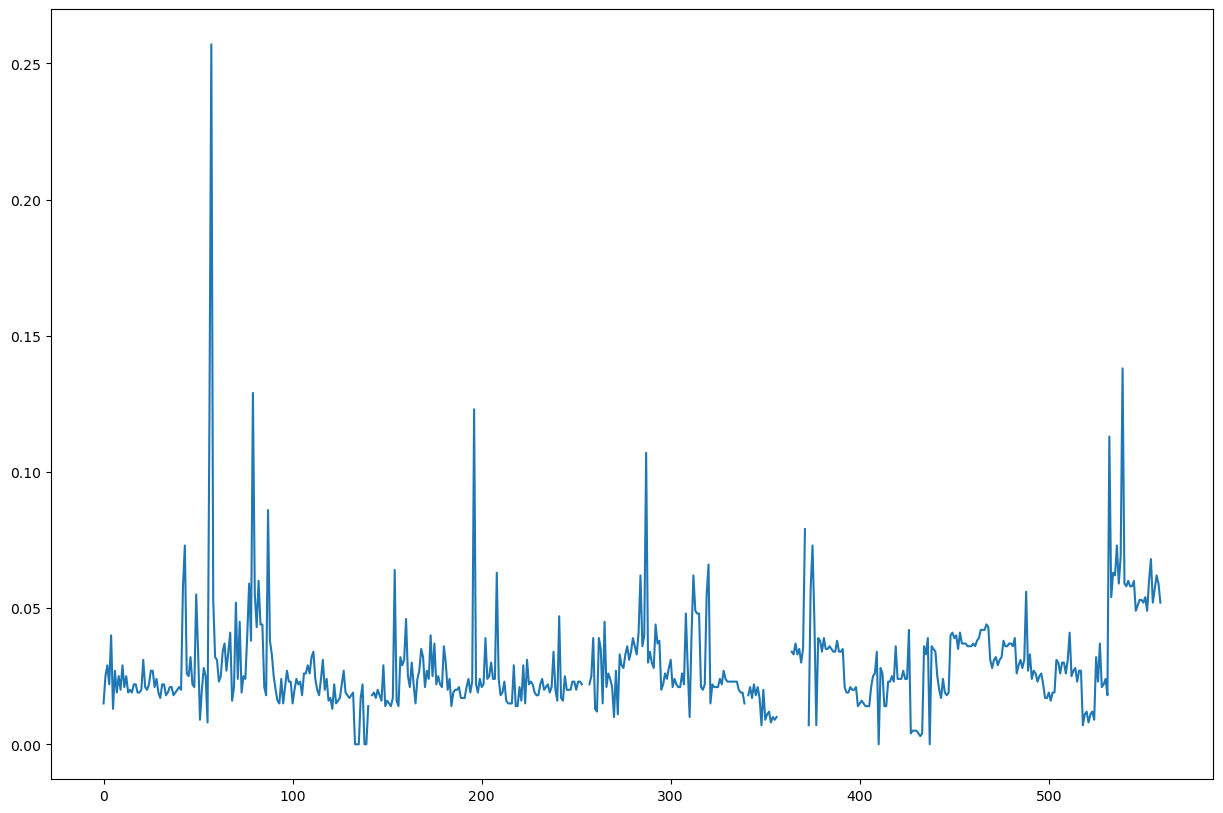

In [73]:
plt.figure(figsize=(15, 10))
plt.plot(mydata['F N'], label = "F N");

In [75]:
#Normal distribution filling missing values with mean
mydata['F N'].fillna(mydata['F N'].mean(), inplace=True)
len(mydata[mydata['F N'].isna()])

0

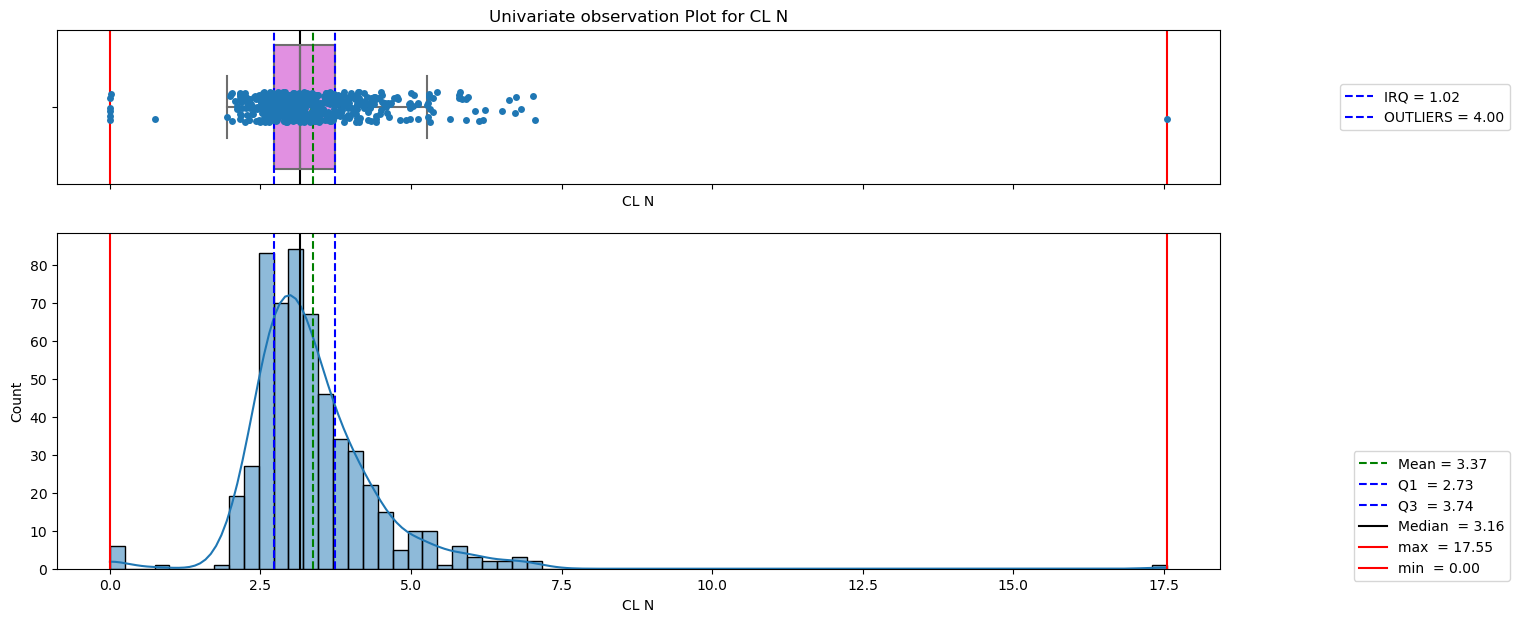

In [76]:
#Plot histo-box-plot for CL N.
histogram_boxplot(mydata,"CL N")

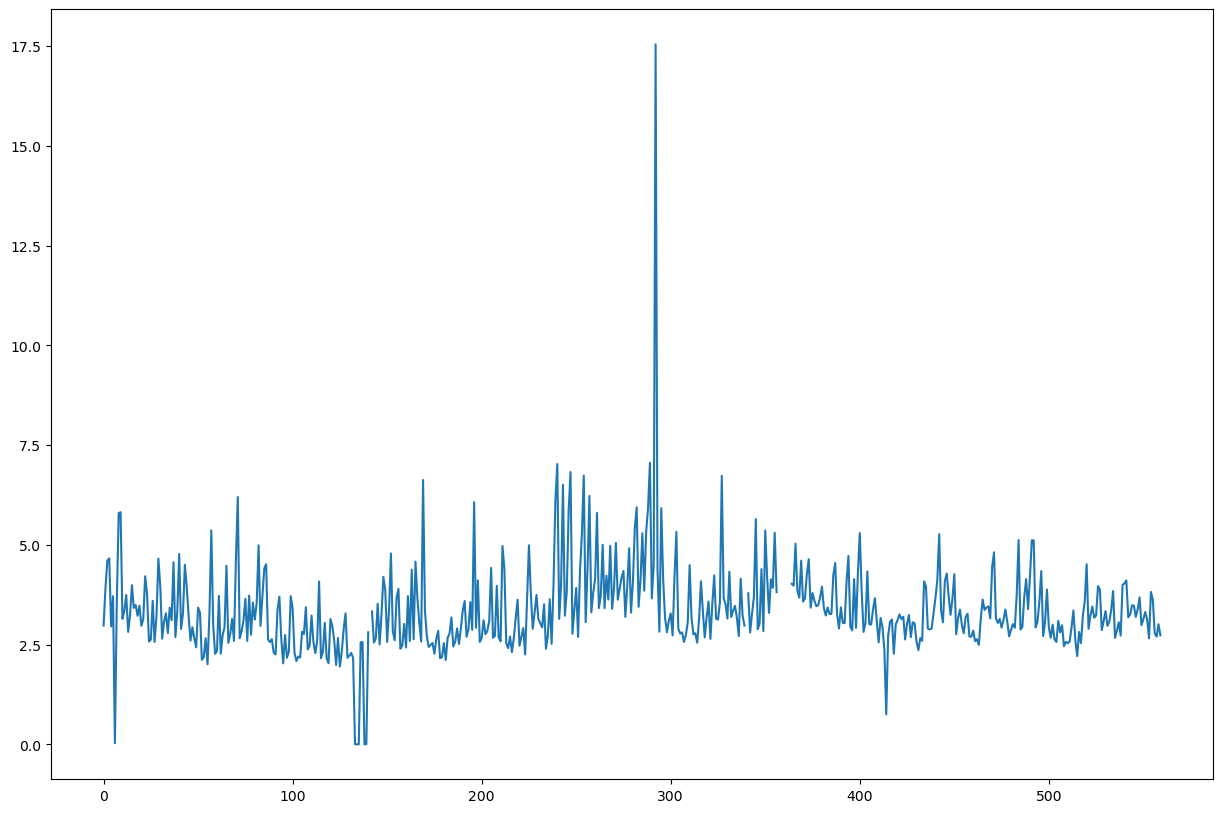

In [77]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['CL N'], label = "CL N");

In [78]:
#Normal distribution filling missing values with mean
mydata['CL N'].fillna(mydata['CL N'].mean(), inplace=True)
# Replacing outliers with mean
mydata['CL N'].mask(mydata['CL N']  >  7.5 ,mydata['CL N'].mean(), inplace=True)
mydata['CL N'].mask(mydata['CL N']  <  1 ,mydata['CL N'].mean(), inplace=True)
len(mydata[mydata['CL N'].isna()])

0

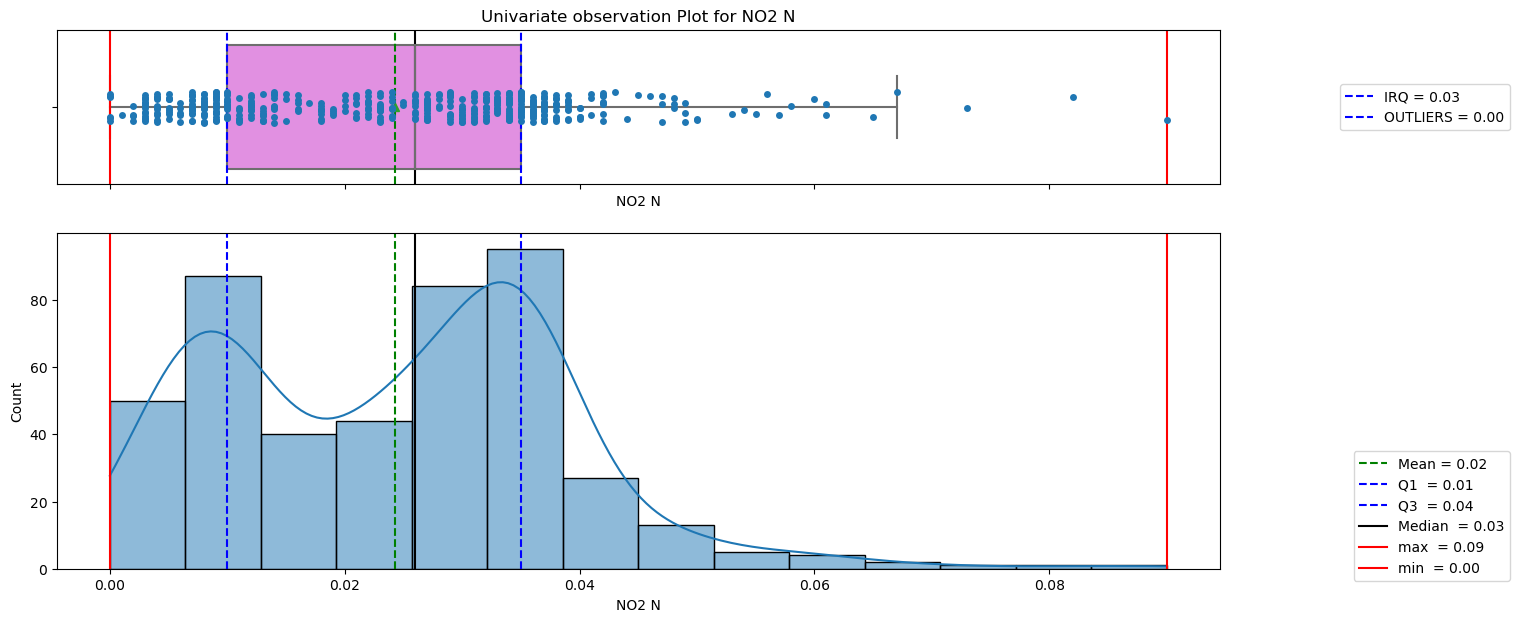

In [79]:
#Plot histo-box-plot for NO2 N.
histogram_boxplot(mydata,"NO2 N")

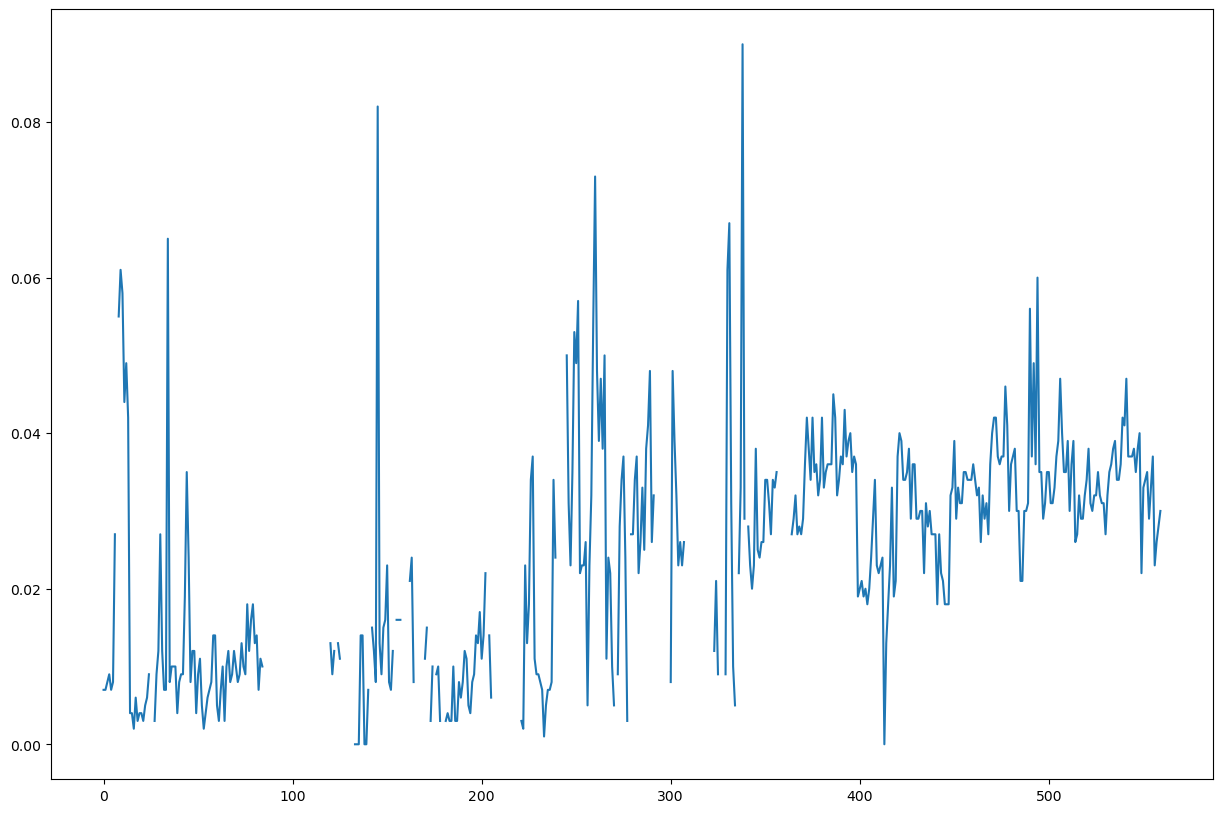

In [80]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['NO2 N'], label = "NO2 N");

In [81]:
#Normal distribution filling missing values with mean
mydata['NO2 N'].fillna(mydata['NO2 N'].mean(), inplace=True)
# Replacing Zeros with mean
mydata['NO2 N'].mask(mydata['NO2 N']  ==  0 ,mydata['NO2 N'].mean(), inplace=True)
len(mydata[mydata['NO2 N'].isna()])

0

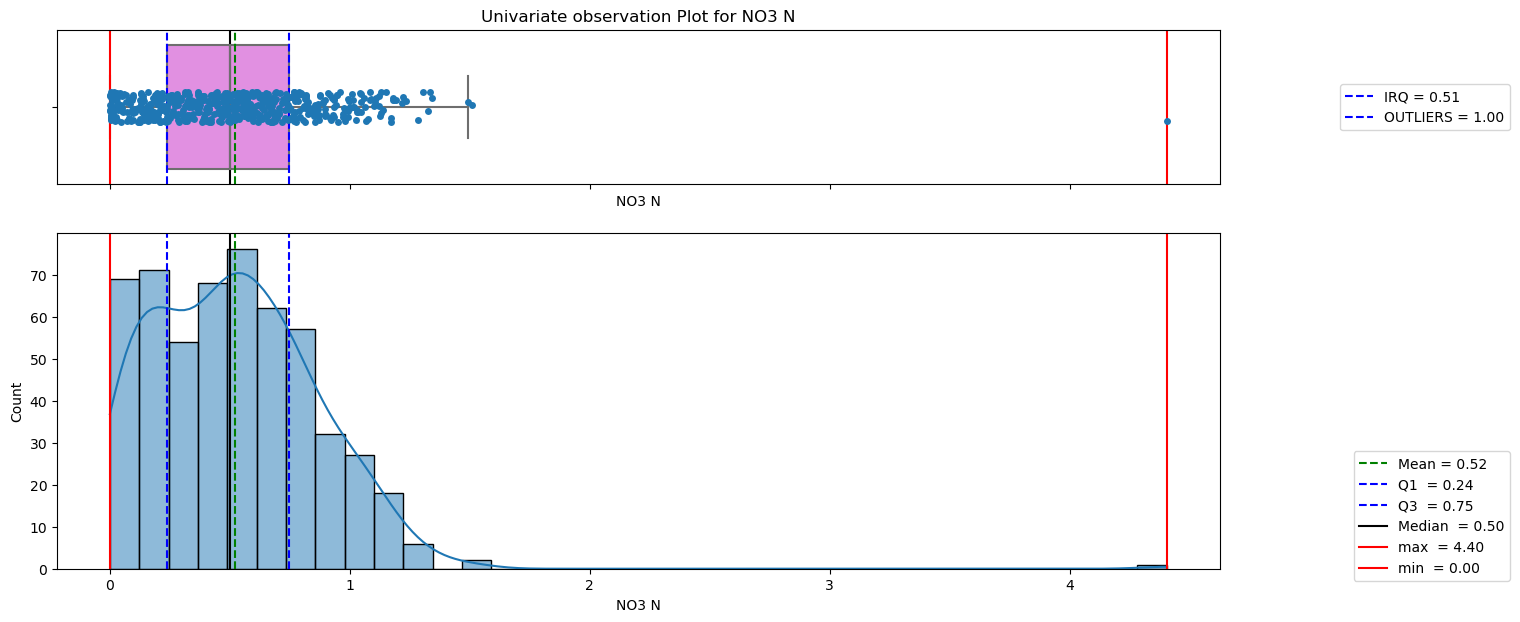

In [82]:
#Plot histo-box-plot for NO3 N.
histogram_boxplot(mydata,"NO3 N")

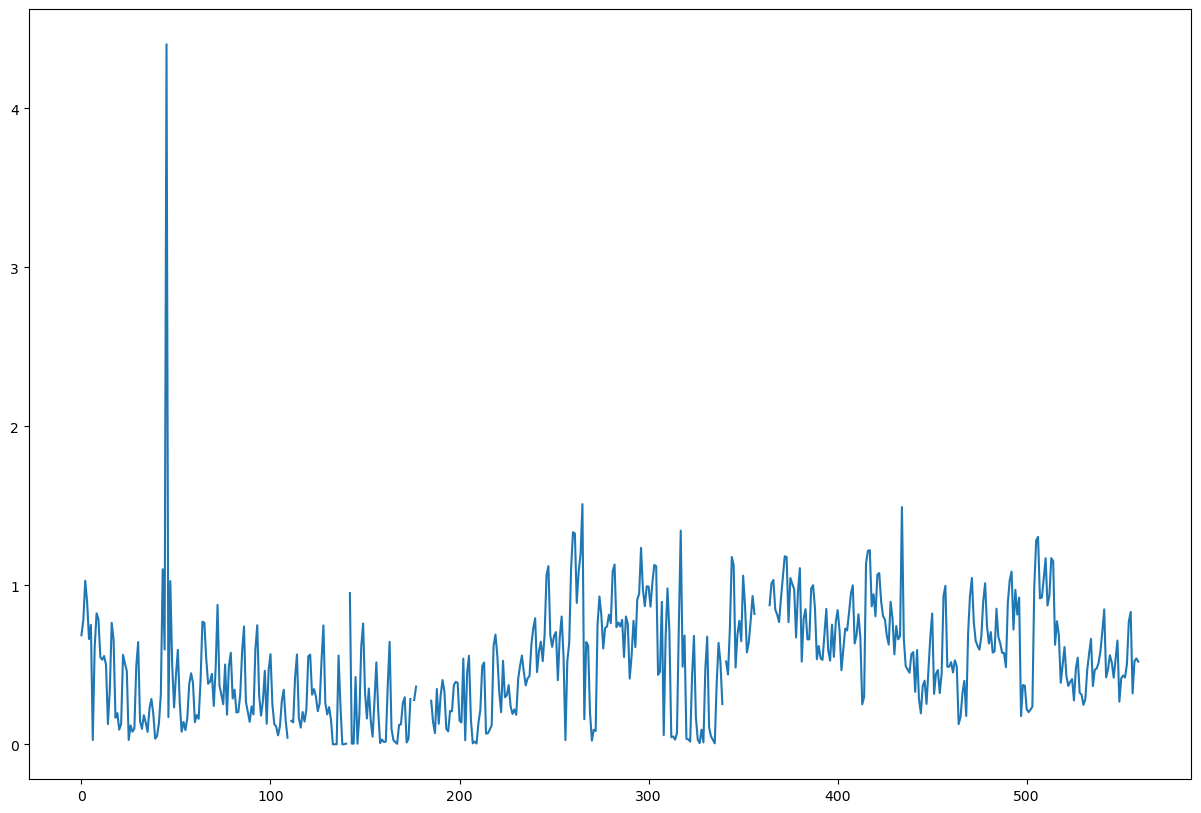

In [83]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['NO3 N'], label = "NO3 N");

In [84]:
#Normal distribution filling missing values with mean
mydata['NO3 N'].fillna(mydata['NO3 N'].mean(), inplace=True)
# Replacing Zeros with mean
mydata['NO3 N'].mask(mydata['NO3 N']  ==  0.0 ,mydata['NO3 N'].mean(), inplace=True)
len(mydata[mydata['NO3 N'].isna()])

0

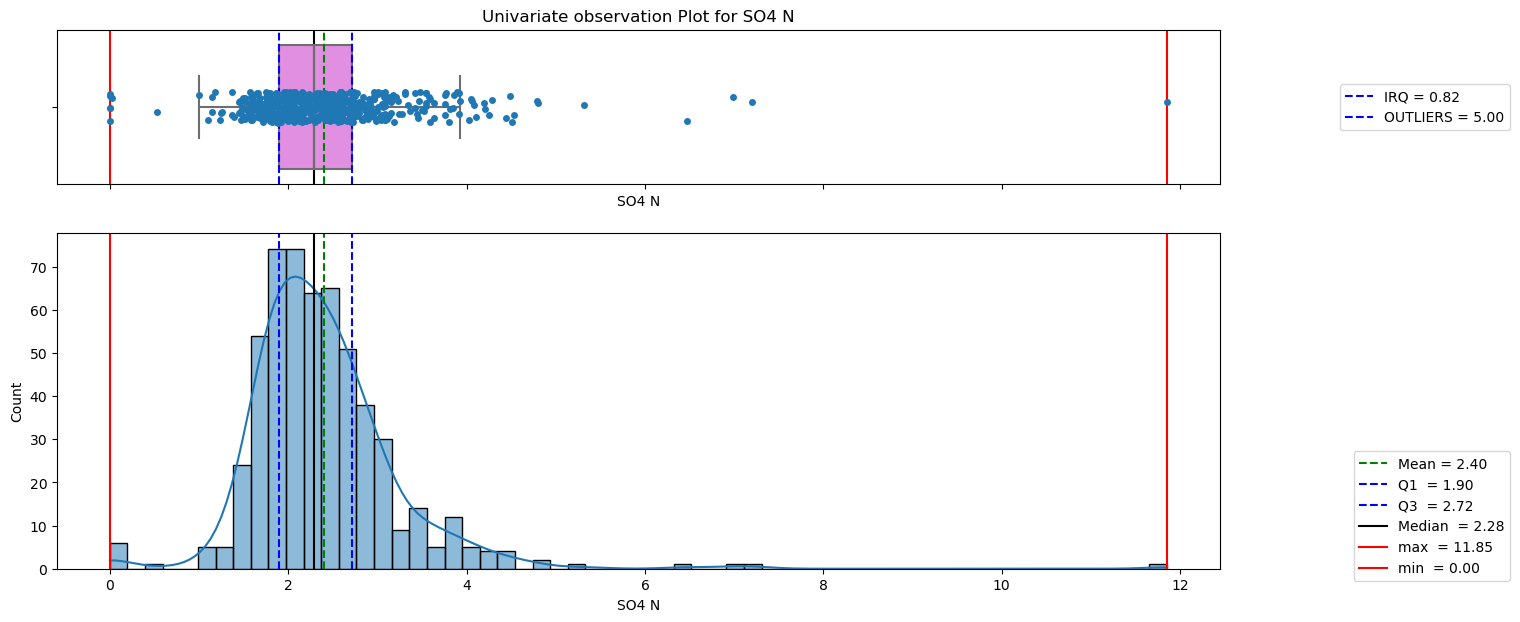

In [85]:
#Plot histo-box-plot for SO4 N.
histogram_boxplot(mydata,"SO4 N")

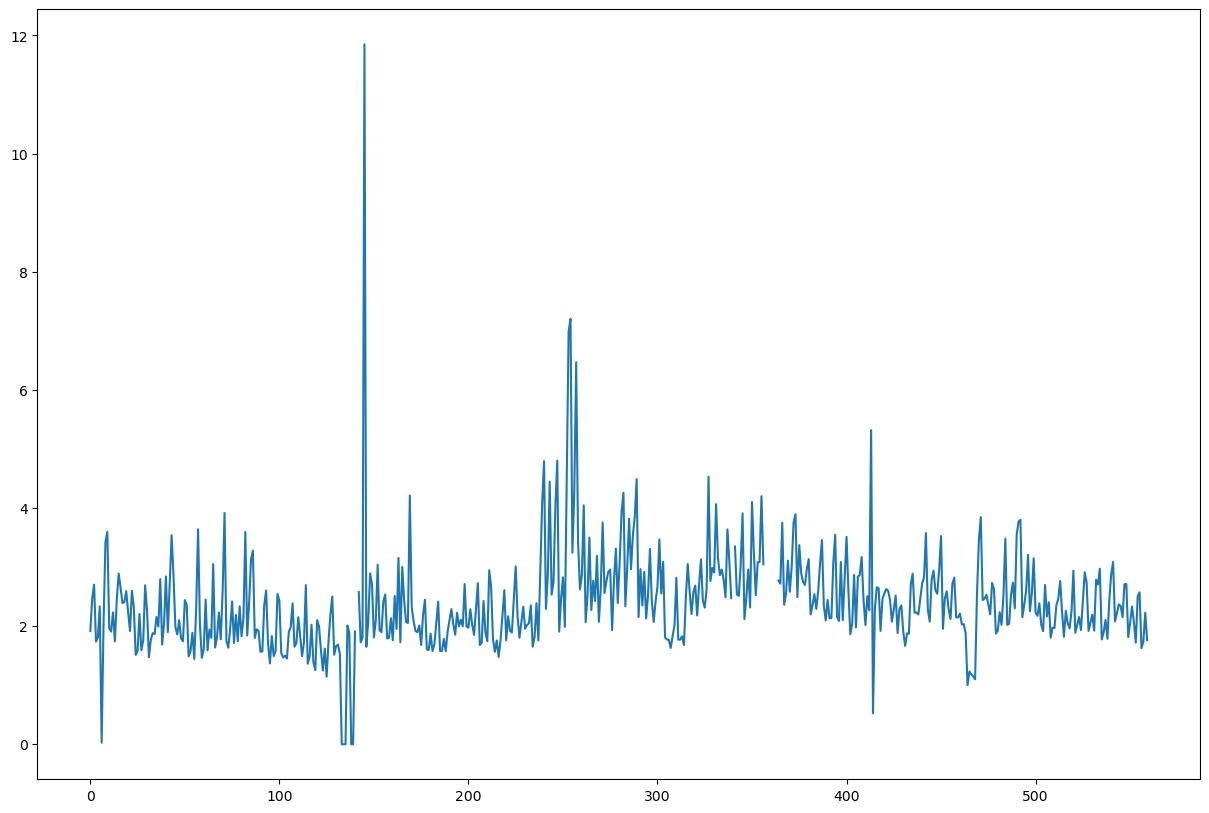

In [86]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['SO4 N'], label = "SO4 N");

In [87]:
#Normal distribution filling missing values with mean
mydata['SO4 N'].fillna(mydata['SO4 N'].mean(), inplace=True)
# Replacing Zeros and max with mean
mydata['SO4 N'].mask(mydata['SO4 N']  ==  0.0 ,mydata['SO4 N'].mean(), inplace=True)
mydata['SO4 N'].mask(mydata['SO4 N']  ==  max(mydata['SO4 N']) ,mydata['SO4 N'].mean(), inplace=True)
len(mydata[mydata['SO4 N'].isna()])

0

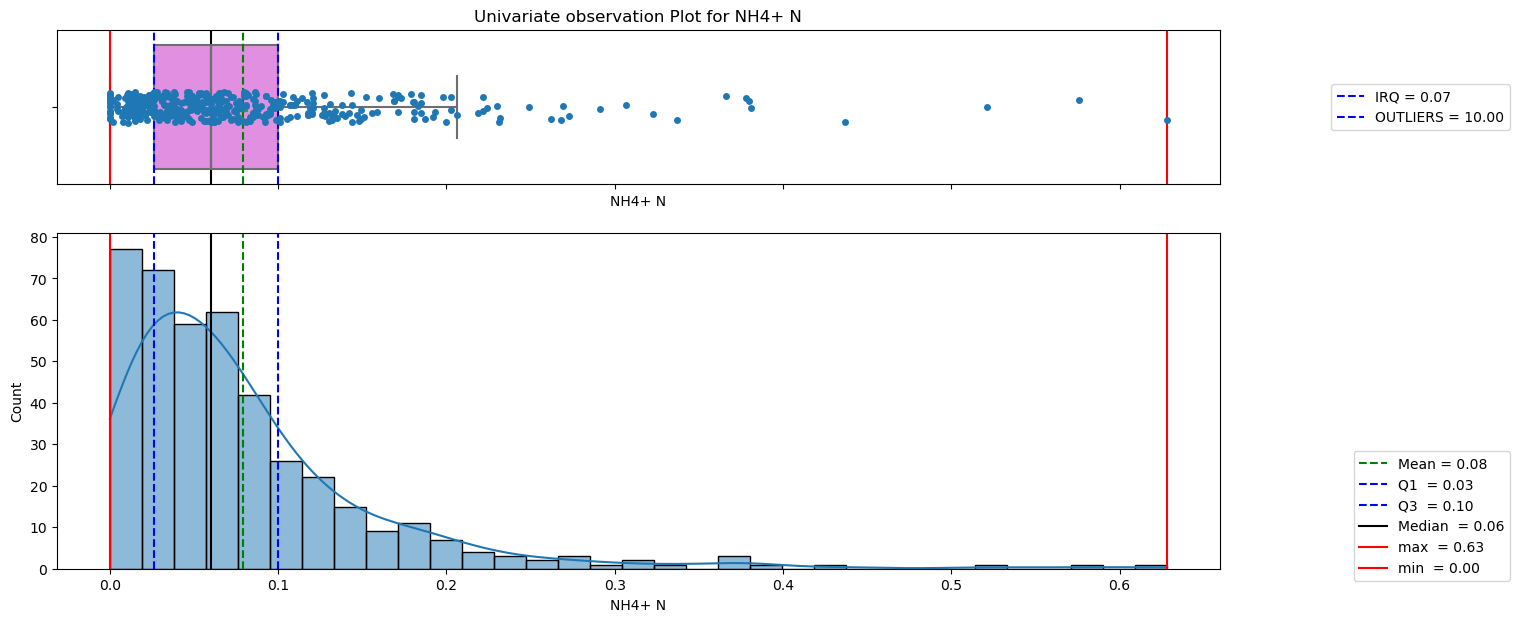

In [88]:
#Plot histo-box-plot for NH4+ N.
histogram_boxplot(mydata,"NH4+ N")


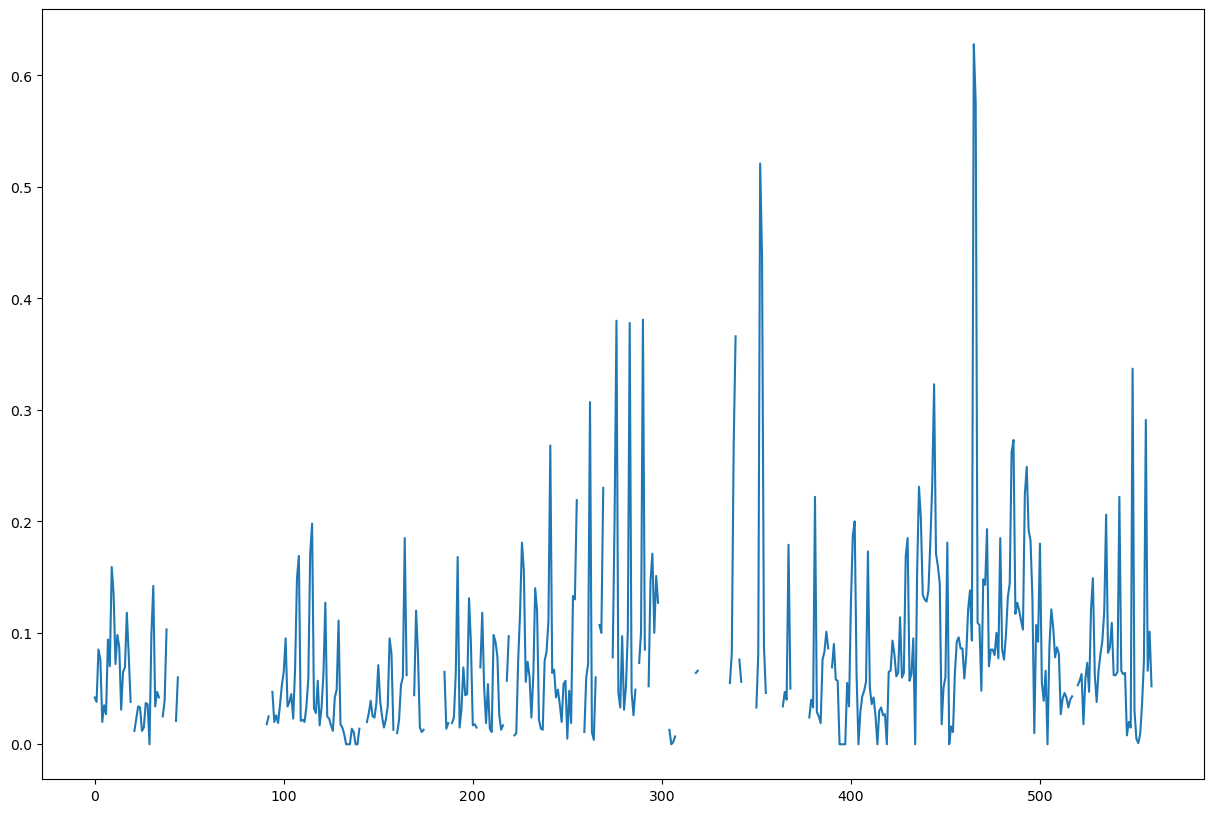

In [89]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['NH4+ N'], label = "NH4+ N")

In [90]:
#Skewed distribution filling missing values with median
mydata['NH4+ N'].fillna(mydata['NH4+ N'].median(), inplace=True)
# Replacing Zeros and max with median
mydata['NH4+ N'].mask(mydata['NH4+ N']  ==  0.0 ,mydata['NH4+ N'].median(), inplace=True)
mydata['NH4+ N'].mask(mydata['NH4+ N']  ==  max(mydata['NH4+ N']) ,mydata['NH4+ N'].median(), inplace=True)
len(mydata[mydata['NH4+ N'].isna()])

0

In [91]:
mydata['K N'] = mydata['K N'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
mydata['K N'] = mydata['K N'].astype(float)


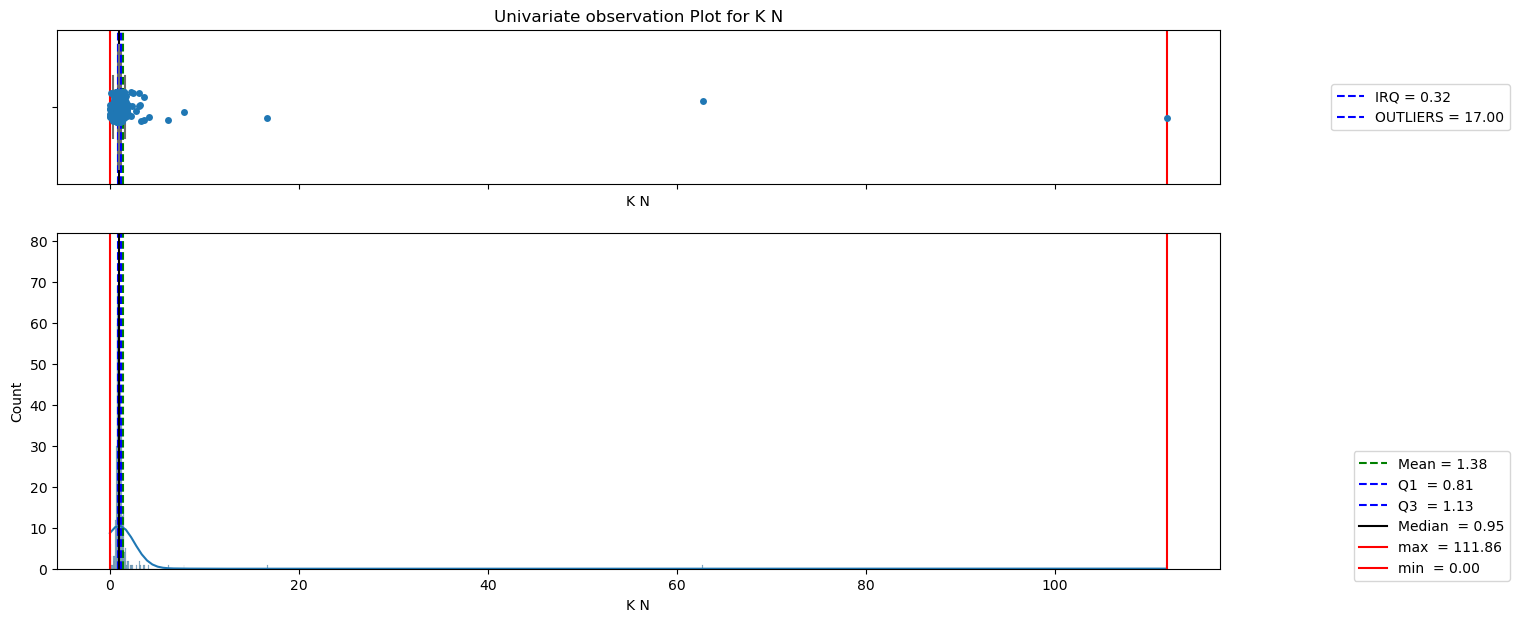

In [92]:
#Plot histo-box-plot for K N.
histogram_boxplot(mydata,"K N")

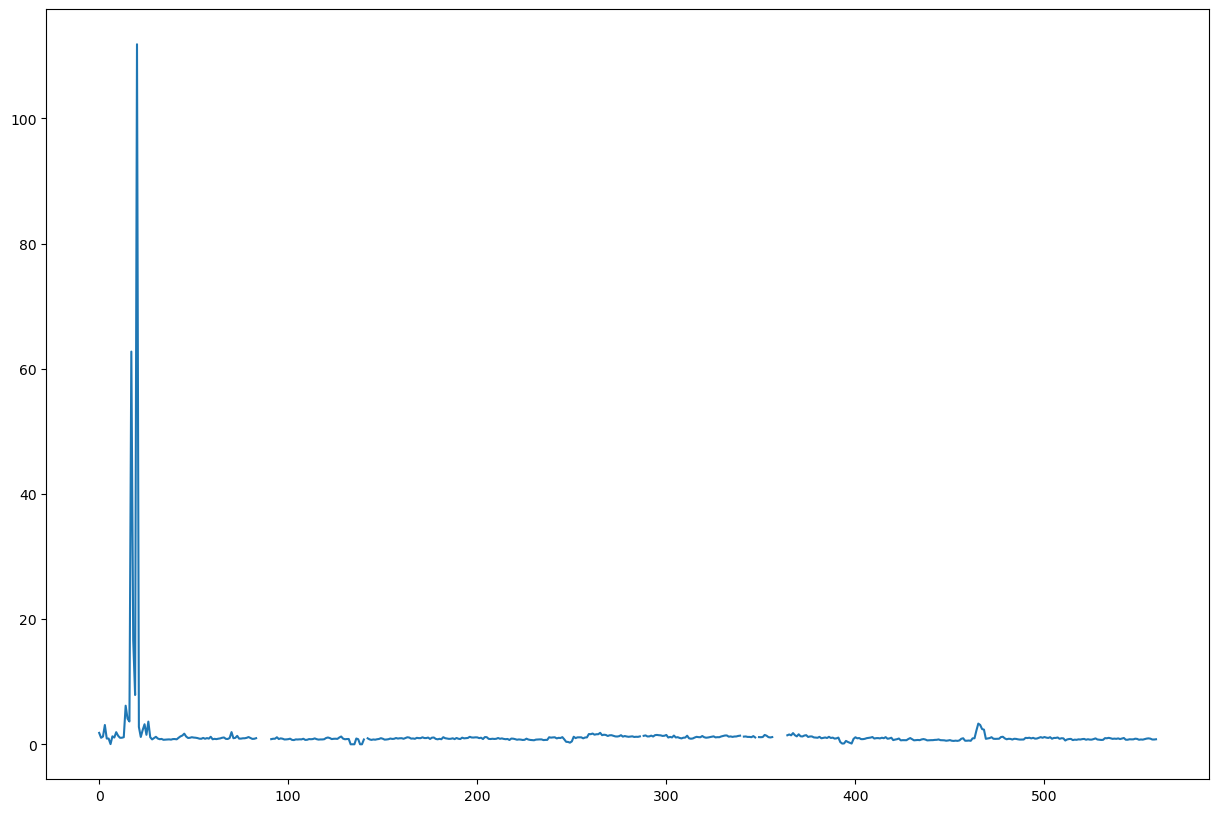

In [93]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['K N'], label = "K N");

In [94]:
#Skewed distribution filling missing values with median
mydata['K N'].fillna(mydata['K N'].median(), inplace=True)
# Replacing outliers  with median
mydata['K N'].mask(mydata['K N']  >  15 ,mydata['K N'].median(), inplace=True)
mydata['K N'].mask(mydata['K N']  <  0.0001 ,mydata['K N'].median(), inplace=True)
len(mydata[mydata['K N'].isna()])

0

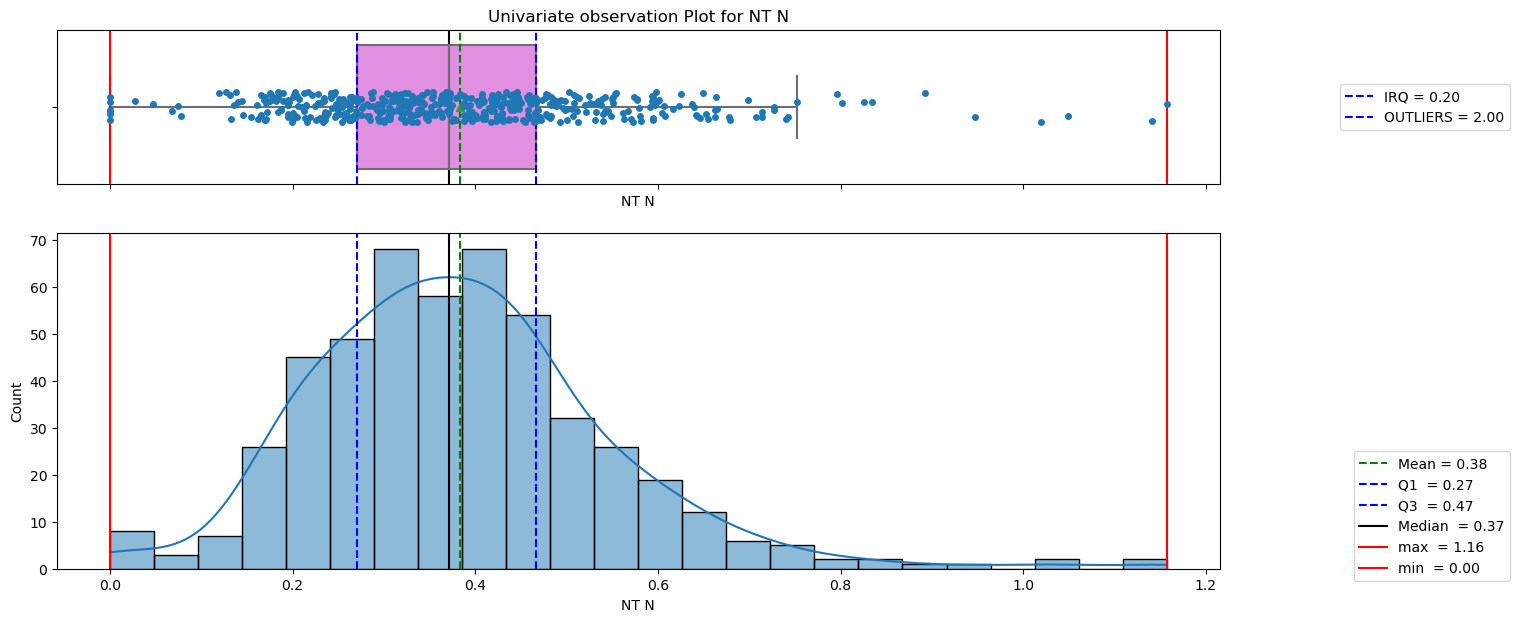

In [95]:
#Plot histo-box-plot for NT N.
histogram_boxplot(mydata,"NT N")

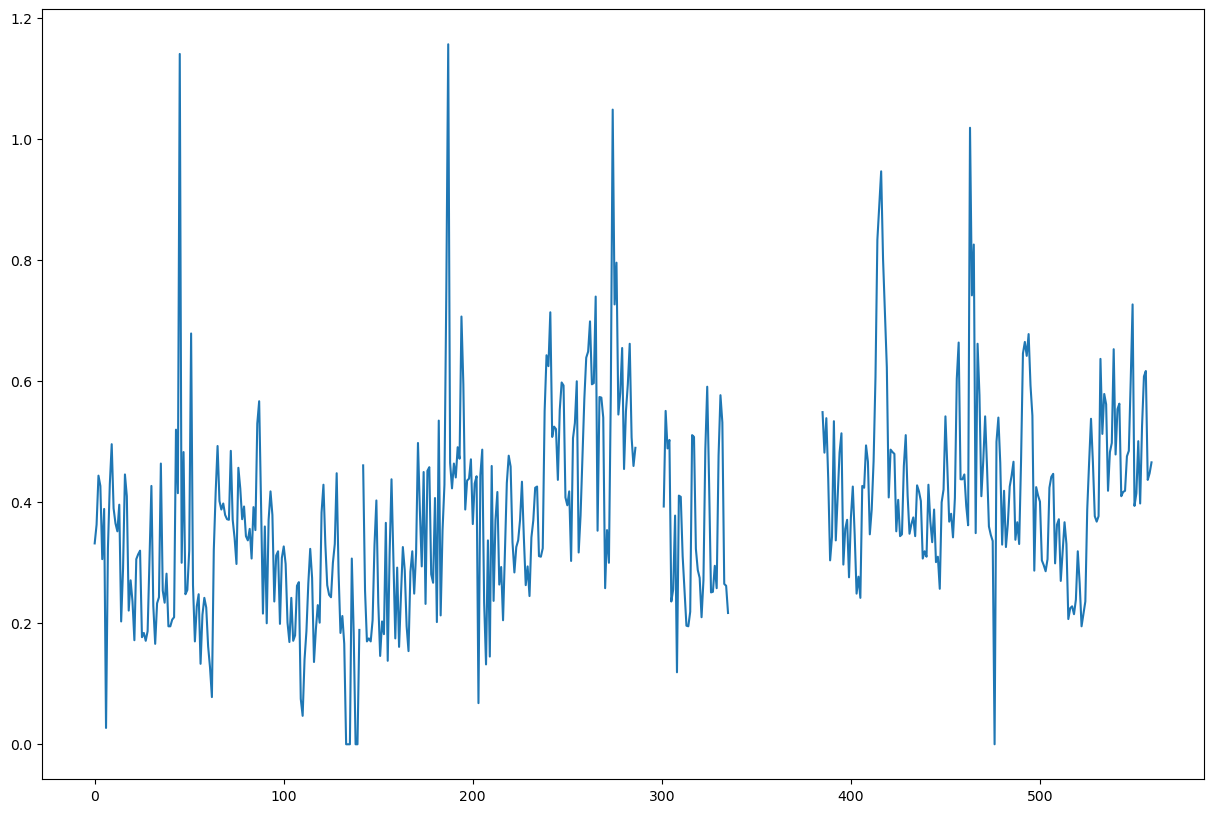

In [96]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['NT N'], label = "NT N");

In [97]:
#Normal distribution filling missing values with mean
mydata['NT N'].fillna(mydata['NT N'].mean(), inplace=True)
# Replacing outliers  with mean
mydata['NT N'].mask(mydata['NT N']  <  0.0001 ,mydata['NT N'].mean(), inplace=True)
len(mydata[mydata['NT N'].isna()])

0

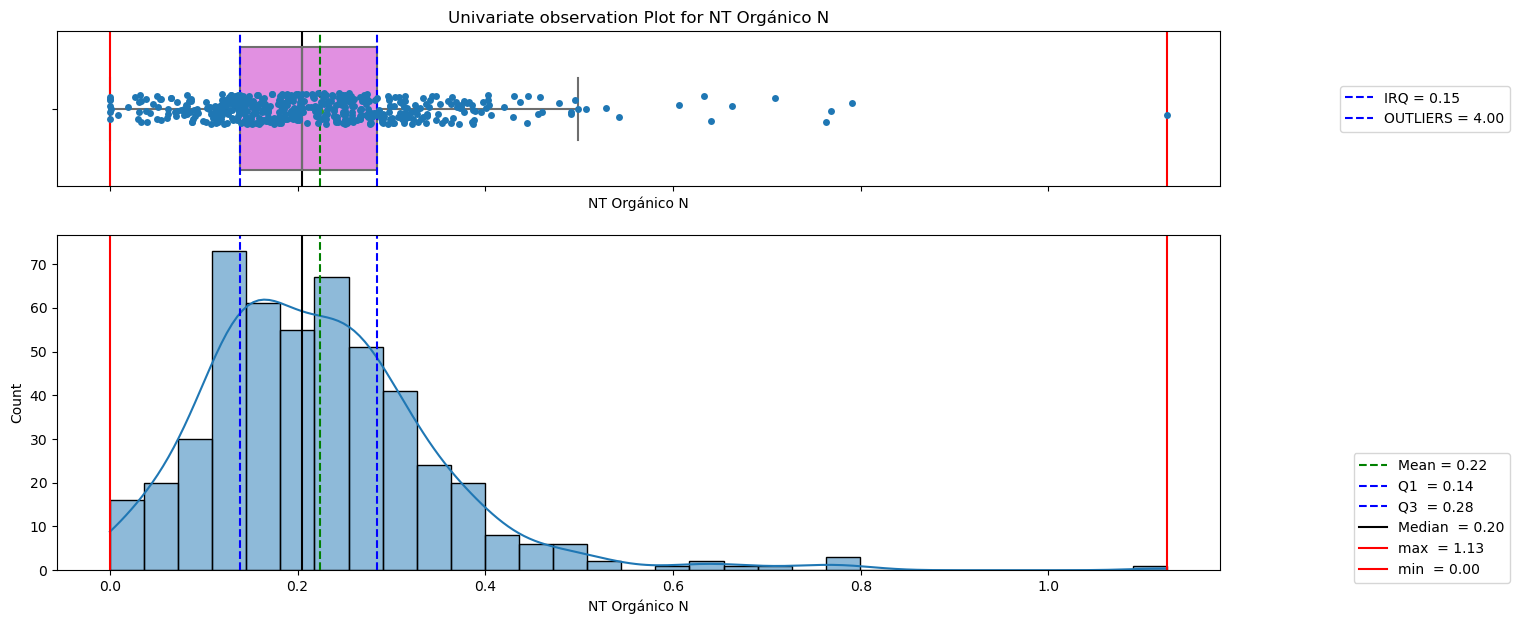

In [98]:
#Plot histo-box-plot for NT Orgánico N.
histogram_boxplot(mydata,"NT Orgánico N")

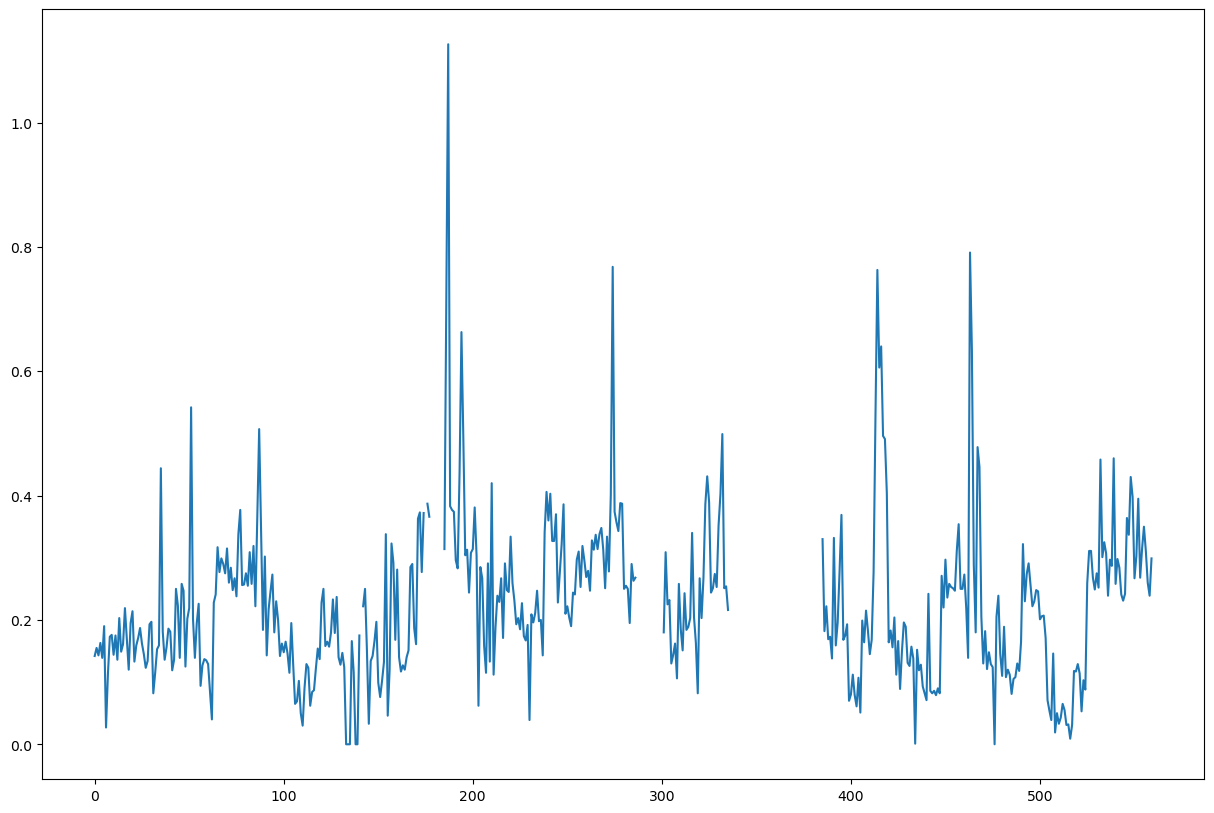

In [99]:
plt.figure(figsize=(15, 10));
plt.plot(mydata['NT Orgánico N'], label = "NT Orgánico N");

In [100]:
#Normal distribution filling missing values with mean
mydata['NT Orgánico N'].fillna(mydata['NT Orgánico N'].mean(), inplace=True)
# Replacing outliers  with mean
mydata['NT Orgánico N'].mask(mydata['NT Orgánico N']  <  0.0001 ,mydata['NT Orgánico N'].mean(), inplace=True)
len(mydata[mydata['NT Orgánico N'].isna()])

0

In [102]:
#Calculate missing values
for feature in mydata.columns: # Loop through all columns in the dataframe
    missing = len(mydata[mydata[feature].isna()])
    if missing > 0:
        Pmissing = round(100*missing/len(mydata),2)
        print(f"The { Pmissing } % of the records on column  {str(feature)} are missing values .  ")  # f-string
missing  = len(mydata[mydata.isna().any(axis=1)])
print(f"The data has { missing } records with  missing values.  ")  # f-string

The 1.25 % of the records on column  OD% are missing values .  
The 45.18 % of the records on column  Coliformes totales are missing values .  
The 45.18 % of the records on column  E.coli are missing values .  
The 58.04 % of the records on column  PO4 N are missing values .  
The 2.5 % of the records on column  Colorr are missing values .  
The data has 382 records with  missing values.  


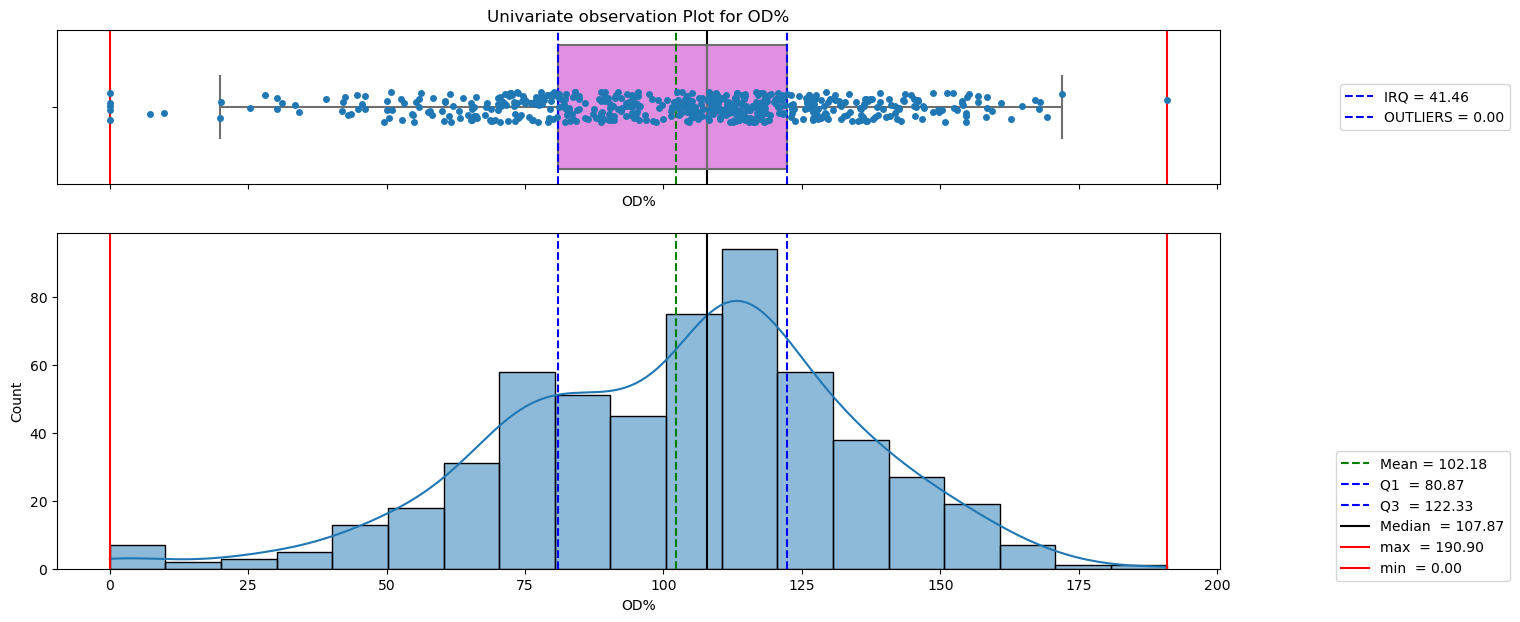

In [103]:
#Plot histo-box-plot for NT Orgánico N.
histogram_boxplot(mydata,"OD%")

In [104]:
# OD% have a normal distribution, missing values to be replaced by mean. 
mydata['OD%'] = mydata['OD%'].replace(np.nan, mydata['OD%'].mean())
len(mydata[mydata['OD%'].isna()])

0

In [106]:
# Deleting colums with too many missing values and Colorr which is repeate 
mydata = mydata.drop(columns=['Coliformes totales', 'E.coli', 'PO4 N', 'Colorr'])

In [107]:
#Check for null values
mydata.isnull().values.any()

False

In [110]:
# Drop the "PM" column temporarily for the correlation calculation
correlation_data = mydata.drop(columns=['PM'])

# Creating a 2-D Matrix with correlation plots of the remaining columns
correlation = correlation_data.corr()
correlation

Profuidad  Zona fótica     pH  Temperatura      OD  \
Profuidad                   1.000        0.982 -0.372         0.034 -0.107   
Zona fótica                 0.982        1.000 -0.374         0.030 -0.106   
pH                         -0.372       -0.374  1.000         0.360  0.683   
Temperatura                 0.034        0.030  0.360         1.000  0.611   
OD                         -0.107       -0.106  0.683         0.611  1.000   
OD%                        -0.108       -0.107  0.678         0.611  0.957   
Conductividad              -0.169       -0.150 -0.155        -0.028 -0.139   
Redox                       0.126        0.125 -0.293         0.032 -0.097   
Fósforo Total              -0.318       -0.307  0.153         0.122  0.230   
Nitratos                    0.303        0.307 -0.534        -0.217 -0.301   
N. amonical                 0.274        0.276 -0.294        -0.081 -0.307   
Mang                        0.131        0.132 -0.241        -0.087 -0.345   
Color                      -0.117       -0.100  0.056        -0.098  0.010   
Turbiedad                  -0.267       -0.252  0.069         0.033  0.119   
N total                     0.079        0.079 -0.039        -0.061  0.006   
TOC                        -0.280       -0.267  0.236         0.110  0.158   
UV \n(cm1)                 -0.062       -0.050 -0.150        -0.077 -0.099   
SUVA                        0.161        0.166 -0.365        -0.166 -0.233   
Clorofila                  -0.324       -0.317  0.314         0.173  0.326   
Feopigmentos               -0.205       -0.203  0.105         0.139  0.242   
Algas                      -0.200       -0.191  0.209         0.101  0.178   
Cianobacterias totales     -0.335       -0.323  0.170         0.144  0.178   
F N                         0.020        0.023  0.040         0.168  0.131   
CL N                       -0.018       -0.011 -0.204        -0.030 -0.153   
NO2 N                       0.318        0.326 -0.296        -0.087 -0.086   
NO3 N                       0.251        0.257 -0.454        -0.198 -0.255   
SO4 N                      -0.052       -0.041 -0.209        -0.045 -0.131   
NH4+ N                      0.254        0.256 -0.323        -0.106 -0.331   
K N                        -0.126       -0.168  0.066        -0.001 -0.014   
NT N                        0.146        0.158 -0.382        -0.177 -0.245   
NT Orgánico N              -0.157       -0.145 -0.034        -0.012 -0.016   

                          OD%  Conductividad  Redox  Fósforo Total  Nitratos  \
Profuidad              -0.108         -0.169  0.126         -0.318     0.303   
Zona fótica            -0.107         -0.150  0.125         -0.307     0.307   
pH                      0.678         -0.155 -0.293          0.153    -0.534   
Temperatura             0.611         -0.028  0.032          0.122    -0.217   
OD                      0.957         -0.139 -0.097          0.230    -0.301   
OD%                     1.000         -0.118 -0.099          0.216    -0.295   
Conductividad          -0.118          1.000  0.029          0.117     0.259   
Redox                  -0.099          0.029  1.000         -0.054     0.315   
Fósforo Total           0.216          0.117 -0.054          1.000    -0.156   
Nitratos               -0.295          0.259  0.315         -0.156     1.000   
N. amonical            -0.291          0.094 -0.042         -0.027     0.065   
Mang                   -0.336          0.142 -0.251         -0.008    -0.004   
Color                  -0.018         -0.002 -0.002          0.205    -0.079   
Turbiedad               0.114          0.234  0.054          0.451    -0.017   
N total                -0.004         -0.009  0.025          0.068     0.087   
TOC                     0.151          0.037 -0.051          0.113    -0.107   
UV \n(cm1)             -0.105          0.166 -0.004          0.133     0.152   
SUVA                   -0.234          0.167  0.047          0.076     0.286   
Clorofi

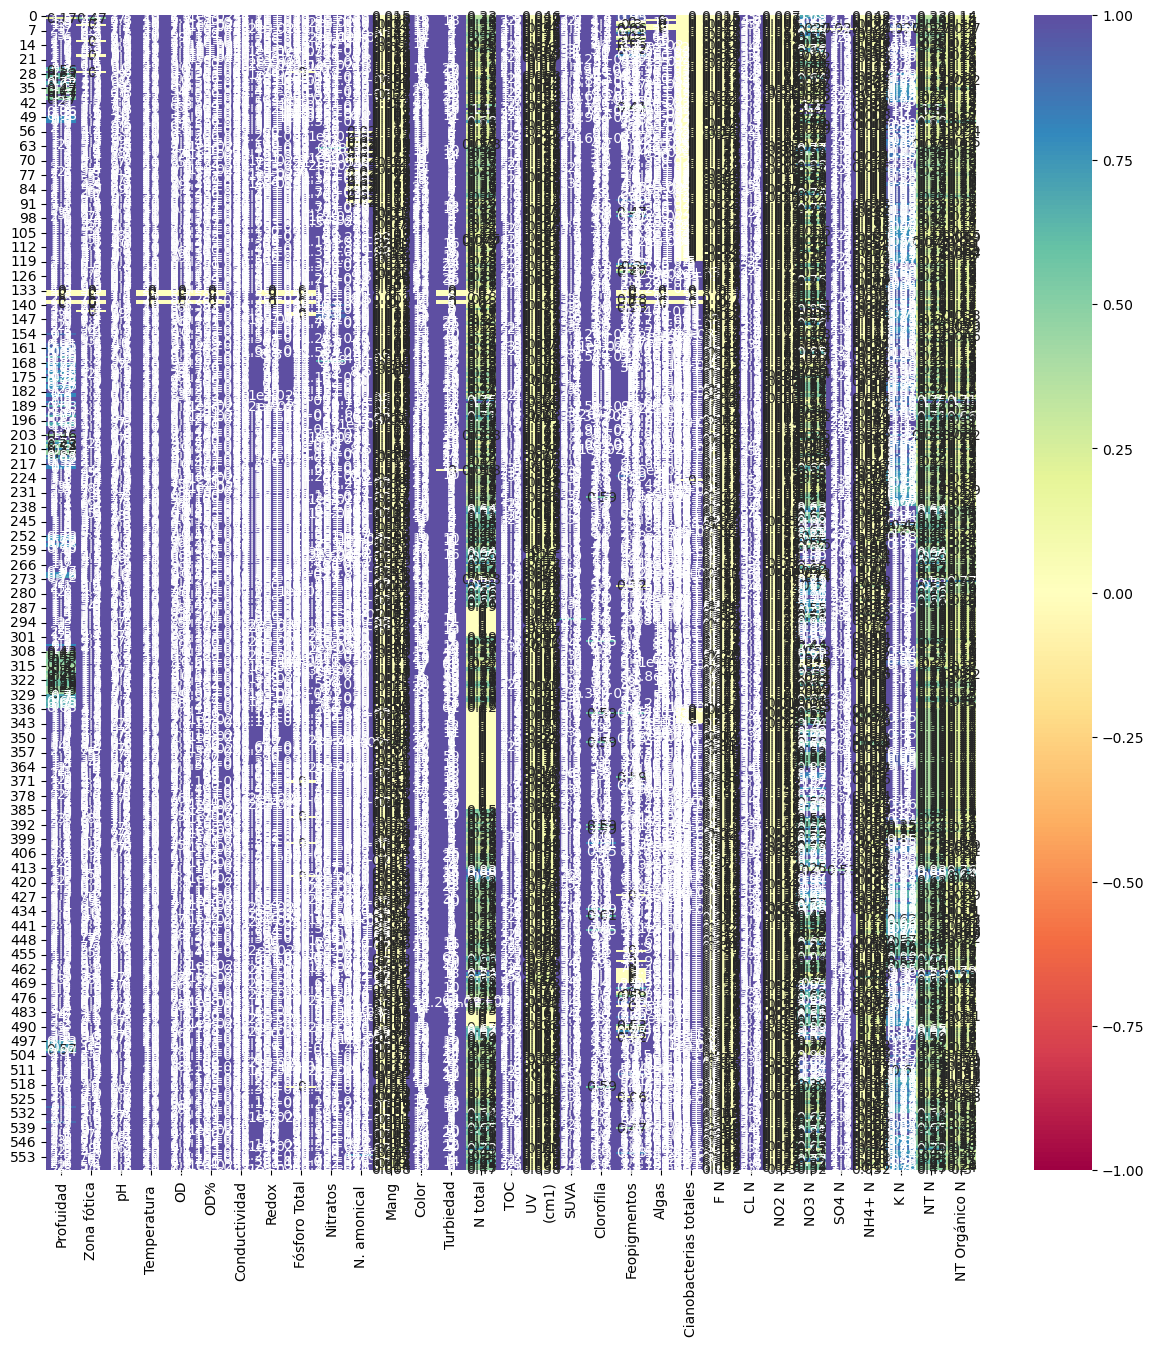

In [111]:
# Plotting Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_data, vmin = -1, vmax = 1, annot=True, cmap="Spectral");

## Creating function that show zoom of correlations 

In [115]:
from numpy.random      import randn
from pandas            import DataFrame
from seaborn           import heatmap
from matplotlib.pyplot import show
from itertools         import combinations

def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

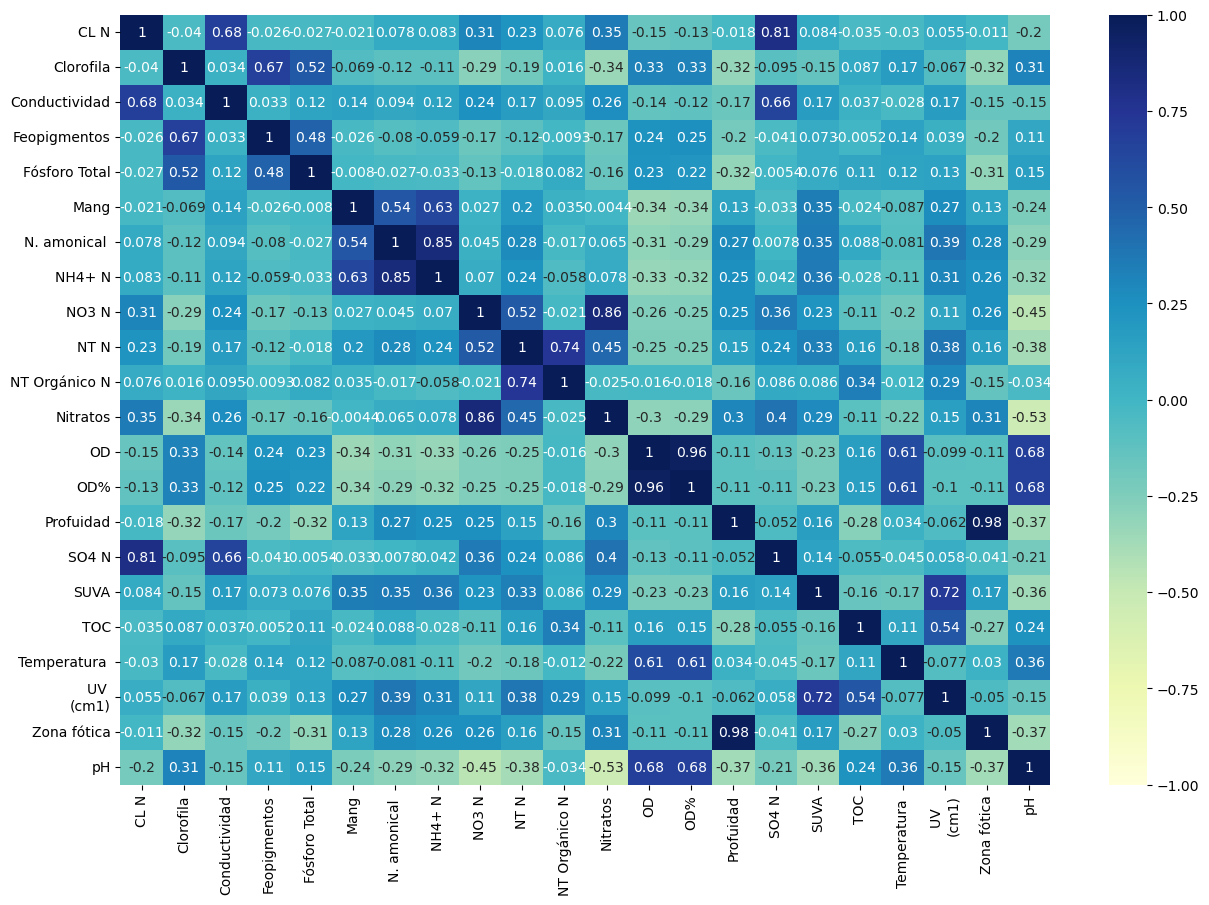

In [118]:

plt.figure(figsize=(15, 10))

corrDf = correlation_data.corr()

#heatmap(corrDf,cmap="YlGnBu")
heatmap(absHighPass(corrDf,0.5),cmap="YlGnBu", vmin = -1, vmax = 1, annot=True)
show()

In [119]:
mydata=mydata.reset_index(drop=True)

In [120]:
mydata.to_csv(DATADIR + '/Mang_WF_Update.csv')